In [1]:
#Подключение необходимых библиотек
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
np.random.seed(1)

In [3]:
#Определения класса population с полями: массив особей, результат фитнесс функции, методами: размножение, мутация, отбор
class population:
    def __init__(self, count_individuals):
        self.individuals = np.random.random((count_individuals,3,9)) - 1
        self.fitness_res  = []
        
    def crossover(self, a, b):
        a1 = np.array(np.reshape(a, a.size))
        b1 = np.array(np.reshape(b, a.size))
        c = np.array(np.reshape(a, a.size))
        d = np.array(np.reshape(b, a.size))
        for i in range(np.random.randint(0, a.size), a.size):
            c[i] = b1[i]
            d[i] = a1[i]
        c = np.array([np.reshape(c, a.shape)])
        d = np.array([np.reshape(d, b.shape)])
        self.individuals = np.vstack((self.individuals,c))
        self.individuals = np.vstack((self.individuals,d))
    
    def mutation(self, indx_indvd, m):
        for i in range(self.individuals[indx_indvd].shape[0]):
            for j in range(self.individuals[indx_indvd].shape[1]):
                delta = 0
                for k in range(m):
                    if np.random.randint(0, 100) < (100/m):
                        delta = delta + pow(2, -k)
                if np.random.randint(0, 100) < 50:
                    self.individuals[indx_indvd][i][j]=self.individuals[indx_indvd][i][j] + 0.5*delta
                else:
                    self.individuals[indx_indvd][i][j]=self.individuals[indx_indvd][i][j] - 0.5*delta

    def select(self):
        new_population = np.array([])
        elite_ind = np.argmin(np.array(self.fitness_res))
        new_population = np.append(new_population ,[self.individuals[elite_ind]])
        new_population_indx = np.array([])
        while(len(new_population_indx) != len(self.fitness_res) - 2):
            p = (1-np.array([self.fitness_res])).tolist()
            choise_i = random.choices(np.arange(self.individuals.shape[0]), p[0], cum_weights=None, k=1)
            search = True
            for i in range(new_population_indx.size):              
                if new_population_indx[i] == choise_i:
                    search = False
                    break
            if search:
                new_population_indx = np.append(new_population_indx ,choise_i)
        new_population = np.reshape(new_population, (1, self.individuals.shape[1], self.individuals.shape[2]))
        for i in range(1, new_population_indx.size):
            indx = int(new_population_indx[i])
            new_population = np.vstack((new_population, [self.individuals[indx]]))
        self.individuals = np.array(new_population)
            

                    
     
  
            
   

In [4]:
# Сигмоида 
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
    

In [5]:
#определение количества эпох, инициализация популяции
epoch = 10000
pop1 = population(30)


In [6]:
# набор обучающих данных

red = np.array([[205, 92, 92],
                [240, 128, 128],
                [250, 128, 114],
                [233, 150, 122],
                [255, 160, 122],
                [220, 20, 60],
                [255, 0, 0],
                [178, 34, 34],
                [139, 0, 0]
               ])
orange = np.array([[251, 161, 122],
                  [232, 127, 80],
                  [255, 126, 79],
                  [255, 140, 82],
                  [247, 121, 68],
                  [238, 121, 50],
                  [237, 104, 51],
                  [233, 114, 41],
                  [233, 122, 46],
                  [229, 102, 0],
                  [255, 158, 1],
                  [253, 135, 2]
                 ])
yellow = np.array( [[255, 243, 0],
                   [255, 255, 0],
                   [255, 243, 10],
                   [243, 233, 24],
                   [243, 255, 24],
                   [242,254,54],
                   [240, 252, 109],
                   [243, 237, 136],
                   [255, 234, 132],
                   [254, 231, 136],
                   [255, 229, 0],
                   [255, 228, 16],
                   [237, 229, 17],
                   [239, 238, 0],
                   [240, 222, 19],
                   [254, 212, 20]
                   
                  ]
                 )
green = np.array([[222, 255, 0],
                   [196, 247, 10],
                   [140, 236, 20],
                   [97, 212, 30],
                   [63, 184, 46],
                   [24, 170, 53],
                   [24, 170, 53],
                   [24, 156, 25],
                   [17, 168, 113],
                   [27, 204, 134],
                   [47, 223, 145],
                   [91, 200, 72],
                   [63, 224, 135],
                   [0, 100, 0]
                  ])
blue = np.array([[0, 255, 255],
                   [224, 255, 255],
                   [175, 238, 238],
                   [127, 255, 212],
                   [64, 224, 208],
                   [72, 209, 204],
                   [0, 206, 209],
                   [70, 130, 180],
                   [0, 191, 255],
                   [30, 144, 255],
                   [65, 105, 225],
                   [0, 0, 255],
                   [0, 0, 205],
                   [0, 0, 139],
                   [0, 0, 128],
                   [25, 25, 112]           
                ])
violet = np.array([[238, 130, 238],
                   [218, 112, 214],
                   [255, 0, 255],
                   [255, 0, 255],
                   [186, 85, 211],
                   [138, 43, 226],
                   [148, 0, 211],
                   [153, 50, 204],
                   [139, 0, 139],
                   [128, 0, 128],
                   [75, 0, 130],
                   ])

white = np.array([[247,253,255],
                  [241,245,249],
                  [240,241,243],
                  [244,255,243],
                  [244,255,251],
                  [250,255,251],
                  [252,255,249],
                  [252,255,253],
                  [255,255,255],
                  [246,255,253]
                    ])

grey = np.array([[220, 220, 220],
                   [220, 229, 220],
                   [229, 229, 220],
                   [229, 229, 227],
                   [218, 218, 181],
                   [218, 219, 201],
                   [214, 209, 187],
                   [214, 199, 178],
                   [200, 192, 161],
                   [189, 174, 161],
                   [178, 174, 146],
                   [171, 160, 140],
                   [138, 135, 133],
                   [119, 118, 114],
                   [62,63, 61],
                   [70,70,70],
                   [80, 80, 80],
                   [90,90,90]
            
                    ])

brown = np.array([[164, 79, 46],
                   [135, 76, 46],
                   [135, 85, 59],
                   [112, 72, 59],
                   [137, 87, 56],
                   [141, 94, 56],
                   [175, 122, 74],
                   [189, 143, 104],
                   [142, 95, 45],
                   [126, 69, 26],
                   [98, 51, 19],
                   [86, 38, 13],
                   [86, 48, 13],
                   [91, 48, 23]
                    ])


In [7]:
#процесс обучения 
error_func = []
for i in range(epoch):
    
    #размножение
    pop1.fitness_res = []
    parent1 = np.random.randint(0, pop1.individuals.shape[0])
    while True:
        parent2 = np.random.randint(0, pop1.individuals.shape[0])
        if parent1 != parent2:
            break
    pop1.crossover(pop1.individuals[parent1], pop1.individuals[parent2])
    
    #мутация
    mutate_individ = np.random.randint(0, pop1.individuals.shape[0])
    pop1.mutation(mutate_individ,10)
        
    
    #отбор
    for j in range(pop1.individuals.shape[0]):
        correct_result = 0
    
        for k in range(len(red)):
            if np.argmax(nonlin(np.dot(red/255,pop1.individuals[j])[k])) == 0:
                correct_result = correct_result + 1
        
        for k in range(len(orange)):
            if np.argmax(nonlin(np.dot(orange/255,pop1.individuals[j])[k])) == 1:
                correct_result = correct_result + 1
            
        for k in range(len(brown)):
            if np.argmax(nonlin(np.dot(brown/255,pop1.individuals[j])[k])) == 8:
                correct_result = correct_result + 1
            
        for k in range(len(green)):
            if np.argmax(nonlin(np.dot(green/255,pop1.individuals[j])[k])) == 3:
                correct_result = correct_result + 1
    
        for k in range(len(blue)):
            if np.argmax(nonlin(np.dot(blue/255,pop1.individuals[j])[k])) == 4:
                correct_result = correct_result + 1
            
        for k in range(len(violet)):
            if np.argmax(nonlin(np.dot(violet/255,pop1.individuals[j])[k])) == 5:
                correct_result = correct_result + 1
    
        for k in range(len(white)):
            if np.argmax(nonlin(np.dot(white/255,pop1.individuals[j])[k])) == 6:
                correct_result = correct_result + 1
            
        for k in range(len(grey)):        
            if np.argmax(nonlin(np.dot(grey/255,pop1.individuals[j])[k])) == 7:
                correct_result = correct_result + 1
        
        for k in range(len(yellow)):
            if np.argmax(nonlin(np.dot(yellow/255,pop1.individuals[j])[k])) == 2:
                correct_result = correct_result + 1
        
        #
        pop1.fitness_res.append(1-correct_result/120)
    
   
    
  
    error_func.append(min(pop1.fitness_res))
    pop1.select()
    print(i)
    print(pop1.fitness_res)    
    
            
 

0
[0.8166666666666667, 1.0, 0.8416666666666667, 0.9166666666666666, 0.9, 0.825, 0.8916666666666666, 0.85, 0.7583333333333333, 0.9333333333333333, 0.8666666666666667, 0.8666666666666667, 1.0, 0.8166666666666667, 0.8666666666666667, 0.7916666666666666, 0.8666666666666667, 0.8583333333333334, 0.825, 0.9416666666666667, 0.75, 0.8833333333333333, 0.95, 0.8833333333333333, 0.9, 0.8166666666666667, 0.8833333333333333, 0.9083333333333333, 0.9333333333333333, 0.875, 0.9166666666666666, 0.9666666666666667]
1
[0.75, 0.75, 0.825, 0.8833333333333333, 0.8833333333333333, 0.8666666666666667, 0.8666666666666667, 0.825, 0.875, 0.7916666666666666, 0.8583333333333334, 0.8166666666666667, 0.8416666666666667, 0.9333333333333333, 0.85, 0.9, 0.9083333333333333, 0.8666666666666667, 0.9166666666666666, 0.8916666666666666, 0.9, 0.7583333333333333, 0.8833333333333333, 0.95, 0.9166666666666666, 0.8166666666666667, 0.9166666666666666, 0.9416666666666667, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 

18
[0.7333333333333334, 0.7416666666666667, 0.7416666666666667, 0.775, 0.75, 0.7416666666666667, 0.775, 0.75, 0.7666666666666666, 0.7666666666666666, 0.8, 0.875, 0.75, 0.7416666666666667, 0.75, 0.9166666666666666, 0.7416666666666667, 0.775, 0.7333333333333334, 0.75, 0.75, 0.7666666666666666, 0.875, 0.7416666666666667, 0.7666666666666666, 0.75, 0.8166666666666667, 0.7333333333333334, 0.825, 0.7416666666666667, 0.8, 0.8583333333333334]
19
[0.7333333333333334, 0.7333333333333334, 0.875, 0.775, 0.7666666666666666, 0.7416666666666667, 0.7416666666666667, 0.75, 0.7416666666666667, 0.875, 0.75, 0.8, 0.7416666666666667, 0.875, 0.7416666666666667, 0.75, 0.7666666666666666, 0.7416666666666667, 0.7333333333333334, 0.7333333333333334, 0.775, 0.825, 0.75, 0.9166666666666666, 0.8, 0.75, 0.75, 0.8583333333333334, 0.7666666666666666, 0.7416666666666667, 0.9166666666666666, 0.7833333333333333]
20
[0.7333333333333334, 0.7416666666666667, 0.75, 0.7416666666666667, 0.7333333333333334, 0.7416666666666667, 

34
[0.6666666666666667, 0.7333333333333334, 0.6666666666666667, 0.6666666666666667, 0.7333333333333334, 0.7916666666666666, 0.7916666666666666, 0.75, 0.7, 0.7333333333333334, 0.775, 0.6833333333333333, 0.7333333333333334, 0.6833333333333333, 0.775, 0.7666666666666666, 0.7916666666666666, 0.9166666666666666, 0.7916666666666666, 0.7416666666666667, 0.7416666666666667, 0.7333333333333334, 0.7166666666666667, 0.7166666666666667, 0.6666666666666667, 0.6666666666666667, 0.75, 0.8333333333333334, 0.7333333333333334, 0.6833333333333333, 0.7666666666666666, 0.6833333333333333]
35
[0.6666666666666667, 0.7416666666666667, 0.6833333333333333, 0.75, 0.775, 0.6833333333333333, 0.6666666666666667, 0.7416666666666667, 0.6833333333333333, 0.6666666666666667, 0.7, 0.7333333333333334, 0.6666666666666667, 0.8333333333333334, 0.7333333333333334, 0.7333333333333334, 0.7333333333333334, 0.8083333333333333, 0.7166666666666667, 0.775, 0.7666666666666666, 0.75, 0.6666666666666667, 0.7333333333333334, 0.79166666

48
[0.6333333333333333, 0.6833333333333333, 0.6666666666666667, 0.6333333333333333, 0.6666666666666667, 0.7, 0.6666666666666667, 0.6833333333333333, 0.6666666666666667, 0.6333333333333333, 0.725, 0.6333333333333333, 0.6666666666666667, 0.6666666666666667, 0.6333333333333333, 0.6666666666666667, 0.6666666666666667, 0.6666666666666667, 0.6666666666666667, 0.7666666666666666, 0.725, 0.725, 0.6666666666666667, 0.7333333333333334, 0.75, 0.6333333333333333, 0.6666666666666667, 0.6666666666666667, 0.6666666666666667, 0.6666666666666667, 0.7333333333333334, 0.6666666666666667]
49
[0.6333333333333333, 0.725, 0.6666666666666667, 0.6833333333333333, 0.6666666666666667, 0.6666666666666667, 0.6666666666666667, 0.6333333333333333, 0.7333333333333334, 0.6666666666666667, 0.7666666666666666, 0.6333333333333333, 0.6333333333333333, 0.7, 0.6666666666666667, 0.7333333333333334, 0.6666666666666667, 0.6666666666666667, 0.6333333333333333, 0.6666666666666667, 0.6833333333333333, 0.6666666666666667, 0.666666

63
[0.5916666666666667, 0.6666666666666667, 0.6666666666666667, 0.7666666666666666, 0.6833333333333333, 0.7666666666666666, 0.6666666666666667, 0.5916666666666667, 0.6333333333333333, 0.7083333333333333, 0.7666666666666666, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.5916666666666667, 0.5916666666666667, 0.7666666666666666, 0.6833333333333333, 0.6416666666666666, 0.7333333333333334, 0.7333333333333334, 0.6833333333333333, 0.6666666666666667, 0.8083333333333333, 0.5916666666666667, 0.7666666666666666, 0.675, 0.6333333333333333, 0.6166666666666667, 0.6166666666666667, 0.7416666666666667, 0.6333333333333333]
64
[0.5916666666666667, 0.7666666666666666, 0.7333333333333334, 0.6333333333333333, 0.6666666666666667, 0.6333333333333333, 0.6333333333333333, 0.6833333333333333, 0.6166666666666667, 0.6666666666666667, 0.6833333333333333, 0.6333333333333333, 0.6333333333333333, 0.5916666666666667, 0.7333333333333334, 0.5916666666666667, 0.6166666666666667, 0.6666666666666667, 0.766

79
[0.575, 0.575, 0.6833333333333333, 0.575, 0.7166666666666667, 0.575, 0.6416666666666666, 0.575, 0.575, 0.725, 0.575, 0.575, 0.7333333333333334, 0.575, 0.5833333333333333, 0.7416666666666667, 0.6666666666666667, 0.5916666666666667, 0.6416666666666666, 0.675, 0.5916666666666667, 0.6666666666666667, 0.7416666666666667, 0.7, 0.6166666666666667, 0.7083333333333333, 0.725, 0.5916666666666667, 0.6333333333333333, 0.6916666666666667, 0.6583333333333333, 0.6583333333333333]
80
[0.575, 0.6416666666666666, 0.7416666666666667, 0.5916666666666667, 0.7333333333333334, 0.6666666666666667, 0.5916666666666667, 0.6666666666666667, 0.575, 0.725, 0.6583333333333333, 0.675, 0.7416666666666667, 0.6416666666666666, 0.575, 0.6916666666666667, 0.575, 0.7, 0.575, 0.575, 0.5916666666666667, 0.8, 0.6333333333333333, 0.6583333333333333, 0.575, 0.6166666666666667, 0.575, 0.7083333333333333, 0.5833333333333333, 0.575, 0.6166666666666667, 0.725]
81
[0.575, 0.6166666666666667, 0.575, 0.6416666666666666, 0.575, 0.65

99
[0.575, 0.575, 0.5916666666666667, 0.65, 0.7166666666666667, 0.6916666666666667, 0.675, 0.6666666666666667, 0.575, 0.575, 0.6916666666666667, 0.575, 0.6583333333333333, 0.575, 0.725, 0.575, 0.7416666666666667, 0.7416666666666667, 0.575, 0.6416666666666666, 0.6166666666666667, 0.575, 0.5916666666666667, 0.575, 0.6833333333333333, 0.575, 0.575, 0.575, 0.75, 0.7, 0.6333333333333333, 0.7416666666666667]
100
[0.575, 0.575, 0.7, 0.7416666666666667, 0.7166666666666667, 0.6916666666666667, 0.575, 0.575, 0.7416666666666667, 0.575, 0.575, 0.575, 0.575, 0.5916666666666667, 0.575, 0.575, 0.6333333333333333, 0.575, 0.5916666666666667, 0.575, 0.575, 0.6666666666666667, 0.575, 0.6916666666666667, 0.6166666666666667, 0.7416666666666667, 0.6416666666666666, 0.725, 0.7416666666666667, 0.6583333333333333, 0.6583333333333333, 0.6]
101
[0.575, 0.6666666666666667, 0.5916666666666667, 0.6916666666666667, 0.575, 0.725, 0.575, 0.6583333333333333, 0.575, 0.6166666666666667, 0.575, 0.575, 0.7416666666666667, 

119
[0.575, 0.575, 0.575, 0.575, 0.7916666666666666, 0.575, 0.575, 0.575, 0.575, 0.5916666666666667, 0.7833333333333333, 0.575, 0.575, 0.575, 0.7166666666666667, 0.6583333333333333, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6333333333333333, 0.6833333333333333, 0.575, 0.575, 0.575, 0.7583333333333333, 0.625]
120
[0.575, 0.7583333333333333, 0.575, 0.575, 0.6333333333333333, 0.5916666666666667, 0.575, 0.575, 0.575, 0.7916666666666666, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7166666666666667, 0.575, 0.575, 0.8, 0.575, 0.575, 0.575, 0.575, 0.6833333333333333, 0.6916666666666667, 0.625, 0.575, 0.575, 0.6583333333333333, 0.7666666666666666, 0.6666666666666667]
121
[0.575, 0.7583333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6666666666666667, 0.625, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7666666666666666, 0.6583333333333333, 0.6333333333333333, 0.5916666666666667, 0.7166666666666667, 0.7416666666666667, 0.575, 0.575, 0.575, 0.575, 0.6916

145
[0.575, 0.575, 0.575, 0.6666666666666667, 0.575, 0.575, 0.6, 0.725, 0.675, 0.575, 0.85, 0.575, 0.6666666666666667, 0.575, 0.7916666666666666, 0.575, 0.875, 0.725, 0.575, 0.575, 0.575, 0.575, 0.7083333333333333, 0.725, 0.675, 0.575, 0.7083333333333333, 0.8, 0.575, 0.575, 0.725, 0.575]
146
[0.575, 0.575, 0.6, 0.575, 0.6, 0.725, 0.575, 0.575, 0.575, 0.575, 0.6666666666666667, 0.575, 0.675, 0.7083333333333333, 0.575, 0.575, 0.575, 0.725, 0.725, 0.675, 0.7916666666666666, 0.575, 0.575, 0.875, 0.575, 0.725, 0.575, 0.575, 0.85, 0.575, 0.575, 0.575]
147
[0.575, 0.575, 0.575, 0.6, 0.7083333333333333, 0.575, 0.575, 0.575, 0.725, 0.875, 0.575, 0.575, 0.6, 0.575, 0.725, 0.575, 0.575, 0.7333333333333334, 0.575, 0.725, 0.575, 0.575, 0.725, 0.575, 0.6666666666666667, 0.575, 0.575, 0.85, 0.575, 0.7916666666666666, 0.575, 0.575]
148
[0.575, 0.575, 0.6666666666666667, 0.6, 0.725, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.725, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7083333

173
[0.575, 0.7, 0.575, 0.6833333333333333, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6583333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6083333333333334, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575]
174
[0.575, 0.575, 0.575, 0.6833333333333333, 0.575, 0.6583333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.7, 0.575, 0.575, 0.7916666666666666, 0.575, 0.575, 0.575, 0.575, 0.6083333333333334, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575]
175
[0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6833333333333333, 0.6083333333333334, 0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7916666666666666, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.7416666666666667]
176
[0.575, 0.7083333333333333, 0.575, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7916666666666

199
[0.575, 0.6833333333333333, 0.575, 0.575, 0.575, 0.6833333333333333, 0.575, 0.7, 0.575, 0.575, 0.575, 0.575, 0.7583333333333333, 0.575, 0.75, 0.575, 0.7333333333333334, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7333333333333334, 0.75, 0.575, 0.6833333333333333, 0.575, 0.7083333333333333, 0.7416666666666667, 0.75, 0.6583333333333333]
200
[0.575, 0.575, 0.575, 0.575, 0.575, 0.7333333333333334, 0.6583333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.75, 0.6833333333333333, 0.7583333333333333, 0.575, 0.575, 0.575, 0.575, 0.6833333333333333, 0.85, 0.7333333333333334, 0.75, 0.7083333333333333, 0.575, 0.575, 0.575, 0.7166666666666667, 0.725]
201
[0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6833333333333333, 0.575, 0.575, 0.575, 0.575, 0.75, 0.575, 0.575, 0.575, 0.75, 0.575, 0.825, 0.6583333333333333, 0.7083333333333333, 0.575, 0.575, 0.7166666666666667, 0.6833333333333333, 0.575, 0.7583333333333333, 0.725, 0.7333333333333334, 0.575, 0.575, 0.575]
202
[0.575,

227
[0.575, 0.575, 0.575, 0.575, 0.7333333333333334, 0.575, 0.6833333333333333, 0.575, 0.575, 0.575, 0.6666666666666667, 0.575, 0.575, 0.7416666666666667, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.6833333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.675, 0.575, 0.575, 0.7416666666666667, 0.575, 0.575, 0.575]
228
[0.575, 0.575, 0.575, 0.7333333333333334, 0.575, 0.575, 0.575, 0.7416666666666667, 0.675, 0.575, 0.575, 0.575, 0.575, 0.6666666666666667, 0.575, 0.6833333333333333, 0.575, 0.7416666666666667, 0.575, 0.6833333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.7416666666666667, 0.6916666666666667, 0.7]
229
[0.575, 0.6833333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.7916666666666666, 0.6833333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7416666666666667, 0.675, 0.575, 0.575, 0.575, 0.7333333333333334, 0.575, 0.6666666666666667, 0.575, 0.7, 0.575, 0.6916666666

253
[0.575, 0.6, 0.575, 0.575, 0.575, 0.575, 0.6166666666666667, 0.575, 0.575, 0.8083333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7166666666666667, 0.575, 0.575, 0.7916666666666666, 0.575, 0.575, 0.575, 0.575, 0.7083333333333333, 0.575, 0.575, 0.575, 0.7083333333333333, 0.7083333333333333, 0.6666666666666667]
254
[0.6833333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6, 0.7916666666666666, 0.6166666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7083333333333333, 0.8083333333333333, 0.7083333333333333, 0.575, 0.575, 0.575, 0.575, 0.7083333333333333, 0.675, 0.6083333333333334]
255
[0.575, 0.575, 0.575, 0.575, 0.675, 0.575, 0.6083333333333334, 0.575, 0.575, 0.7083333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.8083333333333333, 0.575, 0.575, 0.7083333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6, 0.575, 0.575, 0.575, 0.7083333333333333, 0.6166666666666667, 0.575, 0.6083333333333334]
256
[0.575, 0.666666

279
[0.575, 0.7833333333333333, 0.7083333333333333, 0.575, 0.7083333333333333, 0.575, 0.575, 0.6166666666666667, 0.575, 0.575, 0.7333333333333334, 0.575, 0.6916666666666667, 0.575, 0.575, 0.6916666666666667, 0.7083333333333333, 0.725, 0.7833333333333333, 0.6333333333333333, 0.575, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.675, 0.7, 0.575, 0.575, 0.7]
280
[0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.7, 0.6916666666666667, 0.575, 0.575, 0.575, 0.7083333333333333, 0.575, 0.575, 0.575, 0.7333333333333334, 0.575, 0.575, 0.7, 0.7833333333333333, 0.6333333333333333, 0.6666666666666667, 0.575, 0.575, 0.575, 0.575, 0.7083333333333333, 0.725, 0.575, 0.575, 0.7833333333333333, 0.575, 0.7833333333333333]
281
[0.575, 0.575, 0.7083333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6666666666666667, 0.575, 0.575, 0.7, 0.575, 0.575, 0.7833333333333333, 0.575, 0.575, 0.7833333333333333, 0.575, 0.575, 0.6333333333333333, 0.575, 0.6916666666666667, 0.75, 0.7833333333333333, 0.575, 0.

305
[0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.575, 0.7, 0.75, 0.7, 0.575, 0.575, 0.575, 0.725, 0.575, 0.575, 0.575, 0.575, 0.7, 0.575, 0.575]
306
[0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.725, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.7, 0.575, 0.575, 0.575, 0.7, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7, 0.75, 0.575, 0.75, 0.575, 0.575, 0.575]
307
[0.575, 0.575, 0.575, 0.575, 0.7, 0.75, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.75, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7, 0.575, 0.7, 0.6583333333333333, 0.575]
308
[0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.8083333333333333, 0.575, 0.575, 0.575, 0.7, 0.575, 0.75, 0.575, 0.575, 0.575, 0.575, 0.7, 0.575, 0.575, 0.575, 0.575, 0.575]
309
[0.575, 0.575, 0.575, 0.575, 0.575, 0.7, 0.575, 0.575, 0.5

333
[0.575, 0.7416666666666667, 0.6083333333333334, 0.575, 0.7416666666666667, 0.575, 0.7166666666666667, 0.725, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6583333333333333, 0.575, 0.6833333333333333, 0.575, 0.575, 0.6833333333333333, 0.575, 0.7416666666666667, 0.575, 0.6833333333333333, 0.575, 0.575, 0.6916666666666667, 0.575, 0.6916666666666667, 0.575, 0.575, 0.575]
334
[0.575, 0.575, 0.575, 0.575, 0.575, 0.7416666666666667, 0.6833333333333333, 0.575, 0.575, 0.575, 0.6833333333333333, 0.575, 0.575, 0.575, 0.6583333333333333, 0.7416666666666667, 0.725, 0.575, 0.6083333333333334, 0.575, 0.575, 0.7416666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7166666666666667, 0.6916666666666667, 0.575, 0.575, 0.725]
335
[0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7166666666666667, 0.575, 0.6583333333333333, 0.575, 0.575, 0.7083333333333333, 0.725, 0.575, 0.6833333333333333, 0.6916666666666667, 0.575, 0.6833333333333333, 0.74166666

359
[0.575, 0.575, 0.7083333333333333, 0.575, 0.575, 0.575, 0.575, 0.6583333333333333, 0.575, 0.7666666666666666, 0.575, 0.575, 0.5916666666666667, 0.6916666666666667, 0.7, 0.6333333333333333, 0.575, 0.575, 0.5833333333333333, 0.575, 0.575, 0.7166666666666667, 0.775, 0.575, 0.7, 0.575, 0.775, 0.675, 0.7083333333333333, 0.675, 0.575, 0.675]
360
[0.575, 0.7, 0.575, 0.5833333333333333, 0.7083333333333333, 0.7, 0.575, 0.6333333333333333, 0.6583333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.5916666666666667, 0.575, 0.6916666666666667, 0.775, 0.675, 0.675, 0.775, 0.575, 0.75, 0.575, 0.7083333333333333, 0.575, 0.575, 0.575, 0.575]
361
[0.575, 0.575, 0.775, 0.575, 0.575, 0.6583333333333333, 0.7333333333333334, 0.575, 0.575, 0.575, 0.5916666666666667, 0.5833333333333333, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.7083333333333333, 0.575, 0.6333333333333333, 0.575, 0.7, 0.575, 0.575, 0.675, 0.575, 0.75, 0.675, 0.575, 0.7, 0.7, 0.575]
362
[0.575, 0.5916666666666667

387
[0.575, 0.575, 0.675, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7166666666666667, 0.575, 0.575, 0.575, 0.575, 0.6333333333333333, 0.575, 0.7166666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7333333333333334, 0.575, 0.575, 0.8666666666666667, 0.575, 0.575, 0.575, 0.575, 0.575]
388
[0.575, 0.575, 0.575, 0.575, 0.575, 0.8333333333333334, 0.7166666666666667, 0.575, 0.575, 0.575, 0.575, 0.6333333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7333333333333334, 0.575, 0.675, 0.575, 0.575]
389
[0.575, 0.575, 0.575, 0.575, 0.6333333333333333, 0.575, 0.825, 0.575, 0.7166666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.675, 0.575, 0.575, 0.575, 0.575, 0.7333333333333334, 0.575, 0.575, 0.575]
390
[0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.675, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.825, 0.575, 0.575, 0.575, 0.575

415
[0.575, 0.575, 0.5833333333333333, 0.575, 0.8, 0.575, 0.625, 0.575, 0.575, 0.575, 0.575, 0.7916666666666666, 0.6333333333333333, 0.575, 0.6083333333333334, 0.575, 0.75, 0.575, 0.7166666666666667, 0.5833333333333333, 0.575, 0.575, 0.7833333333333333, 0.575, 0.575, 0.7166666666666667, 0.575, 0.7583333333333333, 0.575, 0.575, 0.65, 0.7416666666666667]
416
[0.575, 0.575, 0.575, 0.625, 0.75, 0.8, 0.6833333333333333, 0.575, 0.65, 0.575, 0.7166666666666667, 0.7416666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.5833333333333333, 0.7166666666666667, 0.6333333333333333, 0.575, 0.5833333333333333, 0.575, 0.6083333333333334, 0.7583333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575]
417
[0.575, 0.575, 0.65, 0.6083333333333334, 0.7583333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.75, 0.5833333333333333, 0.575, 0.7166666666666667, 0.575, 0.7166666666666667, 0.7416666666666667, 0.6833333333333333, 0.575, 0.575, 0.575, 0.8, 0.5833333333333333, 0.

441
[0.575, 0.6833333333333333, 0.6916666666666667, 0.575, 0.575, 0.8, 0.65, 0.575, 0.575, 0.575, 0.725, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6666666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.775, 0.6916666666666667, 0.8583333333333334, 0.7, 0.7166666666666667, 0.8333333333333334]
442
[0.575, 0.575, 0.575, 0.575, 0.575, 0.8, 0.575, 0.575, 0.8166666666666667, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.725, 0.575, 0.575, 0.8583333333333334, 0.7166666666666667, 0.575, 0.7, 0.6916666666666667, 0.575, 0.6833333333333333, 0.8333333333333334, 0.775, 0.65, 0.725, 0.6916666666666667]
443
[0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.725, 0.575, 0.6833333333333333, 0.575, 0.8166666666666667, 0.575, 0.775, 0.7, 0.575, 0.6916666666666667, 0.575, 0.7416666666666667, 0.65, 0.725, 0.7166666666666667, 0.8583333333333334, 0.6916666666666667, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.575, 0.8, 0.57

466
[0.575, 0.7, 0.575, 0.575, 0.775, 0.6166666666666667, 0.575, 0.725, 0.575, 0.575, 0.675, 0.575, 0.575, 0.575, 0.575, 0.7333333333333334, 0.7416666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6416666666666666, 0.575, 0.575, 0.7416666666666667, 0.7, 0.6916666666666667, 0.7083333333333333, 0.575, 0.725, 0.575]
467
[0.575, 0.6166666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.725, 0.575, 0.7333333333333334, 0.575, 0.7, 0.7416666666666667, 0.575, 0.7416666666666667, 0.575, 0.575, 0.7, 0.775, 0.575, 0.575, 0.675, 0.575, 0.725, 0.575, 0.575, 0.575, 0.7, 0.7083333333333333, 0.7, 0.575]
468
[0.575, 0.575, 0.575, 0.725, 0.575, 0.575, 0.6166666666666667, 0.675, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7, 0.575, 0.7, 0.575, 0.575, 0.7416666666666667, 0.7416666666666667, 0.575, 0.575, 0.575, 0.725, 0.575, 0.7333333333333334, 0.775, 0.575, 0.575]
469
[0.575, 0.575, 0.575, 0.575, 0.7333333333333334, 0.575, 0.575, 0.675, 0.575, 0.7, 0.575, 0.575, 0.575, 0.575, 0.575, 

494
[0.575, 0.575, 0.575, 0.575, 0.575, 0.725, 0.575, 0.575, 0.6166666666666667, 0.575, 0.6, 0.575, 0.575, 0.575, 0.575, 0.5833333333333333, 0.575, 0.7083333333333333, 0.5833333333333333, 0.7, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7166666666666667, 0.575, 0.5833333333333333, 0.575, 0.775, 0.575, 0.575]
495
[0.575, 0.6, 0.575, 0.575, 0.7083333333333333, 0.7, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7166666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6166666666666667, 0.575, 0.775, 0.575, 0.575, 0.5833333333333333, 0.5833333333333333, 0.725, 0.575, 0.575]
496
[0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7, 0.575, 0.725, 0.575, 0.5833333333333333, 0.575, 0.575, 0.575, 0.575, 0.6166666666666667, 0.5833333333333333, 0.575, 0.575, 0.6, 0.7166666666666667, 0.575, 0.8083333333333333, 0.575, 0.575]
497
[0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.5833333333333333, 0.575, 0.7166666666666667, 0.575, 0.

520
[0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7916666666666666, 0.775, 0.575, 0.575, 0.575, 0.675, 0.6916666666666667, 0.575, 0.575, 0.7166666666666667, 0.7166666666666667, 0.575, 0.575, 0.575, 0.7666666666666666, 0.6916666666666667, 0.575]
521
[0.575, 0.675, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7166666666666667, 0.7166666666666667, 0.575, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.8166666666666667, 0.575, 0.775, 0.575, 0.575]
522
[0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.7166666666666667, 0.575, 0.675, 0.675, 0.575, 0.575, 0.575, 0.775, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.6916666666666667, 0.575, 0.575]
523
[0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.775, 0.575, 0.575, 0.67

546
[0.575, 0.7166666666666667, 0.575, 0.575, 0.6416666666666666, 0.575, 0.675, 0.6583333333333333, 0.575, 0.6916666666666667, 0.7083333333333333, 0.575, 0.575, 0.5916666666666667, 0.775, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7083333333333333, 0.575, 0.7, 0.575, 0.625, 0.575, 0.6666666666666667, 0.65]
547
[0.575, 0.675, 0.575, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.625, 0.575, 0.575, 0.6583333333333333, 0.7083333333333333, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7166666666666667, 0.5916666666666667, 0.575, 0.6666666666666667, 0.6416666666666666, 0.7, 0.65, 0.6916666666666667, 0.7]
548
[0.575, 0.575, 0.6916666666666667, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6666666666666667, 0.575, 0.625, 0.575, 0.575, 0.675, 0.7083333333333333, 0.65, 0.575, 0.6583333333333333, 0.675, 0.5916666666666667, 0.7166666666666667, 0.575, 0.575, 0.575, 0.7, 0.575, 0.575, 0.575, 0.6416666666666666, 0.675, 0.575]

572
[0.575, 0.7916666666666666, 0.7, 0.75, 0.725, 0.6583333333333333, 0.575, 0.7083333333333333, 0.6916666666666667, 0.575, 0.7, 0.575, 0.575, 0.7166666666666667, 0.675, 0.575, 0.7, 0.7166666666666667, 0.575, 0.7166666666666667, 0.7, 0.575, 0.575, 0.725, 0.7166666666666667, 0.575, 0.575, 0.6583333333333333, 0.575, 0.825, 0.7, 0.6666666666666667]
573
[0.575, 0.7166666666666667, 0.7, 0.575, 0.675, 0.7083333333333333, 0.7166666666666667, 0.575, 0.575, 0.7, 0.6916666666666667, 0.575, 0.7166666666666667, 0.575, 0.6666666666666667, 0.7166666666666667, 0.575, 0.575, 0.725, 0.6583333333333333, 0.7, 0.6583333333333333, 0.725, 0.575, 0.575, 0.7916666666666666, 0.7, 0.825, 0.7, 0.7, 0.7, 0.575]
574
[0.575, 0.8166666666666667, 0.575, 0.575, 0.7, 0.7166666666666667, 0.7166666666666667, 0.7, 0.7, 0.575, 0.575, 0.6583333333333333, 0.7, 0.575, 0.6916666666666667, 0.575, 0.825, 0.7, 0.575, 0.725, 0.7166666666666667, 0.575, 0.675, 0.575, 0.7916666666666666, 0.725, 0.7083333333333333, 0.7, 0.666666666666

596
[0.575, 0.575, 0.7, 0.7166666666666667, 0.575, 0.5833333333333333, 0.575, 0.7, 0.575, 0.575, 0.575, 0.7416666666666667, 0.575, 0.575, 0.675, 0.575, 0.575, 0.7083333333333333, 0.575, 0.7, 0.575, 0.6583333333333333, 0.6666666666666667, 0.7166666666666667, 0.7166666666666667, 0.6583333333333333, 0.75, 0.7166666666666667, 0.7, 0.7416666666666667, 0.675, 0.7083333333333333]
597
[0.575, 0.6583333333333333, 0.575, 0.7, 0.575, 0.7416666666666667, 0.6583333333333333, 0.575, 0.7416666666666667, 0.7, 0.575, 0.575, 0.575, 0.7166666666666667, 0.575, 0.7083333333333333, 0.575, 0.575, 0.5833333333333333, 0.7166666666666667, 0.7083333333333333, 0.7166666666666667, 0.7, 0.575, 0.7, 0.7166666666666667, 0.75, 0.575, 0.675, 0.675, 0.675, 0.575]
598
[0.575, 0.575, 0.675, 0.575, 0.575, 0.6583333333333333, 0.575, 0.7, 0.575, 0.7083333333333333, 0.75, 0.7916666666666666, 0.7166666666666667, 0.575, 0.575, 0.7166666666666667, 0.575, 0.575, 0.575, 0.5833333333333333, 0.575, 0.7, 0.675, 0.575, 0.7416666666666

620
[0.575, 0.575, 0.675, 0.5833333333333333, 0.575, 0.575, 0.575, 0.5916666666666667, 0.6166666666666667, 0.575, 0.6666666666666667, 0.575, 0.575, 0.575, 0.7416666666666667, 0.575, 0.575, 0.575, 0.75, 0.7083333333333333, 0.575, 0.6583333333333333, 0.6583333333333333, 0.575, 0.6583333333333333, 0.575, 0.5833333333333333, 0.6583333333333333, 0.6833333333333333, 0.7666666666666666, 0.7833333333333333, 0.725]
621
[0.575, 0.6583333333333333, 0.7416666666666667, 0.5916666666666667, 0.575, 0.725, 0.575, 0.6583333333333333, 0.575, 0.575, 0.575, 0.575, 0.7083333333333333, 0.6833333333333333, 0.575, 0.6166666666666667, 0.575, 0.575, 0.7083333333333333, 0.575, 0.575, 0.7833333333333333, 0.5833333333333333, 0.575, 0.575, 0.5833333333333333, 0.575, 0.6666666666666667, 0.575, 0.75, 0.6583333333333333, 0.6166666666666667]
622
[0.575, 0.575, 0.6166666666666667, 0.575, 0.575, 0.6583333333333333, 0.725, 0.575, 0.575, 0.575, 0.575, 0.7583333333333333, 0.7083333333333333, 0.5916666666666667, 0.575, 0.575

642
[0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6833333333333333, 0.575, 0.575, 0.7916666666666666, 0.7916666666666666, 0.575, 0.65, 0.7166666666666667, 0.725, 0.6083333333333334, 0.575, 0.7333333333333334, 0.5916666666666667, 0.7083333333333333, 0.575, 0.6583333333333333, 0.675, 0.575, 0.85, 0.575, 0.725, 0.575, 0.6833333333333333, 0.725]
643
[0.575, 0.575, 0.575, 0.575, 0.7333333333333334, 0.6083333333333334, 0.7333333333333334, 0.5916666666666667, 0.7916666666666666, 0.65, 0.575, 0.575, 0.7083333333333333, 0.575, 0.725, 0.575, 0.675, 0.7166666666666667, 0.725, 0.575, 0.575, 0.6833333333333333, 0.575, 0.6583333333333333, 0.575, 0.725, 0.575, 0.7916666666666666, 0.575, 0.575, 0.6916666666666667, 0.7416666666666667]
644
[0.575, 0.575, 0.6833333333333333, 0.7333333333333334, 0.65, 0.575, 0.725, 0.6916666666666667, 0.575, 0.575, 0.575, 0.7333333333333334, 0.575, 0.575, 0.575, 0.575, 0.7916666666666666, 0.7666666666666666, 0.575, 0.725, 0.7166666666666667, 0.575, 0.74166666

666
[0.575, 0.7833333333333333, 0.575, 0.7, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6583333333333333, 0.575, 0.575, 0.6833333333333333, 0.575, 0.575, 0.575, 0.7916666666666666, 0.575, 0.575, 0.575, 0.575, 0.575, 0.675, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.725, 0.575, 0.6833333333333333]
667
[0.575, 0.725, 0.575, 0.575, 0.7833333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6833333333333333, 0.725, 0.575, 0.575, 0.575, 0.7, 0.575, 0.575, 0.6833333333333333, 0.7916666666666666, 0.575, 0.575, 0.575, 0.675, 0.575, 0.575, 0.6583333333333333, 0.575, 0.575, 0.575]
668
[0.575, 0.725, 0.575, 0.7833333333333333, 0.6833333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7916666666666666, 0.575, 0.575, 0.575, 0.575, 0.675, 0.7166666666666667, 0.575, 0.575, 0.575, 0.575, 0.6833333333333333, 0.575, 0.575, 0.575, 0.725, 0.575, 0.575]
669
[0.575, 0.575, 0.575, 0.575, 0.6833333333333333, 0.575, 0.575, 0.575, 0.7833333333333333, 0.575, 0.575, 0.575, 0.575, 

694
[0.575, 0.575, 0.575, 0.575, 0.7083333333333333, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6583333333333333, 0.6583333333333333, 0.575, 0.7, 0.575, 0.575, 0.575, 0.575, 0.7083333333333333, 0.7333333333333334, 0.575, 0.7, 0.6916666666666667, 0.5916666666666667, 0.6916666666666667, 0.5916666666666667, 0.6916666666666667]
695
[0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6583333333333333, 0.575, 0.7333333333333334, 0.6583333333333333, 0.575, 0.7, 0.6916666666666667, 0.5916666666666667, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.75, 0.575, 0.575, 0.7, 0.5916666666666667, 0.7083333333333333, 0.6916666666666667, 0.575, 0.575, 0.575]
696
[0.575, 0.7, 0.5916666666666667, 0.575, 0.575, 0.575, 0.5916666666666667, 0.575, 0.575, 0.575, 0.575, 0.7333333333333334, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.5916666666666667, 0.575, 0.6916666666666667, 0.575, 0.575, 0.75, 0.6583333333333333, 0.6583333333333333, 0.575, 0.575, 0.

718
[0.575, 0.575, 0.6916666666666667, 0.6916666666666667, 0.575, 0.575, 0.575, 0.7666666666666666, 0.575, 0.575, 0.575, 0.575, 0.7666666666666666, 0.575, 0.575, 0.575, 0.8333333333333334, 0.6916666666666667, 0.575, 0.725, 0.575, 0.575, 0.725, 0.6833333333333333, 0.7666666666666666, 0.7083333333333333, 0.675, 0.5916666666666667, 0.7916666666666666, 0.6916666666666667, 0.5916666666666667, 0.6916666666666667]
719
[0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.6833333333333333, 0.575, 0.6916666666666667, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.8333333333333334, 0.6916666666666667, 0.7083333333333333, 0.575, 0.7666666666666666, 0.7666666666666666, 0.575, 0.725, 0.575, 0.725, 0.5916666666666667, 0.575, 0.725, 0.7916666666666666, 0.575, 0.7666666666666666, 0.7916666666666666, 0.6916666666666667]
720
[0.575, 0.575, 0.575, 0.7083333333333333, 0.575, 0.7666666666666666, 0.575, 0.575, 0.575, 0.6916666666666667, 0.6916666666666667, 0.575, 0.575, 0.575, 0.725, 0.68333333333333

742
[0.575, 0.575, 0.575, 0.7083333333333333, 0.7083333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7666666666666666, 0.575, 0.575, 0.575, 0.7083333333333333, 0.8166666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7166666666666667, 0.8833333333333333, 0.575, 0.575, 0.7083333333333333, 0.7166666666666667, 0.7083333333333333, 0.7166666666666667, 0.7083333333333333, 0.575]
743
[0.575, 0.575, 0.7083333333333333, 0.575, 0.575, 0.7666666666666666, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.8166666666666667, 0.575, 0.575, 0.575, 0.575, 0.7166666666666667, 0.575, 0.575, 0.575, 0.575, 0.775, 0.575, 0.7166666666666667, 0.8833333333333333, 0.7083333333333333, 0.575, 0.575, 0.7083333333333333, 0.575, 0.7083333333333333]
744
[0.575, 0.575, 0.575, 0.575, 0.575, 0.8166666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7166666666666667, 0.575, 0.7083333333333333, 0.575, 0.7083333333333333, 0.575, 0.575, 0.575, 0.575, 0.8833333333333333, 0.7333333333333334, 0.7083333333333333

768
[0.575, 0.575, 0.575, 0.575, 0.575, 0.6833333333333333, 0.575, 0.7083333333333333, 0.6666666666666667, 0.6833333333333333, 0.575, 0.575, 0.6833333333333333, 0.575, 0.7083333333333333, 0.575, 0.6833333333333333, 0.6666666666666667, 0.575, 0.575, 0.575, 0.575, 0.7916666666666666, 0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.6916666666666667, 0.7166666666666667, 0.7, 0.7083333333333333]
769
[0.575, 0.575, 0.575, 0.575, 0.7166666666666667, 0.575, 0.575, 0.575, 0.575, 0.7, 0.575, 0.575, 0.7916666666666666, 0.575, 0.7166666666666667, 0.575, 0.6666666666666667, 0.575, 0.6833333333333333, 0.6833333333333333, 0.6916666666666667, 0.575, 0.575, 0.575, 0.7083333333333333, 0.6833333333333333, 0.575, 0.7083333333333333, 0.7083333333333333, 0.6916666666666667, 0.575, 0.6833333333333333]
770
[0.575, 0.6916666666666667, 0.6666666666666667, 0.575, 0.575, 0.7166666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6833333333333333, 0.6916666666666667, 0.6833333333333333, 0.575, 0.575, 0.575,

792
[0.6833333333333333, 0.575, 0.5916666666666667, 0.575, 0.575, 0.7166666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6583333333333333, 0.575, 0.575, 0.7416666666666667, 0.7583333333333333, 0.6166666666666667, 0.575, 0.575, 0.625, 0.575, 0.8, 0.7, 0.575, 0.5833333333333333, 0.575, 0.575, 0.575, 0.6666666666666667, 0.575, 0.6666666666666667]
793
[0.575, 0.7583333333333333, 0.6583333333333333, 0.575, 0.7, 0.575, 0.575, 0.575, 0.575, 0.6166666666666667, 0.575, 0.575, 0.575, 0.625, 0.5833333333333333, 0.575, 0.575, 0.575, 0.5916666666666667, 0.575, 0.725, 0.6666666666666667, 0.575, 0.575, 0.575, 0.7416666666666667, 0.575, 0.575, 0.6833333333333333, 0.7166666666666667, 0.6666666666666667, 0.575]
794
[0.575, 0.575, 0.75, 0.575, 0.6583333333333333, 0.575, 0.6166666666666667, 0.7583333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.5916666666666667, 0.725, 0.575, 0.625, 0.575, 0.7416666666666667, 0.6666666666666667, 0.575, 0.575, 0.575, 0.6666666666666667, 0.575, 0.575, 0.7, 0.575,

820
[0.575, 0.7916666666666666, 0.575, 0.7166666666666667, 0.575, 0.575, 0.575, 0.575, 0.7916666666666666, 0.575, 0.7916666666666666, 0.575, 0.6166666666666667, 0.575, 0.6333333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6833333333333333, 0.6916666666666667, 0.7166666666666667, 0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.6083333333333334, 0.575, 0.575, 0.575]
821
[0.575, 0.7166666666666667, 0.575, 0.575, 0.575, 0.7916666666666666, 0.6916666666666667, 0.7916666666666666, 0.6833333333333333, 0.7916666666666666, 0.575, 0.575, 0.6083333333333334, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.575, 0.7416666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6333333333333333, 0.575, 0.575, 0.7166666666666667, 0.575, 0.575]
822
[0.575, 0.575, 0.575, 0.575, 0.7916666666666666, 0.575, 0.575, 0.575, 0.7416666666666667, 0.575, 0.575, 0.575, 0.575, 0.6333333333333333, 0.7916666666666666, 0.6916666666666667, 0.6916666666666667, 0.6916666666666667, 0.575, 0.575, 0.575, 0.79166666666

844
[0.575, 0.575, 0.575, 0.7333333333333334, 0.575, 0.575, 0.6833333333333333, 0.775, 0.575, 0.575, 0.575, 0.6583333333333333, 0.575, 0.575, 0.675, 0.6916666666666667, 0.575, 0.575, 0.6583333333333333, 0.575, 0.7333333333333334, 0.6583333333333333, 0.575, 0.675, 0.575, 0.575, 0.575, 0.575, 0.7916666666666666, 0.575, 0.575, 0.575]
845
[0.575, 0.6833333333333333, 0.575, 0.575, 0.6583333333333333, 0.575, 0.575, 0.6583333333333333, 0.575, 0.575, 0.6916666666666667, 0.575, 0.75, 0.675, 0.575, 0.575, 0.6583333333333333, 0.575, 0.7333333333333334, 0.575, 0.575, 0.575, 0.575, 0.775, 0.575, 0.575, 0.7916666666666666, 0.7333333333333334, 0.575, 0.575, 0.7333333333333334, 0.575]
846
[0.575, 0.575, 0.75, 0.575, 0.575, 0.575, 0.575, 0.7083333333333333, 0.575, 0.575, 0.6583333333333333, 0.7333333333333334, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6583333333333333, 0.6916666666666667, 0.7333333333333334, 0.7333333333333334, 0.775, 0.7916666666666666, 0.575, 0.575, 0.575, 0.6833333333333333

872
[0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6083333333333334, 0.5916666666666667, 0.575, 0.8, 0.6083333333333334, 0.7, 0.575, 0.8, 0.575, 0.725, 0.575, 0.5833333333333333, 0.575, 0.675, 0.575, 0.675, 0.575, 0.575, 0.7166666666666667, 0.6083333333333334, 0.7, 0.7, 0.6083333333333334, 0.6, 0.7]
873
[0.575, 0.575, 0.575, 0.575, 0.8083333333333333, 0.5916666666666667, 0.5833333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7, 0.675, 0.575, 0.6083333333333334, 0.7166666666666667, 0.7, 0.675, 0.575, 0.575, 0.6083333333333334, 0.7, 0.6, 0.6083333333333334, 0.575, 0.575, 0.8, 0.6083333333333334, 0.725, 0.575, 0.575]
874
[0.575, 0.575, 0.6083333333333334, 0.8, 0.575, 0.575, 0.575, 0.675, 0.7166666666666667, 0.575, 0.7, 0.575, 0.7, 0.725, 0.6083333333333334, 0.5833333333333333, 0.575, 0.8083333333333333, 0.6083333333333334, 0.575, 0.575, 0.575, 0.7, 0.6, 0.575, 0.575, 0.7, 0.575, 0.575, 0.6083333333333334, 0.6083333333333334, 0.6]
875
[0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575

896
[0.575, 0.575, 0.575, 0.575, 0.7333333333333334, 0.575, 0.575, 0.575, 0.575, 0.7416666666666667, 0.575, 0.7416666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7166666666666667, 0.6916666666666667, 0.725, 0.575, 0.6916666666666667, 0.675, 0.6833333333333333, 0.7166666666666667, 0.575, 0.575]
897
[0.575, 0.575, 0.575, 0.575, 0.575, 0.675, 0.575, 0.6833333333333333, 0.725, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7166666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.7333333333333334, 0.75, 0.6916666666666667, 0.575, 0.575]
898
[0.575, 0.575, 0.725, 0.575, 0.7333333333333334, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.675, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7166666666666667, 0.575, 0.6916666666666667, 0.575, 0.6916666666666667, 0.6833333333333333, 0.7, 0.575]
899
[0.6083333333333334, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0

920
[0.575, 0.575, 0.6583333333333333, 0.675, 0.6583333333333333, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.7333333333333334, 0.575, 0.6583333333333333, 0.7666666666666666, 0.6583333333333333, 0.6666666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6583333333333333, 0.575, 0.575, 0.8833333333333333, 0.6583333333333333, 0.7916666666666666, 0.8333333333333334, 0.575, 0.7083333333333333, 0.575, 0.7333333333333334]
921
[0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6583333333333333, 0.6666666666666667, 0.575, 0.575, 0.7916666666666666, 0.575, 0.6583333333333333, 0.6583333333333333, 0.7333333333333334, 0.6583333333333333, 0.7083333333333333, 0.575, 0.575, 0.575, 0.575, 0.7666666666666666, 0.675, 0.575, 0.7333333333333334, 0.575, 0.6916666666666667, 0.775, 0.575, 0.8333333333333334, 0.575, 0.575]
922
[0.575, 0.575, 0.6583333333333333, 0.6583333333333333, 0.675, 0.575, 0.575, 0.6583333333333333, 0.575, 0.8333333333333334, 0.6583333333333333, 0.575, 0.575, 0.575, 0.575, 0.65833333333333

944
[0.575, 0.6833333333333333, 0.6916666666666667, 0.575, 0.575, 0.575, 0.7, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6083333333333334, 0.575, 0.6833333333333333, 0.7916666666666666, 0.575, 0.575, 0.575, 0.725, 0.575, 0.575, 0.575, 0.65, 0.6, 0.6583333333333333, 0.6916666666666667, 0.775, 0.575, 0.575, 0.575, 0.575]
945
[0.575, 0.575, 0.575, 0.6, 0.575, 0.575, 0.575, 0.6083333333333334, 0.6833333333333333, 0.7916666666666666, 0.6583333333333333, 0.6916666666666667, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.775, 0.575, 0.575, 0.575, 0.575, 0.7333333333333334, 0.575, 0.65, 0.725, 0.575, 0.575, 0.575, 0.575]
946
[0.575, 0.6, 0.575, 0.6833333333333333, 0.575, 0.65, 0.6833333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6083333333333334, 0.7333333333333334, 0.575, 0.575, 0.6583333333333333, 0.575, 0.725, 0.575, 0.575, 0.775, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.7333333333333334, 0.575]
947
[0.575, 0.725, 0.575, 0.6916666666

970
[0.575, 0.6166666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.5916666666666667, 0.575, 0.575, 0.5833333333333333, 0.575, 0.6583333333333333, 0.575, 0.6583333333333333, 0.575, 0.6833333333333333, 0.575, 0.575, 0.6916666666666667, 0.6, 0.575, 0.7916666666666666, 0.875, 0.575, 0.725, 0.575, 0.7, 0.6583333333333333, 0.6166666666666667]
971
[0.575, 0.6916666666666667, 0.875, 0.575, 0.575, 0.6, 0.6583333333333333, 0.7, 0.6166666666666667, 0.575, 0.6916666666666667, 0.575, 0.575, 0.6583333333333333, 0.575, 0.575, 0.725, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6583333333333333, 0.575, 0.575, 0.7916666666666666, 0.575, 0.5916666666666667, 0.575, 0.575]
972
[0.575, 0.575, 0.725, 0.6, 0.575, 0.575, 0.6583333333333333, 0.575, 0.575, 0.775, 0.575, 0.575, 0.6166666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6583333333333333, 0.5916666666666667, 0.6583333333333333, 0.6916666666666667, 0.575, 0.6916666666666667, 0.7, 0.575, 0.575, 0.575, 0.875, 0.575, 0.575, 0.575]


996
[0.575, 0.675, 0.6916666666666667, 0.575, 0.575, 0.5833333333333333, 0.575, 0.575, 0.575, 0.7, 0.575, 0.575, 0.6833333333333333, 0.575, 0.575, 0.675, 0.675, 0.6916666666666667, 0.575, 0.575, 0.575, 0.6833333333333333, 0.6916666666666667, 0.7083333333333333, 0.75, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7, 0.675]
997
[0.575, 0.6916666666666667, 0.575, 0.575, 0.575, 0.5833333333333333, 0.575, 0.7, 0.575, 0.575, 0.7083333333333333, 0.6, 0.675, 0.575, 0.6916666666666667, 0.675, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7, 0.675, 0.6916666666666667, 0.75, 0.675, 0.6916666666666667]
998
[0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.7083333333333333, 0.575, 0.6916666666666667, 0.575, 0.575, 0.6916666666666667, 0.675, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7, 0.7, 0.575, 0.6916666666666667, 0.575, 0.675, 0.75, 0.575, 0.575, 0.575, 0.675, 0.6, 0.6916666666666667, 0.7583333333333333]
999
[0.575, 0.575, 0.575, 0.6, 0.575, 0.575, 0.575, 0.575, 0.69166666666

1022
[0.575, 0.6166666666666667, 0.6916666666666667, 0.575, 0.575, 0.725, 0.775, 0.6916666666666667, 0.575, 0.575, 0.6916666666666667, 0.575, 0.6166666666666667, 0.675, 0.575, 0.7, 0.575, 0.575, 0.575, 0.6583333333333333, 0.575, 0.575, 0.575, 0.6833333333333333, 0.575, 0.575, 0.675, 0.575, 0.6166666666666667, 0.575, 0.575, 0.575]
1023
[0.575, 0.575, 0.575, 0.575, 0.6166666666666667, 0.575, 0.675, 0.575, 0.6916666666666667, 0.6166666666666667, 0.575, 0.6916666666666667, 0.6833333333333333, 0.675, 0.575, 0.575, 0.575, 0.7, 0.675, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.6166666666666667, 0.6583333333333333, 0.575, 0.575, 0.675]
1024
[0.575, 0.6166666666666667, 0.6166666666666667, 0.575, 0.575, 0.575, 0.6916666666666667, 0.6916666666666667, 0.6833333333333333, 0.6916666666666667, 0.575, 0.6583333333333333, 0.575, 0.575, 0.575, 0.575, 0.675, 0.7, 0.575, 0.575, 0.675, 0.575, 0.575, 0.6166666666666667, 0.675, 0.675, 0.575, 0.575, 0.675, 0.575, 0.575, 0.575]
1025

1050
[0.575, 0.6833333333333333, 0.575, 0.575, 0.575, 0.6333333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6666666666666667, 0.575, 0.575, 0.7, 0.5916666666666667, 0.6333333333333333, 0.575, 0.575, 0.575, 0.575, 0.6, 0.575, 0.7666666666666666, 0.575, 0.575, 0.575, 0.575, 0.675, 0.575, 0.675, 0.675]
1051
[0.575, 0.575, 0.575, 0.575, 0.575, 0.675, 0.675, 0.575, 0.675, 0.575, 0.575, 0.575, 0.575, 0.7, 0.5916666666666667, 0.575, 0.6333333333333333, 0.575, 0.575, 0.575, 0.575, 0.6666666666666667, 0.6333333333333333, 0.575, 0.575, 0.575, 0.7666666666666666, 0.575, 0.6, 0.6833333333333333, 0.6166666666666667, 0.6833333333333333]
1052
[0.575, 0.7666666666666666, 0.6, 0.575, 0.6833333333333333, 0.575, 0.575, 0.575, 0.575, 0.7333333333333334, 0.575, 0.6333333333333333, 0.675, 0.575, 0.6166666666666667, 0.575, 0.6333333333333333, 0.575, 0.575, 0.575, 0.675, 0.675, 0.5916666666666667, 0.575, 0.7, 0.575, 0.575, 0.575, 0.575, 0.6666666666666667, 0.6166666666666667, 0.575]
1053
[0.575, 0.68333333

1074
[0.575, 0.575, 0.575, 0.575, 0.7916666666666666, 0.575, 0.575, 0.75, 0.575, 0.8083333333333333, 0.6166666666666667, 0.8, 0.6166666666666667, 0.825, 0.575, 0.575, 0.575, 0.6833333333333333, 0.575, 0.575, 0.7166666666666667, 0.575, 0.6333333333333333, 0.575, 0.675, 0.575, 0.575, 0.575, 0.7333333333333334, 0.675, 0.6166666666666667, 0.575]
1075
[0.575, 0.675, 0.575, 0.6166666666666667, 0.575, 0.675, 0.8416666666666667, 0.6166666666666667, 0.575, 0.75, 0.575, 0.575, 0.575, 0.575, 0.8, 0.575, 0.7916666666666666, 0.575, 0.825, 0.575, 0.6833333333333333, 0.575, 0.6333333333333333, 0.6166666666666667, 0.8083333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7083333333333333, 0.825]
1076
[0.575, 0.575, 0.575, 0.6833333333333333, 0.675, 0.575, 0.575, 0.6333333333333333, 0.575, 0.575, 0.6833333333333333, 0.825, 0.575, 0.575, 0.575, 0.575, 0.575, 0.8416666666666667, 0.7916666666666666, 0.575, 0.575, 0.6166666666666667, 0.8083333333333333, 0.825, 0.575, 0.6166666666666667, 0.7083333333333333, 

1100
[0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6, 0.575, 0.65, 0.575, 0.575, 0.65, 0.65, 0.575, 0.575, 0.6, 0.65, 0.575, 0.575, 0.575, 0.6916666666666667, 0.675, 0.7083333333333333, 0.6916666666666667, 0.6833333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575]
1101
[0.575, 0.7083333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.65, 0.575, 0.675, 0.575, 0.575, 0.675, 0.6, 0.575, 0.575, 0.65, 0.575, 0.575, 0.575, 0.575, 0.6, 0.6833333333333333, 0.575, 0.575, 0.65, 0.575, 0.6916666666666667, 0.575, 0.575, 0.575]
1102
[0.575, 0.65, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.65, 0.575, 0.575, 0.6, 0.7916666666666666, 0.575, 0.6833333333333333, 0.65, 0.575, 0.575, 0.575, 0.675, 0.7083333333333333, 0.6, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.725, 0.6916666666666667]
1103
[0.575, 0.575, 0.6916666666666667, 0.725, 0.575, 0.65, 0.575, 0.575, 0.575, 0.575, 0.8, 0.65, 0.575, 0.6916666666666667, 0.575, 0.575, 0.575, 0.5

1128
[0.575, 0.575, 0.575, 0.575, 0.675, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7916666666666666, 0.725, 0.575, 0.75, 0.575, 0.575, 0.6666666666666667, 0.575, 0.575, 0.6916666666666667, 0.575, 0.725, 0.7916666666666666, 0.575, 0.575, 0.575, 0.625, 0.575, 0.575, 0.575, 0.6083333333333334, 0.7166666666666667]
1129
[0.575, 0.575, 0.575, 0.575, 0.575, 0.675, 0.575, 0.575, 0.7166666666666667, 0.7916666666666666, 0.875, 0.575, 0.6666666666666667, 0.575, 0.75, 0.725, 0.575, 0.575, 0.575, 0.625, 0.575, 0.575, 0.575, 0.6083333333333334, 0.575, 0.575, 0.575, 0.575, 0.7916666666666666, 0.575, 0.575, 0.575]
1130
[0.575, 0.575, 0.7166666666666667, 0.575, 0.575, 0.575, 0.575, 0.7916666666666666, 0.625, 0.575, 0.875, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7333333333333334, 0.575, 0.6666666666666667, 0.6083333333333334, 0.75, 0.575, 0.725, 0.575, 0.575, 0.575, 0.575, 0.575, 0.675, 0.575, 0.575]
1131
[0.575, 0.575, 0.575, 0.6666666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.675, 0.575, 0.

1152
[0.575, 0.5916666666666667, 0.575, 0.575, 0.7916666666666666, 0.6666666666666667, 0.7666666666666666, 0.575, 0.575, 0.6083333333333334, 0.7833333333333333, 0.575, 0.575, 0.625, 0.575, 0.7333333333333334, 0.625, 0.725, 0.7916666666666666, 0.575, 0.8416666666666667, 0.7, 0.575, 0.575, 0.575, 0.575, 0.8166666666666667, 0.7, 0.7, 0.575, 0.8166666666666667, 0.8083333333333333]
1153
[0.575, 0.575, 0.575, 0.6083333333333334, 0.575, 0.575, 0.7, 0.7833333333333333, 0.575, 0.575, 0.575, 0.725, 0.575, 0.7916666666666666, 0.575, 0.7, 0.575, 0.625, 0.7, 0.8083333333333333, 0.6666666666666667, 0.8166666666666667, 0.7333333333333334, 0.7, 0.575, 0.625, 0.575, 0.7666666666666666, 0.575, 0.8416666666666667, 0.575, 0.575]
1154
[0.575, 0.625, 0.7916666666666666, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.8083333333333333, 0.6083333333333334, 0.7666666666666666, 0.575, 0.8416666666666667, 0.725, 0.6666666666666667, 0.7833333333333333, 0.7, 0.575, 0.775, 0.575, 0.625, 0.575, 0.575, 0.575, 0.57

1178
[0.575, 0.7, 0.575, 0.575, 0.675, 0.6, 0.575, 0.5916666666666667, 0.6083333333333334, 0.7083333333333333, 0.575, 0.575, 0.575, 0.575, 0.625, 0.575, 0.575, 0.7, 0.6166666666666667, 0.7083333333333333, 0.7583333333333333, 0.575, 0.575, 0.575, 0.575, 0.7916666666666666, 0.7666666666666666, 0.675, 0.575, 0.7666666666666666, 0.575, 0.6]
1179
[0.575, 0.575, 0.575, 0.6083333333333334, 0.625, 0.575, 0.575, 0.575, 0.6, 0.575, 0.7666666666666666, 0.575, 0.575, 0.675, 0.6, 0.7, 0.575, 0.575, 0.575, 0.675, 0.575, 0.7916666666666666, 0.575, 0.5916666666666667, 0.7083333333333333, 0.7083333333333333, 0.7666666666666666, 0.575, 0.575, 0.575, 0.675, 0.575]
1180
[0.575, 0.675, 0.7666666666666666, 0.575, 0.625, 0.6, 0.5916666666666667, 0.575, 0.675, 0.575, 0.7666666666666666, 0.575, 0.7083333333333333, 0.6, 0.7, 0.575, 0.6083333333333334, 0.575, 0.575, 0.575, 0.6666666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7083333333333333, 0.575, 0.675, 0.5916666666666667, 0.6583333333333333]
1181


1204
[0.575, 0.575, 0.575, 0.5916666666666667, 0.575, 0.575, 0.575, 0.575, 0.5916666666666667, 0.575, 0.575, 0.575, 0.65, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.5916666666666667, 0.575, 0.575, 0.7, 0.575, 0.5833333333333333, 0.575, 0.575, 0.575, 0.575, 0.6666666666666667, 0.5916666666666667, 0.575]
1205
[0.575, 0.575, 0.5916666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.5916666666666667, 0.575, 0.6833333333333333, 0.5916666666666667, 0.5916666666666667, 0.5833333333333333, 0.575, 0.7, 0.6666666666666667, 0.575, 0.6666666666666667, 0.5916666666666667]
1206
[0.575, 0.5916666666666667, 0.575, 0.5916666666666667, 0.6833333333333333, 0.575, 0.5833333333333333, 0.6666666666666667, 0.575, 0.575, 0.6666666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.5916666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.5916666666666667, 0.5916666666666667, 0.7, 0.575, 0.5916666666

1231
[0.575, 0.575, 0.575, 0.575, 0.6666666666666667, 0.575, 0.575, 0.6583333333333333, 0.575, 0.575, 0.75, 0.575, 0.6583333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.725, 0.8, 0.7416666666666667, 0.8083333333333333, 0.575, 0.575, 0.575, 0.575, 0.7333333333333334, 0.575, 0.5916666666666667, 0.575, 0.6666666666666667, 0.575]
1232
[0.575, 0.575, 0.7416666666666667, 0.75, 0.6583333333333333, 0.6583333333333333, 0.575, 0.775, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7333333333333334, 0.575, 0.575, 0.575, 0.6666666666666667, 0.575, 0.575, 0.575, 0.5916666666666667, 0.575, 0.575, 0.6666666666666667, 0.575, 0.725, 0.6833333333333333, 0.7333333333333334]
1233
[0.575, 0.6666666666666667, 0.575, 0.7416666666666667, 0.725, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6583333333333333, 0.575, 0.7083333333333333, 0.575, 0.75, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6583333333333333, 0.7333333333333334, 0.5916666666666667, 0.575, 0.575, 0.575, 0.6833333333333333, 0.7333333333333334, 0.575

1258
[0.575, 0.575, 0.675, 0.575, 0.65, 0.6833333333333333, 0.575, 0.65, 0.6833333333333333, 0.575, 0.7, 0.575, 0.6666666666666667, 0.575, 0.575, 0.775, 0.6083333333333334, 0.725, 0.575, 0.575, 0.575, 0.6666666666666667, 0.675, 0.575, 0.725, 0.7333333333333334, 0.6, 0.7166666666666667, 0.675, 0.8, 0.5916666666666667, 0.7083333333333333]
1259
[0.575, 0.575, 0.675, 0.575, 0.575, 0.575, 0.575, 0.6666666666666667, 0.575, 0.7166666666666667, 0.575, 0.65, 0.575, 0.575, 0.725, 0.65, 0.7, 0.7083333333333333, 0.6083333333333334, 0.725, 0.675, 0.6, 0.575, 0.6833333333333333, 0.6666666666666667, 0.775, 0.575, 0.7333333333333334, 0.575, 0.6833333333333333, 0.6833333333333333, 0.7]
1260
[0.575, 0.7, 0.6083333333333334, 0.725, 0.6666666666666667, 0.6833333333333333, 0.7166666666666667, 0.575, 0.575, 0.575, 0.775, 0.7083333333333333, 0.675, 0.575, 0.575, 0.775, 0.6, 0.575, 0.575, 0.725, 0.575, 0.575, 0.7, 0.65, 0.6833333333333333, 0.6833333333333333, 0.575, 0.575, 0.65, 0.7333333333333334, 0.65833333

1282
[0.575, 0.6833333333333333, 0.5833333333333333, 0.7, 0.575, 0.575, 0.575, 0.575, 0.575, 0.675, 0.575, 0.7083333333333333, 0.6416666666666666, 0.7083333333333333, 0.6416666666666666, 0.575, 0.6166666666666667, 0.575, 0.575, 0.575, 0.6083333333333334, 0.575, 0.6583333333333333, 0.6833333333333333, 0.575, 0.575, 0.575, 0.6833333333333333, 0.575, 0.575, 0.75, 0.575]
1283
[0.575, 0.6833333333333333, 0.575, 0.6416666666666666, 0.575, 0.575, 0.6083333333333334, 0.575, 0.575, 0.7666666666666666, 0.575, 0.575, 0.5833333333333333, 0.6833333333333333, 0.6833333333333333, 0.575, 0.575, 0.575, 0.575, 0.6583333333333333, 0.575, 0.6416666666666666, 0.6166666666666667, 0.7083333333333333, 0.575, 0.675, 0.7083333333333333, 0.75, 0.575, 0.575, 0.625, 0.7]
1284
[0.575, 0.6833333333333333, 0.575, 0.6083333333333334, 0.7083333333333333, 0.7083333333333333, 0.575, 0.6833333333333333, 0.75, 0.575, 0.6416666666666666, 0.575, 0.575, 0.6166666666666667, 0.575, 0.575, 0.7, 0.575, 0.575, 0.6833333333333333, 

1306
[0.575, 0.6583333333333333, 0.6833333333333333, 0.775, 0.575, 0.575, 0.5833333333333333, 0.575, 0.575, 0.575, 0.8333333333333334, 0.575, 0.6833333333333333, 0.7083333333333333, 0.6583333333333333, 0.575, 0.575, 0.8333333333333334, 0.7166666666666667, 0.7, 0.675, 0.6583333333333333, 0.75, 0.7, 0.575, 0.575, 0.575, 0.575, 0.575, 0.675, 0.575, 0.575]
1307
[0.575, 0.575, 0.575, 0.575, 0.575, 0.8333333333333334, 0.575, 0.5833333333333333, 0.575, 0.725, 0.6583333333333333, 0.575, 0.575, 0.575, 0.575, 0.7166666666666667, 0.775, 0.6833333333333333, 0.7, 0.7083333333333333, 0.575, 0.575, 0.675, 0.575, 0.675, 0.575, 0.8333333333333334, 0.575, 0.6833333333333333, 0.7, 0.5833333333333333, 0.575]
1308
[0.575, 0.7416666666666667, 0.575, 0.575, 0.7, 0.575, 0.6833333333333333, 0.575, 0.675, 0.725, 0.5833333333333333, 0.575, 0.8333333333333334, 0.575, 0.675, 0.575, 0.575, 0.575, 0.6833333333333333, 0.575, 0.575, 0.575, 0.575, 0.775, 0.575, 0.7083333333333333, 0.575, 0.5833333333333333, 0.575, 0.71

1332
[0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.6833333333333333, 0.7, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6666666666666667, 0.575, 0.6666666666666667, 0.575, 0.6916666666666667, 0.6083333333333334, 0.575, 0.575, 0.575, 0.7166666666666667, 0.7, 0.6666666666666667, 0.575, 0.7083333333333333, 0.7, 0.575, 0.675, 0.5916666666666667]
1333
[0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7083333333333333, 0.575, 0.575, 0.6916666666666667, 0.7166666666666667, 0.7, 0.575, 0.6833333333333333, 0.6083333333333334, 0.7, 0.7, 0.7, 0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.575, 0.5916666666666667, 0.675, 0.575, 0.575, 0.7, 0.6]
1334
[0.575, 0.575, 0.575, 0.575, 0.7083333333333333, 0.575, 0.575, 0.575, 0.575, 0.7166666666666667, 0.575, 0.6, 0.575, 0.7, 0.575, 0.5916666666666667, 0.575, 0.7, 0.6916666666666667, 0.675, 0.575, 0.6916666666666667, 0.575, 0.7, 0.575, 0.575, 0.575, 0.6083333333333334, 0.7166666666666667, 0.7, 0.6916666666666667, 0.6666666666666667]


1358
[0.575, 0.575, 0.575, 0.8, 0.575, 0.575, 0.575, 0.725, 0.575, 0.6833333333333333, 0.575, 0.6833333333333333, 0.825, 0.575, 0.6666666666666667, 0.575, 0.575, 0.575, 0.775, 0.575, 0.575, 0.575, 0.6583333333333333, 0.65, 0.575, 0.5916666666666667, 0.575, 0.575, 0.6666666666666667, 0.7333333333333334, 0.575, 0.575]
1359
[0.575, 0.575, 0.575, 0.575, 0.575, 0.6583333333333333, 0.575, 0.575, 0.6833333333333333, 0.575, 0.575, 0.6583333333333333, 0.575, 0.6666666666666667, 0.575, 0.575, 0.575, 0.575, 0.6666666666666667, 0.65, 0.575, 0.775, 0.6833333333333333, 0.8, 0.575, 0.5916666666666667, 0.7333333333333334, 0.725, 0.575, 0.575, 0.575, 0.575]
1360
[0.575, 0.575, 0.575, 0.575, 0.6833333333333333, 0.575, 0.575, 0.6583333333333333, 0.775, 0.6666666666666667, 0.575, 0.575, 0.6833333333333333, 0.575, 0.575, 0.575, 0.6583333333333333, 0.7583333333333333, 0.575, 0.575, 0.65, 0.575, 0.575, 0.6666666666666667, 0.5916666666666667, 0.575, 0.575, 0.575, 0.7333333333333334, 0.575, 0.575, 0.575]
1361


1380
[0.575, 0.6583333333333333, 0.575, 0.5916666666666667, 0.6833333333333333, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.675, 0.65, 0.6583333333333333, 0.7916666666666666, 0.675, 0.6083333333333334, 0.8, 0.575, 0.575, 0.6833333333333333, 0.6916666666666667, 0.575, 0.7083333333333333, 0.6083333333333334, 0.575, 0.575, 0.575, 0.7083333333333333, 0.575, 0.575, 0.6083333333333334, 0.575]
1381
[0.575, 0.575, 0.575, 0.7083333333333333, 0.7083333333333333, 0.575, 0.575, 0.575, 0.575, 0.6083333333333334, 0.6916666666666667, 0.675, 0.6583333333333333, 0.575, 0.575, 0.575, 0.6833333333333333, 0.575, 0.65, 0.6916666666666667, 0.575, 0.6916666666666667, 0.5916666666666667, 0.575, 0.6833333333333333, 0.575, 0.8, 0.575, 0.6583333333333333, 0.6083333333333334, 0.575, 0.6916666666666667]
1382
[0.575, 0.6083333333333334, 0.6833333333333333, 0.575, 0.5916666666666667, 0.575, 0.6916666666666667, 0.65, 0.575, 0.7083333333333333, 0.575, 0.8083333333333333, 0.6833333333333333, 0.575, 0.8, 0.575, 0.

1400
[0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6833333333333333, 0.575, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.8166666666666667, 0.575, 0.575, 0.7333333333333334, 0.575, 0.575, 0.575, 0.8166666666666667, 0.575, 0.575, 0.575, 0.7333333333333334, 0.575, 0.6083333333333334, 0.725, 0.6916666666666667, 0.6916666666666667, 0.6583333333333333]
1401
[0.575, 0.575, 0.575, 0.575, 0.7333333333333334, 0.575, 0.6833333333333333, 0.7333333333333334, 0.725, 0.8166666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.8166666666666667, 0.575, 0.575, 0.575, 0.6083333333333334, 0.575, 0.6916666666666667, 0.6916666666666667, 0.6583333333333333, 0.575, 0.6916666666666667, 0.575, 0.6916666666666667, 0.575, 0.6916666666666667]
1402
[0.575, 0.575, 0.6583333333333333, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.6916666666666667, 0.6916666666666667, 0.575, 0.6916666666666667, 0.575, 0.8166666666666667, 0.575, 0.575, 0.575, 0.575, 0.8166666666666667, 0.7083333333333333, 0.69

1426
[0.575, 0.575, 0.6583333333333333, 0.6666666666666667, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.65, 0.575, 0.65, 0.675, 0.575, 0.7916666666666666, 0.7, 0.725, 0.575, 0.6, 0.7416666666666667, 0.575, 0.725, 0.775, 0.6916666666666667, 0.575, 0.6583333333333333, 0.7083333333333333]
1427
[0.575, 0.575, 0.575, 0.725, 0.7416666666666667, 0.7916666666666666, 0.575, 0.7083333333333333, 0.575, 0.575, 0.575, 0.7, 0.6583333333333333, 0.725, 0.575, 0.675, 0.575, 0.6666666666666667, 0.575, 0.7916666666666666, 0.6916666666666667, 0.575, 0.65, 0.6916666666666667, 0.775, 0.575, 0.6, 0.575, 0.65, 0.575, 0.6916666666666667, 0.725]
1428
[0.575, 0.6666666666666667, 0.575, 0.775, 0.575, 0.575, 0.6583333333333333, 0.65, 0.6916666666666667, 0.6583333333333333, 0.575, 0.7916666666666666, 0.7, 0.575, 0.7916666666666666, 0.65, 0.675, 0.725, 0.575, 0.575, 0.575, 0.575, 0.7416666666666667, 0.575, 0.575, 0.6916666666666667, 0.6, 0.575, 0.6916666666666667, 0.725, 0.57

1450
[0.575, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6833333333333333, 0.6333333333333333, 0.575, 0.575, 0.575, 0.8, 0.575, 0.575, 0.7083333333333333, 0.5916666666666667, 0.575, 0.575, 0.575, 0.575, 0.7916666666666666, 0.6916666666666667, 0.575, 0.575, 0.6583333333333333, 0.75]
1451
[0.6, 0.6916666666666667, 0.6583333333333333, 0.575, 0.6833333333333333, 0.575, 0.8, 0.7083333333333333, 0.575, 0.575, 0.575, 0.575, 0.5916666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.75, 0.575, 0.575, 0.575, 0.575, 0.6333333333333333, 0.575, 0.575, 0.575]
1452
[0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.6583333333333333, 0.575, 0.575, 0.6, 0.575, 0.575, 0.5916666666666667, 0.6333333333333333, 0.6916666666666667, 0.7416666666666667, 0.575, 0.575, 0.8, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575]
1453
[0.575, 0.575, 0.575, 0.575, 0.6916666666666

1476
[0.575, 0.775, 0.6583333333333333, 0.7333333333333334, 0.575, 0.575, 0.6083333333333334, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6583333333333333, 0.575, 0.725, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7083333333333333, 0.6833333333333333, 0.575, 0.825, 0.575, 0.775, 0.6916666666666667, 0.6916666666666667, 0.575, 0.575, 0.6916666666666667]
1477
[0.575, 0.7416666666666667, 0.6916666666666667, 0.575, 0.575, 0.6583333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.7333333333333334, 0.575, 0.575, 0.6833333333333333, 0.575, 0.6916666666666667, 0.575, 0.725, 0.575, 0.6083333333333334, 0.7083333333333333, 0.575, 0.575, 0.775, 0.575, 0.575, 0.6083333333333334, 0.575]
1478
[0.575, 0.575, 0.7416666666666667, 0.575, 0.6583333333333333, 0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.6083333333333334, 0.6083333333333334, 0.575, 0.7333333333333334, 0.575, 0.6833333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.733333333333

1498
[0.575, 0.575, 0.7333333333333334, 0.575, 0.6583333333333333, 0.575, 0.575, 0.575, 0.6583333333333333, 0.575, 0.6916666666666667, 0.7583333333333333, 0.575, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.7083333333333333, 0.6083333333333334, 0.575, 0.575, 0.6083333333333334, 0.575, 0.6083333333333334, 0.725, 0.575, 0.6083333333333334, 0.6916666666666667, 0.7083333333333333]
1499
[0.575, 0.6916666666666667, 0.7083333333333333, 0.575, 0.575, 0.6083333333333334, 0.575, 0.575, 0.6083333333333334, 0.575, 0.7083333333333333, 0.575, 0.575, 0.575, 0.7583333333333333, 0.575, 0.575, 0.575, 0.575, 0.6083333333333334, 0.575, 0.6083333333333334, 0.575, 0.6583333333333333, 0.6916666666666667, 0.575, 0.7166666666666667, 0.575, 0.6583333333333333, 0.7333333333333334, 0.575, 0.575]
1500
[0.575, 0.575, 0.575, 0.575, 0.7166666666666667, 0.575, 0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.7083333333333333, 0.6083333333333334, 0.575, 0.6583333333333333, 0.575, 0.708

1522
[0.575, 0.575, 0.575, 0.675, 0.575, 0.675, 0.6583333333333333, 0.575, 0.575, 0.575, 0.575, 0.775, 0.6833333333333333, 0.8583333333333334, 0.575, 0.575, 0.6833333333333333, 0.575, 0.8083333333333333, 0.575, 0.6916666666666667, 0.575, 0.675, 0.8, 0.6583333333333333, 0.7, 0.575, 0.6833333333333333, 0.575, 0.6083333333333334, 0.6583333333333333, 0.575]
1523
[0.575, 0.575, 0.6916666666666667, 0.575, 0.575, 0.575, 0.575, 0.6833333333333333, 0.6916666666666667, 0.675, 0.8083333333333333, 0.775, 0.8, 0.575, 0.7, 0.575, 0.575, 0.575, 0.6583333333333333, 0.575, 0.575, 0.675, 0.575, 0.6833333333333333, 0.6583333333333333, 0.6083333333333334, 0.6583333333333333, 0.575, 0.6833333333333333, 0.575, 0.575, 0.575]
1524
[0.575, 0.575, 0.6916666666666667, 0.6583333333333333, 0.7, 0.575, 0.575, 0.575, 0.775, 0.575, 0.8, 0.6833333333333333, 0.575, 0.575, 0.575, 0.575, 0.7, 0.6916666666666667, 0.575, 0.575, 0.6583333333333333, 0.8083333333333333, 0.575, 0.575, 0.575, 0.575, 0.575, 0.675, 0.608333333333

1544
[0.5583333333333333, 0.5583333333333333, 0.5583333333333333, 0.6833333333333333, 0.5583333333333333, 0.5583333333333333, 0.675, 0.7416666666666667, 0.725, 0.5583333333333333, 0.6166666666666667, 0.6083333333333334, 0.575, 0.5583333333333333, 0.6083333333333334, 0.5583333333333333, 0.625, 0.7083333333333333, 0.575, 0.6666666666666667, 0.6916666666666667, 0.575, 0.575, 0.5583333333333333, 0.6833333333333333, 0.5583333333333333, 0.5583333333333333, 0.6833333333333333, 0.6833333333333333, 0.7416666666666667, 0.6833333333333333, 0.5583333333333333]
1545
[0.5583333333333333, 0.6666666666666667, 0.575, 0.6916666666666667, 0.5583333333333333, 0.5583333333333333, 0.5583333333333333, 0.675, 0.575, 0.5583333333333333, 0.7083333333333333, 0.575, 0.6083333333333334, 0.5583333333333333, 0.625, 0.575, 0.6833333333333333, 0.5583333333333333, 0.6833333333333333, 0.5583333333333333, 0.5583333333333333, 0.5583333333333333, 0.6083333333333334, 0.6833333333333333, 0.5583333333333333, 0.666666666666666

1560
[0.5416666666666667, 0.5416666666666667, 0.5583333333333333, 0.675, 0.5416666666666667, 0.5416666666666667, 0.5416666666666667, 0.5583333333333333, 0.5416666666666667, 0.5416666666666667, 0.625, 0.6833333333333333, 0.5583333333333333, 0.575, 0.6833333333333333, 0.5666666666666667, 0.5416666666666667, 0.625, 0.625, 0.5583333333333333, 0.5416666666666667, 0.5416666666666667, 0.775, 0.7, 0.5583333333333333, 0.7, 0.625, 0.5583333333333333, 0.6, 0.625, 0.5583333333333333, 0.5416666666666667]
1561
[0.5416666666666667, 0.625, 0.5416666666666667, 0.5416666666666667, 0.5416666666666667, 0.6333333333333333, 0.5416666666666667, 0.5583333333333333, 0.5416666666666667, 0.5416666666666667, 0.5583333333333333, 0.5666666666666667, 0.625, 0.5416666666666667, 0.6833333333333333, 0.625, 0.675, 0.5583333333333333, 0.5583333333333333, 0.6, 0.5416666666666667, 0.5583333333333333, 0.5583333333333333, 0.625, 0.6833333333333333, 0.625, 0.7, 0.5583333333333333, 0.775, 0.7, 0.6666666666666667, 0.61666666666

1576
[0.5416666666666667, 0.5416666666666667, 0.5583333333333333, 0.6666666666666667, 0.5416666666666667, 0.5583333333333333, 0.6916666666666667, 0.5416666666666667, 0.5416666666666667, 0.7333333333333334, 0.5916666666666667, 0.5416666666666667, 0.5416666666666667, 0.6, 0.5583333333333333, 0.5416666666666667, 0.5416666666666667, 0.5666666666666667, 0.6333333333333333, 0.7083333333333333, 0.7583333333333333, 0.6916666666666667, 0.5583333333333333, 0.5416666666666667, 0.7666666666666666, 0.575, 0.5416666666666667, 0.725, 0.675, 0.6666666666666667, 0.55, 0.6916666666666667]
1577
[0.5416666666666667, 0.7666666666666666, 0.5916666666666667, 0.7583333333333333, 0.6333333333333333, 0.5416666666666667, 0.5583333333333333, 0.5416666666666667, 0.5416666666666667, 0.775, 0.5666666666666667, 0.5416666666666667, 0.5583333333333333, 0.6666666666666667, 0.6666666666666667, 0.5416666666666667, 0.5416666666666667, 0.6916666666666667, 0.5416666666666667, 0.5583333333333333, 0.5416666666666667, 0.5416666

1590
[0.5416666666666667, 0.625, 0.6833333333333333, 0.5583333333333333, 0.6666666666666667, 0.6666666666666667, 0.6583333333333333, 0.5416666666666667, 0.5416666666666667, 0.5416666666666667, 0.65, 0.7166666666666667, 0.5416666666666667, 0.7333333333333334, 0.5416666666666667, 0.5416666666666667, 0.5416666666666667, 0.5416666666666667, 0.7583333333333333, 0.5416666666666667, 0.5416666666666667, 0.5416666666666667, 0.5416666666666667, 0.6833333333333333, 0.5583333333333333, 0.5416666666666667, 0.675, 0.6666666666666667, 0.5416666666666667, 0.7083333333333333, 0.6666666666666667, 0.625]
1591
[0.5416666666666667, 0.6666666666666667, 0.5416666666666667, 0.5416666666666667, 0.6833333333333333, 0.5416666666666667, 0.5416666666666667, 0.6666666666666667, 0.6666666666666667, 0.5416666666666667, 0.6666666666666667, 0.5416666666666667, 0.5416666666666667, 0.7583333333333333, 0.5416666666666667, 0.5583333333333333, 0.5416666666666667, 0.625, 0.5416666666666667, 0.7083333333333333, 0.541666666666

1604
[0.5416666666666667, 0.5416666666666667, 0.5416666666666667, 0.7333333333333334, 0.5416666666666667, 0.5416666666666667, 0.5416666666666667, 0.6583333333333333, 0.725, 0.5416666666666667, 0.7083333333333333, 0.7833333333333333, 0.6916666666666667, 0.6583333333333333, 0.5416666666666667, 0.5416666666666667, 0.7333333333333334, 0.5416666666666667, 0.5416666666666667, 0.5416666666666667, 0.5416666666666667, 0.5416666666666667, 0.7333333333333334, 0.6666666666666667, 0.75, 0.6583333333333333, 0.5416666666666667, 0.5416666666666667, 0.7416666666666667, 0.7083333333333333, 0.775, 0.5666666666666667]
1605
[0.5416666666666667, 0.7083333333333333, 0.5416666666666667, 0.7333333333333334, 0.7333333333333334, 0.6666666666666667, 0.7416666666666667, 0.5416666666666667, 0.5416666666666667, 0.6916666666666667, 0.5666666666666667, 0.5416666666666667, 0.5416666666666667, 0.725, 0.6416666666666666, 0.5416666666666667, 0.775, 0.6583333333333333, 0.5416666666666667, 0.7333333333333334, 0.541666666666

1622
[0.525, 0.525, 0.6666666666666667, 0.5416666666666667, 0.525, 0.525, 0.525, 0.6416666666666666, 0.525, 0.525, 0.5333333333333333, 0.6416666666666666, 0.525, 0.8083333333333333, 0.6583333333333333, 0.525, 0.525, 0.725, 0.525, 0.675, 0.5666666666666667, 0.525, 0.7083333333333333, 0.525, 0.7833333333333333, 0.6916666666666667, 0.6666666666666667, 0.65, 0.7416666666666667, 0.525, 0.7, 0.6666666666666667]
1623
[0.525, 0.525, 0.525, 0.525, 0.6916666666666667, 0.7, 0.525, 0.5416666666666667, 0.525, 0.6416666666666666, 0.525, 0.525, 0.6583333333333333, 0.525, 0.5666666666666667, 0.65, 0.525, 0.6416666666666666, 0.525, 0.6666666666666667, 0.725, 0.7, 0.525, 0.525, 0.525, 0.8083333333333333, 0.7833333333333333, 0.5333333333333333, 0.6666666666666667, 0.6666666666666667, 0.675, 0.7416666666666667]
1624
[0.525, 0.6416666666666666, 0.525, 0.6666666666666667, 0.525, 0.8083333333333333, 0.525, 0.525, 0.525, 0.7, 0.525, 0.6916666666666667, 0.6416666666666666, 0.525, 0.525, 0.525, 0.66666666666666

1644
[0.525, 0.525, 0.6916666666666667, 0.7666666666666666, 0.7416666666666667, 0.525, 0.525, 0.525, 0.675, 0.5416666666666667, 0.5416666666666667, 0.525, 0.5416666666666667, 0.5583333333333333, 0.7166666666666667, 0.6416666666666666, 0.6666666666666667, 0.625, 0.525, 0.525, 0.525, 0.525, 0.5416666666666667, 0.525, 0.5333333333333333, 0.525, 0.525, 0.525, 0.6916666666666667, 0.55, 0.5416666666666667, 0.525]
1645
[0.525, 0.525, 0.525, 0.55, 0.525, 0.525, 0.525, 0.5333333333333333, 0.525, 0.5416666666666667, 0.525, 0.525, 0.6166666666666667, 0.5416666666666667, 0.5416666666666667, 0.525, 0.6916666666666667, 0.6416666666666666, 0.525, 0.5583333333333333, 0.625, 0.7666666666666666, 0.525, 0.525, 0.525, 0.525, 0.6666666666666667, 0.6916666666666667, 0.7416666666666667, 0.5416666666666667, 0.5583333333333333, 0.525]
1646
[0.525, 0.525, 0.7333333333333334, 0.525, 0.525, 0.6166666666666667, 0.6916666666666667, 0.625, 0.525, 0.525, 0.525, 0.525, 0.525, 0.6416666666666666, 0.5333333333333333, 0.

1668
[0.525, 0.6416666666666666, 0.525, 0.525, 0.525, 0.525, 0.6333333333333333, 0.525, 0.7583333333333333, 0.525, 0.525, 0.525, 0.525, 0.525, 0.525, 0.525, 0.5416666666666667, 0.525, 0.525, 0.675, 0.5416666666666667, 0.6416666666666666, 0.525, 0.525, 0.525, 0.7333333333333334, 0.6333333333333333, 0.525, 0.525, 0.6083333333333334, 0.775, 0.6083333333333334]
1669
[0.525, 0.525, 0.525, 0.525, 0.525, 0.525, 0.525, 0.525, 0.675, 0.6416666666666666, 0.5416666666666667, 0.525, 0.525, 0.525, 0.6416666666666666, 0.525, 0.6083333333333334, 0.525, 0.525, 0.675, 0.525, 0.525, 0.525, 0.525, 0.525, 0.6333333333333333, 0.6083333333333334, 0.7583333333333333, 0.525, 0.775, 0.775, 0.7833333333333333]
1670
[0.525, 0.6083333333333334, 0.525, 0.525, 0.6416666666666666, 0.525, 0.6083333333333334, 0.525, 0.7583333333333333, 0.525, 0.7666666666666666, 0.525, 0.525, 0.5416666666666667, 0.6333333333333333, 0.525, 0.525, 0.525, 0.525, 0.6416666666666666, 0.525, 0.525, 0.525, 0.775, 0.525, 0.525, 0.525, 0.675, 

1688
[0.5166666666666666, 0.55, 0.5166666666666666, 0.5166666666666666, 0.6666666666666667, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5416666666666667, 0.5166666666666666, 0.6666666666666667, 0.5166666666666666, 0.6583333333333333, 0.5166666666666666, 0.525, 0.5166666666666666, 0.5166666666666666, 0.525, 0.525, 0.525, 0.6, 0.6833333333333333, 0.525, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.7666666666666666, 0.7833333333333333, 0.6083333333333334, 0.525, 0.525, 0.525]
1689
[0.5166666666666666, 0.525, 0.5166666666666666, 0.5166666666666666, 0.525, 0.525, 0.6666666666666667, 0.5166666666666666, 0.525, 0.5166666666666666, 0.7666666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.525, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.7833333333333333, 0.6083333333333334, 0.75, 0.5166666666666666, 0.6, 0.525, 0.525, 0.6666666666666667, 0.55, 0.6583333333333333, 0.5416666666666667, 0.5583333333333

1704
[0.5166666666666666, 0.7833333333333333, 0.5166666666666666, 0.55, 0.525, 0.5166666666666666, 0.5166666666666666, 0.6333333333333333, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5916666666666667, 0.6083333333333334, 0.5166666666666666, 0.525, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.6416666666666666, 0.5166666666666666, 0.6833333333333333, 0.5166666666666666, 0.7583333333333333, 0.65, 0.6083333333333334, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.6416666666666666, 0.6416666666666666, 0.5166666666666666, 0.5166666666666666]
1705
[0.5166666666666666, 0.6083333333333334, 0.6833333333333333, 0.5166666666666666, 0.5916666666666667, 0.5166666666666666, 0.5166666666666666, 0.525, 0.525, 0.5166666666666666, 0.5166666666666666, 0.7833333333333333, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.6333333333333333, 0.7583333333333333, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.6083333333333334, 0.641666

1720
[0.5166666666666666, 0.6666666666666667, 0.5166666666666666, 0.6083333333333334, 0.7083333333333333, 0.5166666666666666, 0.6833333333333333, 0.5916666666666667, 0.6166666666666667, 0.5166666666666666, 0.5166666666666666, 0.625, 0.6583333333333333, 0.5166666666666666, 0.6583333333333333, 0.5833333333333333, 0.6916666666666667, 0.5166666666666666, 0.7, 0.525, 0.6083333333333334, 0.6833333333333333, 0.625, 0.5166666666666666, 0.6083333333333334, 0.6666666666666667, 0.575, 0.5166666666666666, 0.525, 0.5166666666666666, 0.6666666666666667, 0.625]
1721
[0.5166666666666666, 0.5166666666666666, 0.525, 0.5166666666666666, 0.7083333333333333, 0.6166666666666667, 0.5166666666666666, 0.6833333333333333, 0.575, 0.525, 0.5166666666666666, 0.6916666666666667, 0.6583333333333333, 0.5166666666666666, 0.625, 0.7, 0.5166666666666666, 0.625, 0.6083333333333334, 0.6083333333333334, 0.6666666666666667, 0.5166666666666666, 0.5833333333333333, 0.6666666666666667, 0.5916666666666667, 0.5166666666666666, 0

1736
[0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.6083333333333334, 0.5166666666666666, 0.5166666666666666, 0.525, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5583333333333333, 0.7, 0.5166666666666666, 0.5916666666666667, 0.5166666666666666, 0.5166666666666666, 0.5583333333333333, 0.5166666666666666, 0.525, 0.575, 0.5666666666666667, 0.5166666666666666, 0.75, 0.5166666666666666, 0.5833333333333333, 0.5166666666666666, 0.6166666666666667, 0.5916666666666667]
1737
[0.5166666666666666, 0.7, 0.5166666666666666, 0.5166666666666666, 0.5583333333333333, 0.6166666666666667, 0.5166666666666666, 0.5166666666666666, 0.75, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5833333333333333, 0.6083333333333334, 0.5916666666666667, 0.525, 0.5166666666666666, 0.75, 0.5166666666666666, 0.5916666666666667, 0.5166666666666666, 0.5666666666

1752
[0.5166666666666666, 0.5166666666666666, 0.675, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.575, 0.5166666666666666, 0.7166666666666667, 0.575, 0.5583333333333333, 0.5666666666666667, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.6166666666666667, 0.5166666666666666, 0.7583333333333333, 0.5166666666666666, 0.5583333333333333, 0.5166666666666666, 0.6666666666666667, 0.5166666666666666, 0.7416666666666667, 0.5166666666666666, 0.8083333333333333, 0.575, 0.675]
1753
[0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.575, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5583333333333333, 0.5166666666666666, 0.575, 0.5166666666666666, 0.5166666666666666, 0.6166666666666667, 0.6666666666666667, 0.6583333333333333, 0.675, 0.675, 0.5166666666666666, 0.5166666666666666, 0.8083333333333333, 0.5166666666666666, 0.575, 0.5166666666666666

1768
[0.5166666666666666, 0.5166666666666666, 0.6166666666666667, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.7833333333333333, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.7666666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.7833333333333333, 0.5166666666666666, 0.7333333333333334, 0.5166666666666666, 0.5166666666666666, 0.575, 0.7333333333333334, 0.5166666666666666, 0.5166666666666666, 0.65, 0.5166666666666666, 0.5416666666666667, 0.7583333333333333]
1769
[0.5166666666666666, 0.5166666666666666, 0.7333333333333334, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.775, 0.5416666666666667, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.516666

1784
[0.5083333333333333, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5083333333333333, 0.5083333333333333, 0.5166666666666666, 0.675, 0.5166666666666666, 0.525, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5083333333333333, 0.5083333333333333, 0.6833333333333333, 0.5083333333333333, 0.725, 0.525, 0.7916666666666666, 0.75, 0.5166666666666666, 0.675, 0.7833333333333333, 0.5166666666666666, 0.5083333333333333, 0.6666666666666667, 0.6833333333333333, 0.6, 0.675, 0.675, 0.65]
1785
[0.5083333333333333, 0.5166666666666666, 0.6, 0.525, 0.5083333333333333, 0.5166666666666666, 0.5166666666666666, 0.5083333333333333, 0.5083333333333333, 0.6833333333333333, 0.7916666666666666, 0.675, 0.5166666666666666, 0.5166666666666666, 0.675, 0.5083333333333333, 0.5083333333333333, 0.6666666666666667, 0.65, 0.75, 0.5166666666666666, 0.5083333333333333, 0.7833333333333333, 0.725, 0.525, 0.675, 0.5083333333333333, 0.5166666666666666, 0.7583333333333333, 0.6833333333333333, 0.5

1800
[0.5083333333333333, 0.5083333333333333, 0.525, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5166666666666666, 0.675, 0.5166666666666666, 0.5083333333333333, 0.525, 0.5083333333333333, 0.625, 0.5166666666666666, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5916666666666667, 0.5166666666666666, 0.575, 0.7666666666666666, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5916666666666667, 0.5083333333333333, 0.525, 0.5083333333333333, 0.575, 0.5083333333333333]
1801
[0.5083333333333333, 0.5083333333333333, 0.5166666666666666, 0.5083333333333333, 0.575, 0.5916666666666667, 0.5083333333333333, 0.5166666666666666, 0.5083333333333333, 0.5166666666666666, 0.5083333333333333, 0.575, 0.5083333333333333, 0.525, 0.5083333333333333, 0.7666666666666666, 0.5083333333333333, 0.525, 0.5166666666666666, 0.5083333333333333, 0.625, 0.5083333333333333, 0.5083333333333333, 0.8666666666666667, 0.525, 0.508333333333333

1814
[0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.6583333333333333, 0.5083333333333333, 0.7666666666666666, 0.5083333333333333, 0.5083333333333333, 0.5166666666666666, 0.5083333333333333, 0.7333333333333334, 0.5083333333333333, 0.6916666666666667, 0.5083333333333333, 0.6916666666666667, 0.5083333333333333, 0.5916666666666667, 0.5083333333333333, 0.5083333333333333, 0.6583333333333333, 0.5083333333333333, 0.5083333333333333, 0.525, 0.5083333333333333, 0.75, 0.5083333333333333, 0.5083333333333333, 0.675, 0.5083333333333333, 0.5083333333333333, 0.7666666666666666]
1815
[0.5083333333333333, 0.7666666666666666, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.75, 0.6916666666666667, 0.5083333333333333, 0.6916666666666667, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.6583333333333333, 0.7833333333333333, 0.

1828
[0.5083333333333333, 0.6583333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5916666666666667, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.6583333333333333, 0.575, 0.5083333333333333, 0.5083333333333333, 0.7, 0.5083333333333333, 0.7666666666666666, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.65, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.6583333333333333, 0.5083333333333333, 0.5083333333333333, 0.6416666666666666, 0.5083333333333333, 0.6583333333333333, 0.5083333333333333]
1829
[0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.6583333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.6583333333333333, 0.65, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.50

1842
[0.5083333333333333, 0.5083333333333333, 0.7833333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.6833333333333333, 0.5083333333333333, 0.5083333333333333, 0.7833333333333333, 0.5083333333333333, 0.775, 0.5083333333333333, 0.7833333333333333, 0.775, 0.5083333333333333, 0.7583333333333333, 0.5083333333333333, 0.7416666666666667, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.6583333333333333, 0.5916666666666667, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.75, 0.7916666666666666, 0.575, 0.5083333333333333, 0.5083333333333333]
1843
[0.5083333333333333, 0.5083333333333333, 0.575, 0.5083333333333333, 0.7416666666666667, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.7083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.7916666666666666, 0.6583333333333333, 0.5083333333333333, 0.5083333333333333, 0.6833333333333333, 0.508333333333

1856
[0.7083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5916666666666667, 0.5083333333333333, 0.5083333333333333, 0.575, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5916666666666667, 0.5083333333333333, 0.5916666666666667, 0.675, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5833333333333333, 0.5083333333333333, 0.7166666666666667, 0.5916666666666667, 0.5083333333333333, 0.5083333333333333, 0.7916666666666666, 0.5083333333333333, 0.5916666666666667, 0.775, 0.5333333333333333, 0.775]
1857
[0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.7083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5333333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5916666666666667, 0.5916666666666667, 0.5833333333333333, 0.5083333333333333, 0.775, 0.50833333333

1870
[0.5083333333333333, 0.7916666666666666, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.675, 0.5083333333333333, 0.625, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.6833333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.7333333333333334, 0.5083333333333333, 0.5083333333333333, 0.7166666666666667, 0.5333333333333333, 0.5083333333333333, 0.5083333333333333, 0.5333333333333333, 0.5083333333333333, 0.6916666666666667, 0.5333333333333333, 0.6916666666666667, 0.5083333333333333, 0.6916666666666667, 0.5083333333333333]
1871
[0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5333333333333333, 0.675, 0.7416666666666667, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.6916666666666667, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.6833333333333333, 0.50833

1884
[0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.675, 0.7, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.7, 0.5083333333333333, 0.5083333333333333, 0.5333333333333333, 0.7916666666666666, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5833333333333333, 0.5083333333333333, 0.6416666666666666, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5666666666666667, 0.75]
1885
[0.5083333333333333, 0.5083333333333333, 0.8166666666666667, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.6416666666666666, 0.5083333333333333, 0.5833333333333333, 0.5083333333333333, 0.7, 0.5083333333333333, 0.75, 0.5083333333333333, 0.5083333333333333, 0.5666666666666667, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.508333333333

1898
[0.6833333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.725, 0.5083333333333333, 0.5083333333333333, 0.6583333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5166666666666666, 0.5083333333333333, 0.625, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.7833333333333333, 0.5083333333333333, 0.5083333333333333, 0.7083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333]
1899
[0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.625, 0.5333333333333333, 0.5083333333333333, 0.7083333333333333, 0.7833333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.725, 0.5083333333333333, 

1912
[0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.6583333333333333, 0.6583333333333333, 0.6666666666666667, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.725, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.725, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.7666666666666666]
1913
[0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.6583333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.508333333333

1928
[0.5, 0.5333333333333333, 0.5, 0.5666666666666667, 0.6583333333333333, 0.5083333333333333, 0.7833333333333333, 0.5083333333333333, 0.5, 0.5, 0.5333333333333333, 0.5, 0.675, 0.5, 0.5083333333333333, 0.7, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.5166666666666666, 0.5083333333333333, 0.6333333333333333, 0.7416666666666667, 0.5, 0.5, 0.525, 0.5, 0.5, 0.5]
1929
[0.5, 0.6333333333333333, 0.5, 0.5333333333333333, 0.5083333333333333, 0.5083333333333333, 0.5666666666666667, 0.5, 0.5083333333333333, 0.675, 0.5, 0.5083333333333333, 0.6166666666666667, 0.7, 0.5083333333333333, 0.5083333333333333, 0.5083333333333333, 0.7416666666666667, 0.5333333333333333, 0.5083333333333333, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6583333333333333, 0.5083333333333333, 0.5166666666666666, 0.7833333333333333, 0.5, 0.5083333333333333]
1930
[0.5, 0.5, 0.5083333333333333, 0.5333333333333333, 0.675, 0.5, 0.5333333333333333, 0.5, 0.5, 0.5083333

1946
[0.4916666666666667, 0.525, 0.675, 0.5, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.5, 0.5666666666666667, 0.5916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6166666666666667, 0.4916666666666667, 0.4916666666666667, 0.6666666666666667, 0.7333333333333334, 0.4916666666666667, 0.6916666666666667, 0.5083333333333333, 0.5, 0.55, 0.4916666666666667, 0.5, 0.6833333333333333, 0.5083333333333333, 0.6416666666666666, 0.5, 0.4916666666666667, 0.575, 0.5, 0.5166666666666666]
1947
[0.4916666666666667, 0.5, 0.5083333333333333, 0.5, 0.6166666666666667, 0.4916666666666667, 0.4916666666666667, 0.5, 0.7333333333333334, 0.55, 0.5666666666666667, 0.4916666666666667, 0.675, 0.6916666666666667, 0.4916666666666667, 0.4916666666666667, 0.5, 0.6416666666666666, 0.6666666666666667, 0.575, 0.525, 0.5916666666666667, 0.4916666666666667, 0.6916666666666667, 0.6833333333333333, 0.4916666666666667, 0.4916666666666667, 0.5166666666666666, 0.5, 0.4916666666666667, 0.6583333333333333,

1962
[0.4916666666666667, 0.4916666666666667, 0.6666666666666667, 0.8166666666666667, 0.6333333333333333, 0.4916666666666667, 0.4916666666666667, 0.5, 0.4916666666666667, 0.5166666666666666, 0.4916666666666667, 0.6666666666666667, 0.6166666666666667, 0.525, 0.5, 0.5916666666666667, 0.7666666666666666, 0.675, 0.5, 0.7666666666666666, 0.5083333333333333, 0.5, 0.4916666666666667, 0.4916666666666667, 0.6416666666666666, 0.4916666666666667, 0.6083333333333334, 0.5, 0.4916666666666667, 0.8, 0.725, 0.6083333333333334]
1963
[0.4916666666666667, 0.525, 0.4916666666666667, 0.5, 0.5, 0.5, 0.4916666666666667, 0.4916666666666667, 0.7833333333333333, 0.6416666666666666, 0.7666666666666666, 0.5083333333333333, 0.5166666666666666, 0.6666666666666667, 0.4916666666666667, 0.6083333333333334, 0.5, 0.4916666666666667, 0.6166666666666667, 0.4916666666666667, 0.4916666666666667, 0.6333333333333333, 0.6666666666666667, 0.6083333333333334, 0.4916666666666667, 0.725, 0.8, 0.7666666666666666, 0.5, 0.81666666666

1978
[0.4916666666666667, 0.525, 0.4916666666666667, 0.75, 0.4916666666666667, 0.525, 0.4916666666666667, 0.675, 0.4916666666666667, 0.4916666666666667, 0.5, 0.7583333333333333, 0.7916666666666666, 0.4916666666666667, 0.4916666666666667, 0.5, 0.4916666666666667, 0.725, 0.4916666666666667, 0.8, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7083333333333333, 0.4916666666666667, 0.4916666666666667, 0.7583333333333333, 0.625, 0.4916666666666667, 0.4916666666666667, 0.725, 0.75]
1979
[0.4916666666666667, 0.725, 0.4916666666666667, 0.4916666666666667, 0.525, 0.4916666666666667, 0.525, 0.4916666666666667, 0.4916666666666667, 0.75, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7583333333333333, 0.525, 0.4916666666666667, 0.5, 0.7916666666666666, 0.75, 0.5, 0.725, 0.7083333333333333, 0.625, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.675, 0.4916666666666667, 0.4916666666666667, 0.7583333333333333, 0.4916666666666667]
1980
[0.

1994
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.5, 0.4916666666666667, 0.8083333333333333, 0.825, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.5, 0.4916666666666667, 0.625, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.65, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7916666666666666, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667]
1995
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.775, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.8083333333333333, 0.4916666666666667, 0.4916666666666667, 0.625, 0.4916666666666667, 0.49

2010
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6666666666666667, 0.4916666666666667, 0.5, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.5, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.65, 0.625, 0.5, 0.5, 0.4916666666666667, 0.5, 0.725, 0.5, 0.4916666666666667]
2011
[0.4916666666666667, 0.5, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.65, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.5, 0.5, 0.4916666666666667, 0.6, 0.4916666666666667, 0.775, 0.4916666666666667, 0.5, 0.6666666666666667, 0.5, 0.4916666666666667, 0.4916666666666667, 0.5, 0.625, 0.4916666666666667, 0.4916666666666667

2026
[0.4916666666666667, 0.4916666666666667, 0.6833333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.5333333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7833333333333333, 0.7333333333333334, 0.6583333333333333, 0.65, 0.6583333333333333, 0.4916666666666667, 0.4916666666666667, 0.6916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7333333333333334, 0.7916666666666666, 0.7416666666666667, 0.7083333333333333, 0.775, 0.4916666666666667, 0.65, 0.775, 0.6583333333333333, 0.4916666666666667, 0.5333333333333333]
2027
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.65, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6833333333333333, 0.5333333333333333, 0.65, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.775, 0.4916666666666667, 0.4916666666666667, 0.6583333333333333, 0.7416666666666667, 0.6583333333333333, 0.675, 0.73333333333333

2040
[0.4916666666666667, 0.6916666666666667, 0.5333333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.775, 0.4916666666666667, 0.5333333333333333, 0.4916666666666667, 0.7166666666666667, 0.7333333333333334, 0.5333333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.775, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7333333333333334, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667]
2041
[0.6666666666666667, 0.5333333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.5333333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7333333333333334, 0.4916666666666667, 0.7333333333333334, 0.5333333333333333, 0.7166666666666667, 0.491666666666

2054
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7166666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7333333333333334, 0.4916666666666667, 0.4916666666666667, 0.675, 0.5333333333333333, 0.5333333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.5583333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.5333333333333333, 0.7666666666666666, 0.4916666666666667, 0.5333333333333333, 0.4916666666666667, 0.4916666666666667, 0.7333333333333334, 0.4916666666666667]
2055
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7333333333333334, 0.5333333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.75, 0.5333333333333333, 0.4916666666666667, 0.5333333333333333, 0.4916666666666

2068
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.75, 0.7083333333333333, 0.7, 0.4916666666666667, 0.7166666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7916666666666666, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7166666666666667, 0.4916666666666667, 0.775, 0.7833333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6666666666666667, 0.675, 0.65, 0.7083333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667]
2069
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7916666666666666, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.775, 0.7083333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7833333333333333, 0.4916666666666667, 0.775, 0.4916666666666667, 0.6666666666666667, 0.4916666666666667, 0.7, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667

2082
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.75, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.75, 0.5833333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7166666666666667, 0.4916666666666667, 0.4916666666666667]
2083
[0.4916666666666667, 0.7166666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7333333333333334, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916

2096
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.775, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.675, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6583333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.55, 0.4916666666666667, 0.6666666666666667]
2097
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.55, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.

2110
[0.4916666666666667, 0.4916666666666667, 0.55, 0.4916666666666667, 0.4916666666666667, 0.7916666666666666, 0.4916666666666667, 0.6583333333333333, 0.4916666666666667, 0.4916666666666667, 0.625, 0.675, 0.4916666666666667, 0.5333333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7416666666666667, 0.625, 0.775, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.675, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667]
2111
[0.4916666666666667, 0.4916666666666667, 0.775, 0.4916666666666667, 0.4916666666666667, 0.625, 0.4916666666666667, 0.4916666666666667, 0.625, 0.4916666666666667, 0.5333333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7916666666666666, 0.4916666666666667, 0.55, 0.775, 0.4916666666666667, 0.675, 0.4916666666666667, 0.4916666666666667, 0.6583333333333333, 0.4916666666666667, 0.4916

2124
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7916666666666666, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.675, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.8, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.775, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667]
2125
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7916666666666666, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.8, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.49

2138
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.725, 0.4916666666666667, 0.4916666666666667, 0.6416666666666666, 0.5333333333333333, 0.4916666666666667, 0.6833333333333333, 0.4916666666666667, 0.6166666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6583333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667]
2139
[0.4916666666666667, 0.6833333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6416666666666666, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.5333333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0

2153
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6916666666666667, 0.4916666666666667, 0.4916666666666667, 0.625, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7166666666666667, 0.4916666666666667, 0.55, 0.7083333333333333]
2154
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7083333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6916666666666667, 0.4916666666666667, 0.4916666666666667, 0.55, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666

2167
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6583333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.625, 0.4916666666666667, 0.4916666666666667, 0.7583333333333333, 0.5333333333333333, 0.4916666666666667, 0.4916666666666667, 0.625, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6083333333333334, 0.65, 0.6333333333333333]
2168
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6333333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7583333333333333, 0.5333333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.625, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6083333333333334, 0.4916666666666667, 0.4916666666666667, 0

2182
[0.4916666666666667, 0.6333333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.625, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.65, 0.4916666666666667, 0.4916666666666667, 0.6333333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7166666666666667, 0.65, 0.4916666666666667, 0.4916666666666667, 0.8583333333333334, 0.6333333333333333, 0.65, 0.4916666666666667, 0.625, 0.4916666666666667, 0.4916666666666667]
2183
[0.4916666666666667, 0.625, 0.65, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6333333333333333, 0.4916666666666667, 0.6833333333333333, 0.4916666666666667, 0.65, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6333333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6333333333333333, 0.4916666666666667, 0.4916666666666667, 0.491666666666666

2198
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.65, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7, 0.625, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7416666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7833333333333333, 0.7916666666666666, 0.675, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667]
2199
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7916666666666666, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.675, 0.4916666666666667, 0.625, 0.4916666666666667, 0.4916666666666667, 0.4916666

2214
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7083333333333333, 0.6, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6916666666666667, 0.625, 0.4916666666666667, 0.4916666666666667, 0.6916666666666667, 0.6166666666666667, 0.6416666666666666, 0.4916666666666667, 0.75, 0.8, 0.625, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7333333333333334, 0.65, 0.4916666666666667, 0.4916666666666667]
2215
[0.4916666666666667, 0.65, 0.6916666666666667, 0.7333333333333334, 0.4916666666666667, 0.7083333333333333, 0.6166666666666667, 0.4916666666666667, 0.75, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6, 0.625, 0.4916666666666667, 0.4916666666666667, 0.8, 0.6916666666666667, 0.4916666666666667, 0.6416666666666666, 0.4916666666666667, 0.6416666666666666, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4

2228
[0.4916666666666667, 0.5083333333333333, 0.7333333333333334, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.5916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7666666666666666, 0.4916666666666667, 0.7833333333333333, 0.4916666666666667, 0.4916666666666667, 0.7833333333333333, 0.4916666666666667, 0.4916666666666667, 0.675, 0.4916666666666667, 0.4916666666666667, 0.7083333333333333, 0.7416666666666667, 0.4916666666666667, 0.4916666666666667, 0.7833333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667]
2229
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7833333333333333, 0.4916666666666667, 0.4916666666666667, 0.7083333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7333333333333334, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.5916666666666667, 0.4916666666666667, 0

2242
[0.4916666666666667, 0.7333333333333334, 0.6916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.5666666666666667, 0.4916666666666667, 0.4916666666666667, 0.7333333333333334, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6916666666666667, 0.4916666666666667, 0.6416666666666666, 0.7416666666666667]
2243
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6916666666666667, 0.4916666666666667, 0.4916666666666667, 0.491666

2256
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7416666666666667, 0.6333333333333333, 0.4916666666666667, 0.4916666666666667, 0.8166666666666667, 0.7916666666666666, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667]
2257
[0.4916666666666667, 0.4916666666666667, 0.6333333333333333, 0.4916666666666667, 0.4916666666666667, 0.725, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7416666666666667, 0.4916666666666667, 0

2270
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7833333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6833333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.65, 0.6333333333333333, 0.625, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.775, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.8666666666666667, 0.7, 0.7416666666666667, 0.4916666666666667, 0.7583333333333333, 0.4916666666666667, 0.775, 0.6833333333333333]
2271
[0.4916666666666667, 0.7, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.775, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.775, 0.7583333333333333, 0.491666666666666

2284
[0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.5083333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6666666666666667, 0.7666666666666666, 0.4916666666666667, 0.4916666666666667, 0.625, 0.4916666666666667, 0.625, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667]
2285
[0.4916666666666667, 0.4916666666666667, 0.625, 0.4916666666666667, 0.625, 0.7666666666666666, 0.4916666666666667, 0.4916666666666667, 0.6916666666666667, 0.4916666666666667, 0.4916666666666667, 0.6666666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 

2298
[0.4833333333333333, 0.75, 0.4916666666666667, 0.5083333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4833333333333333, 0.4916666666666667, 0.7333333333333334, 0.775, 0.4833333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.5166666666666666, 0.4916666666666667, 0.4916666666666667, 0.8166666666666667, 0.775, 0.7583333333333333, 0.675]
2299
[0.4833333333333333, 0.4916666666666667, 0.4833333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.7583333333333333, 0.7666666666666666, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.5166666666666666, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.675, 0.4916666666666667, 0.7333333333333334, 0.8166666666666667, 0.483333333333

2314
[0.475, 0.475, 0.4833333333333333, 0.4916666666666667, 0.4916666666666667, 0.475, 0.4916666666666667, 0.475, 0.4916666666666667, 0.4916666666666667, 0.4833333333333333, 0.7916666666666666, 0.4833333333333333, 0.6666666666666667, 0.5416666666666667, 0.4916666666666667, 0.4916666666666667, 0.475, 0.475, 0.475, 0.4833333333333333, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.5916666666666667, 0.4916666666666667, 0.6916666666666667, 0.4833333333333333, 0.8, 0.4916666666666667, 0.475, 0.475]
2315
[0.475, 0.475, 0.475, 0.475, 0.4916666666666667, 0.4916666666666667, 0.475, 0.7333333333333334, 0.475, 0.6666666666666667, 0.4916666666666667, 0.5916666666666667, 0.475, 0.4833333333333333, 0.4916666666666667, 0.4833333333333333, 0.475, 0.475, 0.4916666666666667, 0.4833333333333333, 0.8, 0.5416666666666667, 0.6916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4916666666666667, 0.475, 0.4916666666666667, 0.4916666666666667, 0.4833333333333333, 0.475, 0.4916666666666667

2334
[0.475, 0.5083333333333333, 0.475, 0.475, 0.475, 0.475, 0.7083333333333333, 0.475, 0.475, 0.475, 0.475, 0.4916666666666667, 0.4833333333333333, 0.6583333333333333, 0.4916666666666667, 0.5416666666666667, 0.475, 0.775, 0.475, 0.475, 0.4916666666666667, 0.475, 0.4916666666666667, 0.675, 0.475, 0.475, 0.475, 0.475, 0.5666666666666667, 0.6416666666666666, 0.475, 0.475]
2335
[0.475, 0.475, 0.525, 0.475, 0.475, 0.475, 0.775, 0.475, 0.4916666666666667, 0.7083333333333333, 0.475, 0.475, 0.5416666666666667, 0.475, 0.5083333333333333, 0.4916666666666667, 0.675, 0.475, 0.475, 0.6416666666666666, 0.4916666666666667, 0.475, 0.4833333333333333, 0.475, 0.475, 0.475, 0.475, 0.475, 0.4916666666666667, 0.5666666666666667, 0.5916666666666667, 0.675]
2336
[0.475, 0.475, 0.475, 0.475, 0.5416666666666667, 0.4833333333333333, 0.6833333333333333, 0.475, 0.525, 0.475, 0.475, 0.7083333333333333, 0.475, 0.475, 0.475, 0.775, 0.475, 0.475, 0.675, 0.475, 0.475, 0.475, 0.475, 0.5666666666666667, 0.675, 0.475, 0

2354
[0.4666666666666667, 0.5416666666666667, 0.4916666666666667, 0.4666666666666667, 0.6916666666666667, 0.6833333333333333, 0.475, 0.4666666666666667, 0.475, 0.675, 0.7833333333333333, 0.4666666666666667, 0.6166666666666667, 0.525, 0.4666666666666667, 0.475, 0.675, 0.5, 0.4833333333333333, 0.7666666666666666, 0.4666666666666667, 0.475, 0.6416666666666666, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.6416666666666666, 0.6916666666666667, 0.75, 0.475, 0.4666666666666667]
2355
[0.4666666666666667, 0.4916666666666667, 0.4666666666666667, 0.4833333333333333, 0.5416666666666667, 0.675, 0.6416666666666666, 0.6166666666666667, 0.475, 0.7833333333333333, 0.4666666666666667, 0.475, 0.4666666666666667, 0.7666666666666666, 0.75, 0.4666666666666667, 0.5, 0.675, 0.4666666666666667, 0.475, 0.4666666666666667, 0.4666666666666667, 0.6916666666666667, 0.475, 0.4666666666666667, 0.525, 0.6916666666666667, 0.4666666666666667, 0.4666666666666667, 0.75, 0.475, 0.483333

2370
[0.4666666666666667, 0.475, 0.4666666666666667, 0.475, 0.4666666666666667, 0.6166666666666667, 0.4666666666666667, 0.5583333333333333, 0.4833333333333333, 0.4666666666666667, 0.4833333333333333, 0.7, 0.625, 0.4833333333333333, 0.5083333333333333, 0.8083333333333333, 0.4666666666666667, 0.4833333333333333, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.475, 0.4666666666666667, 0.4666666666666667, 0.6, 0.6416666666666666, 0.6333333333333333, 0.4666666666666667, 0.4666666666666667, 0.525, 0.5583333333333333, 0.6916666666666667]
2371
[0.4666666666666667, 0.8083333333333333, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.475, 0.7833333333333333, 0.4833333333333333, 0.475, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.6, 0.6416666666666666, 0.4666666666666667, 0.4833333333333333, 0.4833333333333333, 0.4666666666666667, 0.475, 0.4666666666666667, 0.6166666666666667, 0.6916666666666667, 0.4666666666666667, 0.625, 0.7, 0.508

2386
[0.44999999999999996, 0.44999999999999996, 0.475, 0.5166666666666666, 0.6583333333333333, 0.475, 0.6916666666666667, 0.4666666666666667, 0.6333333333333333, 0.4666666666666667, 0.44999999999999996, 0.44999999999999996, 0.475, 0.5916666666666667, 0.4833333333333333, 0.4666666666666667, 0.44999999999999996, 0.4833333333333333, 0.4666666666666667, 0.4833333333333333, 0.4666666666666667, 0.44999999999999996, 0.44999999999999996, 0.4666666666666667, 0.6916666666666667, 0.5583333333333333, 0.8083333333333333, 0.55, 0.4666666666666667, 0.7, 0.475, 0.5583333333333333]
2387
[0.44999999999999996, 0.4833333333333333, 0.4666666666666667, 0.5583333333333333, 0.6333333333333333, 0.4666666666666667, 0.44999999999999996, 0.4666666666666667, 0.5583333333333333, 0.7416666666666667, 0.6916666666666667, 0.5916666666666667, 0.6916666666666667, 0.44999999999999996, 0.44999999999999996, 0.475, 0.4833333333333333, 0.4666666666666667, 0.475, 0.5166666666666666, 0.55, 0.6583333333333333, 0.4499999999999999

2402
[0.42500000000000004, 0.6, 0.4666666666666667, 0.9416666666666667, 0.6666666666666667, 0.4666666666666667, 0.4666666666666667, 0.5916666666666667, 0.475, 0.42500000000000004, 0.5583333333333333, 0.4833333333333333, 0.475, 0.42500000000000004, 0.42500000000000004, 0.5583333333333333, 0.5916666666666667, 0.4666666666666667, 0.42500000000000004, 0.4666666666666667, 0.42500000000000004, 0.7666666666666666, 0.7916666666666666, 0.7583333333333333, 0.4666666666666667, 0.42500000000000004, 0.725, 0.6666666666666667, 0.5583333333333333, 0.75, 0.42500000000000004, 0.42500000000000004]
2403
[0.42500000000000004, 0.42500000000000004, 0.475, 0.7583333333333333, 0.4666666666666667, 0.6666666666666667, 0.725, 0.4666666666666667, 0.5583333333333333, 0.5583333333333333, 0.4666666666666667, 0.42500000000000004, 0.5916666666666667, 0.5583333333333333, 0.42500000000000004, 0.5916666666666667, 0.42500000000000004, 0.7666666666666666, 0.42500000000000004, 0.475, 0.42500000000000004, 0.42500000000000004

2418
[0.3916666666666667, 0.3916666666666667, 0.5583333333333333, 0.42500000000000004, 0.4666666666666667, 0.42500000000000004, 0.3916666666666667, 0.775, 0.475, 0.3916666666666667, 0.5583333333333333, 0.45833333333333337, 0.42500000000000004, 0.6583333333333333, 0.3916666666666667, 0.42500000000000004, 0.8166666666666667, 0.6166666666666667, 0.42500000000000004, 0.5583333333333333, 0.775, 0.3916666666666667, 0.42500000000000004, 0.3916666666666667, 0.775, 0.42500000000000004, 0.42500000000000004, 0.6666666666666667, 0.7333333333333334, 0.475, 0.575, 0.475]
2419
[0.3916666666666667, 0.3916666666666667, 0.42500000000000004, 0.3916666666666667, 0.8583333333333334, 0.42500000000000004, 0.42500000000000004, 0.7333333333333334, 0.6666666666666667, 0.3916666666666667, 0.5583333333333333, 0.3916666666666667, 0.45833333333333337, 0.42500000000000004, 0.3916666666666667, 0.42500000000000004, 0.475, 0.42500000000000004, 0.42500000000000004, 0.5583333333333333, 0.4666666666666667, 0.575, 0.391666

2432
[0.3916666666666667, 0.42500000000000004, 0.42500000000000004, 0.3916666666666667, 0.42500000000000004, 0.3916666666666667, 0.5666666666666667, 0.3916666666666667, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667, 0.625, 0.3916666666666667, 0.45833333333333337, 0.475, 0.3916666666666667, 0.6666666666666667, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5666666666666667, 0.65, 0.3916666666666667, 0.3916666666666667, 0.7916666666666666, 0.6083333333333334, 0.6333333333333333]
2433
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.45833333333333337, 0.65, 0.6083333333333334, 0.42500000000000004, 0.3916666666666667, 0.7333333333333334, 0.475, 0.3916666666666667, 0.6833333333333333, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.42500000000000004, 0.3916666666666667, 0.566666

2448
[0.3916666666666667, 0.725, 0.3916666666666667, 0.3916666666666667, 0.75, 0.5166666666666666, 0.3916666666666667, 0.3916666666666667, 0.475, 0.3916666666666667, 0.3916666666666667, 0.7833333333333333, 0.44999999999999996, 0.3916666666666667, 0.725, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7416666666666667, 0.6083333333333334, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.725, 0.6916666666666667, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667]
2449
[0.3916666666666667, 0.7416666666666667, 0.5166666666666666, 0.475, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7833333333333333, 0.725, 0.3916666666666667, 0.725, 0.725, 0.44999999999999996, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.75, 0.7083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667

2462
[0.5666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.43333333333333335, 0.3916666666666667, 0.3916666666666667, 0.44999999999999996, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.7, 0.3916666666666667, 0.5083333333333333, 0.44999999999999996, 0.3916666666666667, 0.44999999999999996, 0.3916666666666667, 0.44999999999999996]
2463
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.44999999999999996, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7083333333333333, 0.43333333333333335, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.39166666666666

2476
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.675, 0.3916666666666667, 0.7166666666666667, 0.3916666666666667, 0.7916666666666666, 0.42500000000000004, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7666666666666666, 0.3916666666666667, 0.4083333333333333, 0.3916666666666667, 0.45833333333333337, 0.3916666666666667, 0.5083333333333333, 0.3916666666666667, 0.6583333333333333, 0.45833333333333337, 0.3916666666666667, 0.45833333333333337]
2477
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.7166666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.45833333333333337, 0.3916666666666667, 0.3916666666666667, 0.45833333333333

2490
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.4083333333333333, 0.5166666666666666, 0.3916666666666667, 0.7, 0.3916666666666667, 0.45833333333333337, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.475, 0.3916666666666667, 0.3916666666666667, 0.4083333333333333, 0.3916666666666667, 0.625, 0.6916666666666667, 0.6833333333333333, 0.5083333333333333, 0.5166666666666666, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.625, 0.3916666666666667]
2491
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.5166666666666666, 0.4083333333333333, 0.4083333333333333, 0.3916666666666667, 0.3916666666666667, 0.625, 0.5083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7, 0.75, 0.3916666666666667, 0.3

2506
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.75, 0.3916666666666667, 0.625, 0.475, 0.625, 0.7083333333333333, 0.4916666666666667, 0.3916666666666667, 0.3916666666666667, 0.4916666666666667, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.625, 0.4916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6833333333333333, 0.3916666666666667, 0.6416666666666666, 0.3916666666666667, 0.7]
2507
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.75, 0.3916666666666667, 0.4916666666666667, 0.3916666666666667, 0.3916666666666667, 0.625, 0.3916666666666667, 0.625, 0.4916666666666667, 0.6833333333333333, 0.625, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.4916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7, 0.3916666666666667, 0.391666666666666

2522
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.44166666666666665, 0.3916666666666667, 0.7583333333333333, 0.4916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7, 0.7333333333333334, 0.675, 0.3916666666666667, 0.5, 0.65, 0.6916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.44166666666666665, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7666666666666666, 0.44166666666666665, 0.7166666666666667, 0.3916666666666667, 0.6833333333333333, 0.675, 0.7]
2523
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.675, 0.3916666666666667, 0.3916666666666667, 0.4916666666666667, 0.3916666666666667, 0.825, 0.7, 0.3916666666666667, 0.7, 0.3916666666666667, 0.7666666666666666, 0.3916666666666667, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.44166666666666665, 0.675, 0.3916666666666667, 0.6916666666666667, 0.44166666666666665, 0.441666666666666

2538
[0.3916666666666667, 0.55, 0.55, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.55, 0.3916666666666667, 0.6666666666666667, 0.44166666666666665, 0.3916666666666667, 0.3916666666666667, 0.44166666666666665, 0.6583333333333333, 0.7, 0.44166666666666665, 0.4916666666666667, 0.3916666666666667, 0.7, 0.55, 0.4916666666666667, 0.3916666666666667, 0.6083333333333334, 0.5333333333333333, 0.3916666666666667, 0.7833333333333333, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.44166666666666665]
2539
[0.3916666666666667, 0.44166666666666665, 0.44166666666666665, 0.44166666666666665, 0.3916666666666667, 0.55, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.4916666666666667, 0.775, 0.3916666666666667, 0.7333333333333334, 0.55, 0.7833333333333333, 0.7, 0.3916666666666667, 0.3916666666666667, 0.55, 0.3916666666666667, 0.55, 0.3916666666666667, 0.3916666666666667, 0.44166666666666665, 0.53333333

2552
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.4916666666666667, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667, 0.725, 0.3916666666666667, 0.65, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667]
2553
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666

2566
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.45833333333333337, 0.3916666666666667, 0.6333333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.6083333333333334, 0.43333333333333335, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.6333333333333333, 0.3916666666666667, 0.5666666666666667, 0.5333333333333333]
2567
[0.3916666666666667, 0.6666666666666667, 0.45833333333333337, 0.3916666666666667, 0.5666666666666667, 0.6333333333333333, 0.6333333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.391

2580
[0.3916666666666667, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5666666666666667, 0.3916666666666667, 0.6416666666666666, 0.3916666666666667, 0.3916666666666667, 0.6833333333333333, 0.75, 0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.775, 0.3916666666666667, 0.6666666666666667, 0.7, 0.6083333333333334, 0.3916666666666667, 0.7, 0.3916666666666667, 0.65]
2581
[0.3916666666666667, 0.5666666666666667, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6333333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.75, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6416666666666666, 0.3916666666666667, 0.7, 0.3916666666666667, 0.3916666666666667, 0.65, 0.6833333333333333, 0.6916666666666667, 0.3916666666666667, 0.391666666666666

2596
[0.725, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7, 0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7, 0.6083333333333334, 0.6916666666666667, 0.3916666666666667, 0.5583333333333333, 0.7, 0.4083333333333333]
2597
[0.3916666666666667, 0.7, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.5583333333333333, 0.65833333333333

2610
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7666666666666666, 0.3916666666666667, 0.3916666666666667, 0.75, 0.3916666666666667, 0.3916666666666667, 0.4916666666666667, 0.4916666666666667, 0.4083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5333333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667]
2611
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5333333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.

2624
[0.3916666666666667, 0.7083333333333333, 0.3916666666666667, 0.625, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.8083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.75, 0.75, 0.3916666666666667, 0.3916666666666667, 0.5666666666666667, 0.3916666666666667, 0.3916666666666667, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667]
2625
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7166666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666

2638
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7083333333333333, 0.3916666666666667, 0.7416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.775, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7416666666666667]
2639
[0.3916666666666667, 0.3916666666666667, 0.7, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7666

2652
[0.3916666666666667, 0.3916666666666667, 0.8, 0.3916666666666667, 0.3916666666666667, 0.6, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5, 0.3916666666666667, 0.3916666666666667, 0.65, 0.6833333333333333, 0.3916666666666667, 0.5]
2653
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5, 0.3916666666666667, 0.3916666666666667, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.39166

2668
[0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.675, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.7083333333333333, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7416666666666667, 0.5, 0.3916666666666667, 0.41666666666666663, 0.3916666666666667, 0.5, 0.41666666666666663, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.41666666666666663, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.6333333333333333]
2669
[0.3916666666666667, 0.3916666666666667, 0.5, 0.7083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5, 0.3916666666666667, 0.41666666666666663, 0.6583333333333333, 0.3916666666666667, 0.758333333333333

2682
[0.3916666666666667, 0.6166666666666667, 0.3916666666666667, 0.725, 0.3916666666666667, 0.3916666666666667, 0.44999999999999996, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6833333333333333, 0.7833333333333333, 0.7083333333333333, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.775, 0.7416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.42500000000000004, 0.7, 0.6166666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.6166666666666667, 0.3916666666666667]
2683
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6833333333333333, 0.44999999999999996, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7416666666666667, 0.6166666666666667, 0.7833333333333333, 0.3916666666666667, 0.7083333333333333, 0.6583333333333333, 0.7, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6166666666666667, 0

2696
[0.3916666666666667, 0.3916666666666667, 0.42500000000000004, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.42500000000000004, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.43333333333333335, 0.65, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7083333333333333, 0.6166666666666667, 0.7416666666666667, 0.5083333333333333, 0.4916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.6916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667]
2697
[0.3916666666666667, 0.6166666666666667, 0.7416666666666667, 0.3916666666666667, 0.6916666666666667, 0.42500000000000004, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6166666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.65, 0.3916666666666667, 0.3916666666666667, 0.43333333333333335, 0.391666666

2710
[0.3916666666666667, 0.6166666666666667, 0.3916666666666667, 0.675, 0.4833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.42500000000000004, 0.6583333333333333, 0.3916666666666667, 0.5083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.4916666666666667, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7083333333333333, 0.6583333333333333, 0.65, 0.3916666666666667, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667]
2711
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.675, 0.4833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.7083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.65, 0

2724
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.8166666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.42500000000000004, 0.3916666666666667, 0.5166666666666666, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.675, 0.4833333333333333, 0.7583333333333333, 0.7, 0.3916666666666667, 0.5333333333333333, 0.5166666666666666, 0.42500000000000004, 0.3916666666666667, 0.7, 0.42500000000000004, 0.3916666666666667]
2725
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.675, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5166666666666666, 0.3916666666666667, 0.6416666666666666, 0.5333333333333333, 0.3916666666666667, 0.42500000000000004, 0.3916666666666667, 0.42500000000000004, 0.4833333333333333, 0.42500000000000004

2738
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5333333333333333, 0.4083333333333333, 0.4, 0.6416666666666666, 0.6416666666666666, 0.3916666666666667, 0.3916666666666667, 0.4083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.575, 0.3916666666666667, 0.5916666666666667, 0.7916666666666666, 0.3916666666666667, 0.75, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6416666666666666, 0.3916666666666667, 0.725, 0.3916666666666667, 0.3916666666666667, 0.4083333333333333]
2739
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6416666666666666, 0.3916666666666667, 0.7916666666666666, 0.3916666666666667, 0.4, 0.3916666666666667, 0.575, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7333333333333334, 0.4083333333333333, 0.3916666666666667, 0.3916666666666667, 0.5916666666666667, 0.4083333333333333, 0.6416666666666666, 0.75, 0.3916666666666667, 0.391

2752
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6333333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6333333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667]
2753
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.75, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6333333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5916666666666667, 0.3916666666666667, 0.3916666666666667, 0.

2766
[0.3916666666666667, 0.3916666666666667, 0.475, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5416666666666667, 0.3916666666666667, 0.475]
2767
[0.3916666666666667, 0.7083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666

2780
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6, 0.6, 0.3916666666666667]
2781
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.6, 0.6, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.39166666666

2794
[0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667, 0.5916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7, 0.3916666666666667, 0.6, 0.3916666666666667, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.7083333333333333, 0.3916666666666667, 0.3916666666666667]
2795
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7, 0.3916666666666667, 0.3916666666666667, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.6166666666666667, 0.3916666666666667, 0.39166666666

2808
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.7166666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.675, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.675, 0.7833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6166666666666667, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.6166666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667]
2809
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7833333333333333, 0.3916666666666667, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.658333333333

2822
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.775, 0.7166666666666667, 0.6583333333333333, 0.65, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5416666666666667, 0.3916666666666667, 0.6916666666666667, 0.65, 0.3916666666666667, 0.675, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.7916666666666666, 0.6333333333333333, 0.3916666666666667, 0.675, 0.5916666666666667, 0.3916666666666667, 0.3916666666666667]
2823
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6333333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.675, 0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.6916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.65, 0.3916666666666667, 0.3916666666666667, 0.7916666666666666, 0.3916666666666667, 0.7833333333333333, 0.

2838
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7, 0.3916666666666667, 0.675, 0.5666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667]
2839
[0.3916666666666667, 0.7, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.3916666666666667, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.675, 0.3916666666666667, 0.3916666666666667, 0.39

2852
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.65, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.4833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7666666666666666, 0.3916666666666667, 0.3916666666666667, 0.775, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667]
2853
[0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.8166666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.65, 0.3916666666666667, 0.775, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.

2866
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7166666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7166666666666667, 0.3916666666666667, 0.3916666666666667, 0.65, 0.3916666666666667, 0.3916666666666667, 0.65, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6833333333333333, 0.6916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667]
2867
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.65, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7166666666666667, 0.3916666666666667, 0.39166666

2880
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.725, 0.7, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5916666666666667, 0.6583333333333333, 0.4833333333333333]
2881
[0.3916666666666667, 0.3916666666666667, 0.5916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.39166666666666

2894
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.44166666666666665, 0.3916666666666667, 0.675, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.6916666666666667, 0.825, 0.7666666666666666, 0.3916666666666667, 0.3916666666666667]
2895
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.8166666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.39166666666

2908
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7166666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6416666666666666, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7166666666666667, 0.3916666666666667, 0.675, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7416666666666667, 0.3916666666666667, 0.3916666666666667]
2909
[0.3916666666666667, 0.3916666666666667, 0.7166666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.675, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6416666666666666, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.391666666666

2922
[0.3916666666666667, 0.3916666666666667, 0.5666666666666667, 0.5416666666666667, 0.5583333333333333, 0.3916666666666667, 0.3916666666666667, 0.6333333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.75, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.675, 0.43333333333333335, 0.3916666666666667, 0.3916666666666667, 0.775, 0.65, 0.6416666666666666, 0.6666666666666667, 0.5833333333333333, 0.7916666666666666, 0.3916666666666667, 0.5416666666666667]
2923
[0.3916666666666667, 0.3916666666666667, 0.8, 0.775, 0.6333333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6416666666666666, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.65, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.5833333333333333, 0.3916666666666667, 0.5583333333333333, 0.3916666666666667, 0.43333333333333335, 0.675, 0.3916666666666

2936
[0.3916666666666667, 0.5666666666666667, 0.3916666666666667, 0.5583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7833333333333333, 0.6333333333333333, 0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5416666666666667, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.44166666666666665, 0.6666666666666667, 0.6583333333333333, 0.43333333333333335, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667]
2937
[0.3916666666666667, 0.5583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6333333333333333, 0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.5666

2950
[0.3916666666666667, 0.6583333333333333, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.6416666666666666, 0.7166666666666667, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.65, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6, 0.5416666666666667, 0.6333333333333333, 0.3916666666666667, 0.6166666666666667, 0.575]
2951
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6333333333333333, 0.3916666666666667, 0.3916666666666667, 0.6416666666666666, 0.3916666666666667, 0.3916666666666667, 0.6, 0.3916666666666667, 0.65, 0.3916666666666667, 0.7166666666666667, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6583333333333333,

2964
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6416666666666666, 0.7, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.575, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.525, 0.5416666666666667]
2965
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667, 0.525, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.75, 0.6583333333333333, 0.3916666666666667, 0.5416666666666667, 0.3916666666666667, 0.39166666666666

2978
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.575, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5416666666666667, 0.42500000000000004, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.625, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667, 0.75, 0.775, 0.675, 0.675]
2979
[0.3916666666666667, 0.625, 0.75, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667, 0.42500000000000004, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.575, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.675, 0.775, 0.758333333

2992
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.42500000000000004, 0.6833333333333333, 0.7, 0.3916666666666667, 0.6833333333333333, 0.4, 0.3916666666666667, 0.7833333333333333, 0.42500000000000004, 0.625, 0.3916666666666667, 0.3916666666666667]
2993
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.4, 0.3916666666666667, 0.3916666666666667, 0.7833333333333333, 0.3916666666666667, 0.7, 0.3916666666666667, 0.6833333333333333, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667, 0.6833333333333333,

3006
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6333333333333333, 0.3916666666666667, 0.5583333333333333, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.775, 0.5916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5333333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5583333333333333]
3007
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0

3020
[0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.675, 0.3916666666666667, 0.4916666666666667, 0.6333333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7166666666666667, 0.3916666666666667, 0.775, 0.4916666666666667, 0.3916666666666667, 0.6, 0.3916666666666667, 0.3916666666666667]
3021
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5, 0.725, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7166666666666667, 0.3916666666666667, 0.675, 0.4916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6, 0.3916666666666667, 0.3916666666666667, 

3034
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.42500000000000004, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.725, 0.3916666666666667, 0.7083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7, 0.675, 0.7583333333333333, 0.3916666666666667, 0.7416666666666667, 0.3916666666666667, 0.3916666666666667, 0.4916666666666667, 0.3916666666666667, 0.7583333333333333]
3035
[0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.725, 0.3916666666666667, 0.3916666666666667, 0.675, 0.391666666666

3048
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5416666666666667, 0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.725, 0.675, 0.3916666666666667, 0.3916666666666667, 0.7, 0.7, 0.7416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667]
3049
[0.3916666666666667, 0.3916666666666667, 0.7, 0.3916666666666667, 0.7, 0.725, 0.3916666666666667, 0.7416666666666667, 0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.39166

3062
[0.3916666666666667, 0.7333333333333334, 0.3916666666666667, 0.5666666666666667, 0.3916666666666667, 0.65, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5666666666666667, 0.6333333333333333, 0.3916666666666667, 0.65, 0.6333333333333333, 0.6833333333333333, 0.65, 0.6333333333333333, 0.3916666666666667, 0.3916666666666667]
3063
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667, 0.65, 0.7333333333333334, 0.3916666666666667, 0.65, 0.3916666666666667, 0.3916666666666667, 0.5666666666666667, 0.6333333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.65, 0.6083333333333334, 0.3916666666666667, 0.5666666666666667, 0.3916666666666667, 0.63333

3077
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.55, 0.3916666666666667, 0.3916666666666667, 0.55, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.625, 0.7416666666666667, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.75, 0.7916666666666666, 0.7666666666666666, 0.725, 0.5666666666666667, 0.7666666666666666, 0.3916666666666667, 0.3916666666666667]
3078
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.575, 0.3916666666666667, 0.725, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.625, 0.3916666666666667, 0.75, 0.3916666666666667, 0.3916666666666667, 0.7916666666666666, 0.3916666666666667, 0.3916666666666667, 0.3916666

3093
[0.3916666666666667, 0.5333333333333333, 0.65, 0.7166666666666667, 0.725, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5583333333333333, 0.6583333333333333, 0.675, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5916666666666667, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.725, 0.625, 0.4, 0.3916666666666667, 0.55, 0.3916666666666667, 0.7166666666666667]
3094
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.625, 0.3916666666666667, 0.3916666666666667, 0.725, 0.3916666666666667, 0.5916666666666667, 0.4, 0.5416666666666667, 0.6583333333333333, 0.3916666666666667, 0.825, 0.3916666666666667, 0.7166666666666667, 0.3916666666666667, 0.5583333333333333, 0.675, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.65, 0.3916666666666667, 0.72

3109
[0.3916666666666667, 0.7416666666666667, 0.3916666666666667, 0.3916666666666667, 0.675, 0.55, 0.775, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.625, 0.775, 0.5583333333333333, 0.3916666666666667, 0.3916666666666667, 0.6166666666666667, 0.6583333333333333, 0.3916666666666667, 0.725, 0.675, 0.3916666666666667, 0.7583333333333333, 0.5916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667]
3110
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6, 0.3916666666666667, 0.3916666666666667, 0.775, 0.6166666666666667, 0.725, 0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.5916666666666667, 0.625, 0.675, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667, 0.5583333333333333, 0.7416666666666667, 0.675, 0.3916666666666667, 0.3916666666666667, 

3126
[0.3916666666666667, 0.675, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.625, 0.3916666666666667, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.575, 0.625, 0.7333333333333334, 0.3916666666666667, 0.5916666666666667, 0.3916666666666667, 0.6916666666666667, 0.6333333333333333, 0.6916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5583333333333333, 0.7833333333333333, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667]
3127
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.625, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7333333333333334, 0.3916666666666667, 0.6083333333333334, 0.7833333333333333, 0.5583333333333333, 0.3916666666666667, 0.69166666666

3140
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5833333333333333, 0.625, 0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.625, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667]
3141
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7416666666666667, 0.3916666666666667, 0.625, 0.5833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.625, 0.3916666666666667, 0.3916666666666667, 0.7833333333333333, 0.3916666666666667, 0.3916666666666667, 

3155
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.775, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.625, 0.3916666666666667, 0.3916666666666667, 0.7333333333333334, 0.5833333333333333, 0.3916666666666667, 0.625, 0.3916666666666667, 0.575, 0.3916666666666667, 0.575, 0.3916666666666667, 0.3916666666666667]
3156
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.575, 0.3916666666666667, 0.7083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5833333333333333, 0.575, 0.625, 0.775, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.391

3169
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.5916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.4666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5833333333333333, 0.3916666666666667, 0.3916666666666667, 0.5916666666666667, 0.3916666666666667, 0.3916666666666667]
3170
[0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.7333333333333334, 0.3916666666666667, 0.6083333333333334, 0.3916666666666667, 0.5916666666666667, 0.3916666666666667, 0.5833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5916666666666667, 0.3916666666666667, 0.391666

3183
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.6916666666666667, 0.3916666666666667, 0.775, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.6916666666666667, 0.3916666666666667, 0.3916666666666667]
3184
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0

3197
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.675, 0.3916666666666667, 0.4666666666666667, 0.3916666666666667, 0.6416666666666666, 0.3916666666666667, 0.3916666666666667, 0.775, 0.3916666666666667, 0.3916666666666667, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.3916666666666667, 0.3916666666666667]
3198
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.3916666666666667, 0.6333333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.391666666666

3211
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.3916666666666667, 0.6666666666666667, 0.5833333333333333, 0.5666666666666667, 0.3916666666666667, 0.3916666666666667, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5916666666666667, 0.5916666666666667, 0.5916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7666666666666666, 0.3916666666666667, 0.3916666666666667, 0.575, 0.7166666666666667, 0.3916666666666667, 0.3916666666666667, 0.775, 0.5083333333333333, 0.3916666666666667, 0.3916666666666667]
3212
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.825, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.775, 0.5833333333333333, 0.3916666666666667, 0.3916666666666667, 0.5916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7166666666666667, 0.3916666666666667, 0.5416666666666667, 0.5083333333333333, 

3225
[0.3916666666666667, 0.7583333333333333, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.725, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667, 0.7416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.5666666666666667, 0.3916666666666667, 0.3916666666666667]
3226
[0.3916666666666667, 0.3916666666666667, 0.675, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5666666666666667, 0.3916666666666667, 0.3916666666666667, 0.5083333333333333, 0.3916666666666667, 0.3916666666666667, 0.391666666666

3239
[0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.3916666666666667, 0.3916666666666667, 0.4916666666666667, 0.7083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6166666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.725, 0.3916666666666667, 0.3916666666666667, 0.5916666666666667, 0.3916666666666667, 0.3916666666666667]
3240
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.4916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0

3253
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5083333333333333, 0.3916666666666667, 0.4916666666666667, 0.3916666666666667, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.8583333333333334, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.5083333333333333, 0.3916666666666667, 0.7583333333333333, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0.775, 0.3916666666666667, 0.7333333333333334]
3254
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7333333333333334, 0.8333333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0

3267
[0.3916666666666667, 0.3916666666666667, 0.65, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.44999999999999996, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667, 0.575, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667]
3268
[0.3916666666666667, 0.7666666666666666, 0.3916666666666667, 0.3916666666666667, 0.44999999999999996, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.575, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916

3281
[0.3916666666666667, 0.7083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.4083333333333333, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.775, 0.8583333333333334, 0.3916666666666667, 0.7166666666666667, 0.3916666666666667, 0.3916666666666667]
3282
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.8666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0

3295
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7, 0.7, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.7333333333333334, 0.5166666666666666, 0.3916666666666667, 0.3916666666666667]
3296
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5583333333333333, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.6666666666666667, 0.7, 0.3916666666666667, 0.39166666666

3310
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.44999999999999996, 0.5916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667]
3311
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.44999999999999996, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916

3324
[0.3916666666666667, 0.3916666666666667, 0.41666666666666663, 0.3916666666666667, 0.3916666666666667, 0.7416666666666667, 0.3916666666666667, 0.3916666666666667, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6833333333333333, 0.6833333333333333, 0.675, 0.6583333333333333, 0.41666666666666663, 0.3916666666666667, 0.6583333333333333, 0.7083333333333333]
3325
[0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.41666666666666663, 0.3916666666666667, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7083333333333333, 0.3916666666666667, 0.3916666666666667, 0.7416666666666667, 0.3916666666666667, 0.3916666666666667

3338
[0.3916666666666667, 0.41666666666666663, 0.3916666666666667, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.5666666666666667, 0.3916666666666667, 0.3916666666666667, 0.625, 0.625, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.4083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.675, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.7, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.6833333333333333, 0.3916666666666667, 0.5333333333333333, 0.6333333333333333]
3339
[0.3916666666666667, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5666666666666667, 0.3916666666666667, 0.3916666666666667, 0.41666666666666663, 0.3916666666666667, 0.5333333333333333, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.675, 0.3916666666666667, 0.54166666666

3353
[0.3916666666666667, 0.3916666666666667, 0.5666666666666667, 0.3916666666666667, 0.3916666666666667, 0.525, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7333333333333334, 0.625, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.8166666666666667, 0.4, 0.75, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5333333333333333, 0.3916666666666667, 0.7, 0.3916666666666667, 0.3916666666666667]
3354
[0.3916666666666667, 0.3916666666666667, 0.525, 0.4, 0.7, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.625, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.8166666666666667, 0.391666666666

3368
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5833333333333333, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.4, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.55, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667]
3369
[0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.391666666666666

3382
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5666666666666667, 0.3916666666666667, 0.5666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667]
3383
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.391666

3396
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7416666666666667, 0.3916666666666667, 0.675, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667]
3397
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.775, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.391666666666

3410
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6416666666666666, 0.3916666666666667, 0.85, 0.3916666666666667, 0.3916666666666667, 0.825, 0.3916666666666667, 0.7916666666666666, 0.3916666666666667, 0.3916666666666667]
3411
[0.3916666666666667, 0.825, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7916666666666666, 0.3916666666666667, 0.3916666666666667, 0.391666

3423
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5666666666666667, 0.3916666666666667, 0.3916666666666667, 0.775, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6416666666666666, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667]
3424
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.575, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.391666666666

3437
[0.3916666666666667, 0.6166666666666667, 0.3916666666666667, 0.4, 0.3916666666666667, 0.775, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.4, 0.3916666666666667, 0.3916666666666667, 0.75, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7916666666666666, 0.3916666666666667, 0.3916666666666667, 0.6, 0.8, 0.4833333333333333]
3438
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.8, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.775, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.75, 0.3916666666666667, 0.3916666666666667, 0.4, 0.3916666666666667, 0.4, 0.3916666666666667, 0.4833333333333333, 0.3916666666666667, 0.39166

3451
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7083333333333333, 0.3916666666666667, 0.675, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.75, 0.41666666666666663, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667]
3452
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.391666666666

3465
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.675, 0.3916666666666667, 0.7833333333333333, 0.3916666666666667, 0.5666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.675, 0.3916666666666667, 0.6666666666666667, 0.43333333333333335, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667]
3466
[0.3916666666666667, 0.3916666666666667, 0.5666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7166666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.39166666666

3479
[0.7666666666666666, 0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.3916666666666667, 0.3916666666666667, 0.44999999999999996, 0.3916666666666667, 0.775, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.4833333333333333, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.75, 0.3916666666666667, 0.3916666666666667, 0.775, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667]
3480
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.44999999999999996, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7666666666666666, 0.3916666666666667, 0.3916

3493
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5666666666666667, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5166666666666666, 0.7583333333333333, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7833333333333333, 0.3916666666666667, 0.6916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.75, 0.3916666666666667, 0.4083333333333333, 0.5583333333333333, 0.3916666666666667, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667]
3494
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6833333333333333, 0.3916666666666667, 0.6833333333333333, 0.6916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5583333333333333, 0.3916666666666667, 0.

3507
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.675, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.7166666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7666666666666666, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667]
3508
[0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0.65, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7166666666666

3522
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6333333333333333, 0.3916666666666667, 0.65, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5333333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7916666666666666, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667]
3523
[0.3916666666666667, 0.3916666666666667, 0.6333333333333333, 0.3916666666666667, 0.65, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7416666666666667, 0.3916666666666667, 0.3916666666666667, 0.73333333333333

3536
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.675, 0.3916666666666667, 0.7833333333333333, 0.7333333333333334, 0.6416666666666666, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.6583333333333333, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.7166666666666667, 0.3916666666666667, 0.7166666666666667, 0.6583333333333333]
3537
[0.3916666666666667, 0.7083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.675, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.733333333333

3550
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7666666666666666, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.65, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.8666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7916666666666666, 0.7333333333333334, 0.3916666666666667, 0.7333333333333334]
3551
[0.3916666666666667, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.65, 0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.39166666666666

3564
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6416666666666666, 0.625, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7916666666666666, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667]
3565
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.39166666666666

3578
[0.3916666666666667, 0.625, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.7083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.3916666666666667, 0.3916666666666667, 0.675, 0.3916666666666667, 0.6666666666666667, 0.6916666666666667, 0.3916666666666667, 0.6916666666666667, 0.6916666666666667, 0.3916666666666667]
3579
[0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.625, 0.6583333333333333, 0.3916666666666667, 0.6916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.6916666666666667, 0.3916666666666667, 0.3916666666666667, 0.39166

3592
[0.3916666666666667, 0.6416666666666666, 0.6416666666666666, 0.5666666666666667, 0.75, 0.3916666666666667, 0.6416666666666666, 0.725, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.75, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5083333333333333, 0.5416666666666667, 0.675, 0.5833333333333333, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667, 0.7666666666666666, 0.3916666666666667, 0.6916666666666667, 0.3916666666666667, 0.3916666666666667, 0.65, 0.5333333333333333]
3593
[0.3916666666666667, 0.3916666666666667, 0.725, 0.3916666666666667, 0.7666666666666666, 0.3916666666666667, 0.5333333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.65, 0.75, 0.6833333333333333, 0.5083333333333333, 0.7583333333333333, 0.675, 0.6416666666666666, 0.5416666666666667, 0.64166666

3609
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7083333333333333, 0.6916666666666667, 0.3916666666666667, 0.7416666666666667, 0.6916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6833333333333333, 0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.65, 0.3916666666666667, 0.7, 0.7583333333333333, 0.675, 0.3916666666666667, 0.7083333333333333, 0.7583333333333333]
3610
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.65, 0.7083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7583333333333333, 0.6916666666666667, 0.7416666666666667, 0.6916666666666667, 0.3916666666666667, 0.7, 0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6833333333333333,

3624
[0.3916666666666667, 0.3916666666666667, 0.7, 0.5083333333333333, 0.6916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.775, 0.3916666666666667, 0.6833333333333333, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.3916666666666667, 0.6333333333333333, 0.6833333333333333, 0.7166666666666667, 0.675, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7416666666666667, 0.3916666666666667, 0.3916666666666667]
3625
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5416666666666667, 0.3916666666666667, 0.6916666666666667, 0.3916666666666667, 0.825, 0.3916666666666667, 0.5083333333333333, 0.3916666666666667, 0.7, 0.6916666666666667, 0.3916666666666667, 0.391666666666666

3638
[0.7666666666666666, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5416666666666667, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0.675, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.6583333333333333, 0.3916666666666667, 0.6916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.6916666666666667, 0.5416666666666667, 0.6333333333333333, 0.5083333333333333, 0.3916666666666667, 0.6, 0.6666666666666667, 0.5333333333333333]
3639
[0.3916666666666667, 0.3916666666666667, 0.675, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.5333333333333333, 0.3916666666666667, 0.6333333333333333, 0.5416666666666667, 0.6, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.39

3654
[0.3916666666666667, 0.3916666666666667, 0.775, 0.7083333333333333, 0.3916666666666667, 0.7083333333333333, 0.3916666666666667, 0.6, 0.65, 0.3916666666666667, 0.3916666666666667, 0.5333333333333333, 0.45833333333333337, 0.4083333333333333, 0.3916666666666667, 0.5333333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.775, 0.6416666666666666, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.55, 0.5333333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667]
3655
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.8166666666666667, 0.3916666666666667, 0.45833333333333337, 0.3916666666666667, 0.4083333333333333, 0.7083333333333333, 0.3916666666666667, 0.3916666666666667, 0.6, 0.5333333333333333, 0.3916666666666667, 0.5333333333333333, 0.65, 0.7083333333333333, 0.5333333333333333, 0.3916666666666667, 0.39

3668
[0.3916666666666667, 0.4083333333333333, 0.6, 0.4083333333333333, 0.45833333333333337, 0.4083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6416666666666666, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6416666666666666, 0.3916666666666667, 0.45833333333333337, 0.3916666666666667, 0.6, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.6416666666666666, 0.65, 0.3916666666666667, 0.6416666666666666, 0.3916666666666667, 0.3916666666666667]
3669
[0.3916666666666667, 0.7166666666666667, 0.3916666666666667, 0.3916666666666667, 0.45833333333333337, 0.3916666666666667, 0.6416666666666666, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.45833333333333337, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6416666666666666, 0.641666

3682
[0.3916666666666667, 0.4083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.4916666666666667, 0.7333333333333334, 0.3916666666666667, 0.65, 0.4, 0.3916666666666667, 0.3916666666666667, 0.55, 0.4, 0.3916666666666667, 0.3916666666666667, 0.45833333333333337, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.45833333333333337, 0.55, 0.5583333333333333, 0.6416666666666666, 0.3916666666666667, 0.3916666666666667, 0.4083333333333333, 0.3916666666666667]
3683
[0.3916666666666667, 0.4916666666666667, 0.3916666666666667, 0.45833333333333337, 0.3916666666666667, 0.4, 0.3916666666666667, 0.7666666666666666, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.45833333333333337, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.55, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.55, 0.65, 0.64166666666

3696
[0.3916666666666667, 0.3916666666666667, 0.45833333333333337, 0.3916666666666667, 0.9666666666666667, 0.3916666666666667, 0.3916666666666667, 0.55, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6166666666666667, 0.4, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.6416666666666666, 0.5333333333333333, 0.5666666666666667]
3697
[0.3916666666666667, 0.3916666666666667, 0.5666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5416666666666667, 0.5416666666666667, 0.55, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.4, 0.3916666666666667, 0.6416666666666666, 0.3916666666666667, 0.45833333333333337, 0.6583333333333333, 0.6916666666666667, 0.39

3710
[0.3916666666666667, 0.3916666666666667, 0.8083333333333333, 0.3916666666666667, 0.45833333333333337, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.45833333333333337, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.45833333333333337, 0.3916666666666667, 0.3916666666666667, 0.6166666666666667, 0.42500000000000004, 0.5833333333333333, 0.7333333333333334, 0.7333333333333334, 0.44166666666666665]
3711
[0.3916666666666667, 0.5416666666666667, 0.45833333333333337, 0.8416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.45833333333333337, 0.3916666666666667, 0.3916666666666667, 0.6166666666666667, 0.3916666666666667, 0.3916666666666667, 0.42500000000000004, 0.3916666666666667, 0.3916666666666667, 0.5833333333333333, 

3724
[0.3916666666666667, 0.3916666666666667, 0.42500000000000004, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.42500000000000004, 0.3916666666666667, 0.44166666666666665, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.42500000000000004, 0.6833333333333333, 0.42500000000000004, 0.3916666666666667, 0.6666666666666667, 0.44166666666666665, 0.7666666666666666, 0.5916666666666667]
3725
[0.3916666666666667, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.42500000000000004, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.42500000000000004, 0.44166666666666665, 0.3916666666666667, 0.3916666666666667, 0.42500000000000004

3738
[0.3916666666666667, 0.5916666666666667, 0.44166666666666665, 0.3916666666666667, 0.6333333333333333, 0.3916666666666667, 0.4833333333333333, 0.3916666666666667, 0.4916666666666667, 0.3916666666666667, 0.5416666666666667, 0.5666666666666667, 0.3916666666666667, 0.3916666666666667, 0.44166666666666665, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.4666666666666667, 0.6, 0.3916666666666667, 0.3916666666666667, 0.625, 0.3916666666666667, 0.4916666666666667, 0.4, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.7333333333333334, 0.7666666666666666, 0.5416666666666667]
3739
[0.3916666666666667, 0.3916666666666667, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.4833333333333333, 0.4, 0.3916666666666667, 0.6083333333333334, 0.3916666666666667, 0.5666666666666667, 0.4916666666666667, 0.5916666666666667, 0.3916666666666667, 0.4666666666666667, 0.3916666666666667, 0.3916666666666667, 0.75

3752
[0.3916666666666667, 0.3916666666666667, 0.44166666666666665, 0.4666666666666667, 0.3916666666666667, 0.3916666666666667, 0.4666666666666667, 0.6, 0.4666666666666667, 0.8666666666666667, 0.3916666666666667, 0.44166666666666665, 0.3916666666666667, 0.3916666666666667, 0.7166666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5666666666666667, 0.3916666666666667, 0.4833333333333333, 0.8333333333333334, 0.44166666666666665, 0.5416666666666667, 0.3916666666666667, 0.44166666666666665, 0.3916666666666667, 0.3916666666666667, 0.4833333333333333, 0.6833333333333333, 0.7083333333333333, 0.6333333333333333]
3753
[0.3916666666666667, 0.6, 0.3916666666666667, 0.8333333333333334, 0.5666666666666667, 0.4666666666666667, 0.7166666666666667, 0.4833333333333333, 0.44166666666666665, 0.3916666666666667, 0.6333333333333333, 0.44166666666666665, 0.3916666666666667, 0.4833333333333333, 0.44166666666666665, 0.3916666666666667, 0.3916666666666667, 0.4666666666666667, 0.708333333

3766
[0.3916666666666667, 0.6, 0.3916666666666667, 0.3916666666666667, 0.4666666666666667, 0.6833333333333333, 0.3916666666666667, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.4916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7083333333333333, 0.3916666666666667, 0.6166666666666667, 0.3916666666666667, 0.5666666666666667, 0.3916666666666667, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.44166666666666665, 0.6916666666666667, 0.6916666666666667]
3767
[0.3916666666666667, 0.6916666666666667, 0.6, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7083333333333333, 0.3916666666666667, 0.5416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.566666666666666

3780
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6833333333333333, 0.525, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.8333333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.5416666666666667, 0.6583333333333333, 0.6166666666666667, 0.7416666666666667, 0.5416666666666667, 0.3916666666666667, 0.575, 0.3916666666666667, 0.7583333333333333, 0.575, 0.6666666666666667]
3781
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5416666666666667, 0.6166666666666667, 0.5416666666666667, 0.3916666666666667, 0.6666666666666667, 0.6833333333333333, 0.3916666666666667, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.8, 0.6666666666666667, 0.3916666666666667, 0.6583333333333333, 0.

3794
[0.3916666666666667, 0.44166666666666665, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.775, 0.5416666666666667, 0.44166666666666665, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5833333333333333, 0.7583333333333333, 0.7833333333333333, 0.575, 0.675, 0.7166666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.43333333333333335, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.65, 0.8583333333333334]
3795
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.775, 0.7833333333333333, 0.44166666666666665, 0.5833333333333333, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.3916666666666667, 0.8583333333333334, 0.3916666666666667, 0.43333333333333335, 0.7166666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.575, 0.3916666666666667, 0.

3808
[0.3916666666666667, 0.575, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.43333333333333335, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7, 0.3916666666666667, 0.3916666666666667, 0.6166666666666667, 0.3916666666666667, 0.3916666666666667, 0.7416666666666667, 0.3916666666666667, 0.775, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667]
3809
[0.6, 0.3916666666666667, 0.43333333333333335, 0.3916666666666667, 0.775, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666

3822
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.625, 0.3916666666666667, 0.3916666666666667, 0.725, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5916666666666667, 0.3916666666666667, 0.7083333333333333, 0.3916666666666667, 0.3916666666666667, 0.6416666666666666, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6833333333333333, 0.3916666666666667, 0.3916666666666667]
3823
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.391666666666

3836
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.675, 0.3916666666666667, 0.3916666666666667, 0.5833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667]
3837
[0.3916666666666667, 0.675, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.391666666666

3850
[0.3916666666666667, 0.575, 0.5833333333333333, 0.3916666666666667, 0.3916666666666667, 0.5833333333333333, 0.5583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.775, 0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.45833333333333337, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667]
3851
[0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.75, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.45833333333333337, 0.5583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.575, 0.3916666666666667,

3864
[0.3916666666666667, 0.65, 0.3916666666666667, 0.5666666666666667, 0.55, 0.3916666666666667, 0.3916666666666667, 0.8166666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.775, 0.3916666666666667, 0.3916666666666667, 0.475, 0.5833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.65]
3865
[0.3916666666666667, 0.3916666666666667, 0.475, 0.3916666666666667, 0.55, 0.3916666666666667, 0.6916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.775, 0.3916666666666667, 0.3916666666666667, 0.3916

3880
[0.3916666666666667, 0.6416666666666666, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.55, 0.3916666666666667, 0.5333333333333333, 0.775, 0.3916666666666667, 0.3916666666666667, 0.475, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6666666666666667, 0.475, 0.3916666666666667, 0.4, 0.3916666666666667, 0.55, 0.6, 0.3916666666666667, 0.7916666666666666, 0.65, 0.6416666666666666, 0.3916666666666667, 0.3916666666666667, 0.55, 0.5333333333333333, 0.3916666666666667]
3881
[0.3916666666666667, 0.5333333333333333, 0.55, 0.6416666666666666, 0.3916666666666667, 0.475, 0.3916666666666667, 0.3916666666666667, 0.6, 0.3916666666666667, 0.475, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.55, 0.3916666666666667, 0.4, 0.3916666666666667, 0.6666666666666667, 0.6, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.775, 0.6416666666666666, 0.3916666666666667, 0.3916666666666667, 0.791

3896
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6166666666666667, 0.3916666666666667, 0.55, 0.3916666666666667, 0.3916666666666667, 0.45833333333333337, 0.6083333333333334, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.65, 0.3916666666666667, 0.3916666666666667, 0.6, 0.3916666666666667, 0.3916666666666667, 0.7416666666666667, 0.65, 0.3916666666666667]
3897
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.55, 0.3916666666666667, 0.6166666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.45833333333333337, 0.6, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.65, 0.3916666666666667, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.7416

3910
[0.3916666666666667, 0.625, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7, 0.7, 0.3916666666666667, 0.3916666666666667, 0.6166666666666667, 0.3916666666666667, 0.6416666666666666, 0.3916666666666667, 0.6333333333333333, 0.7583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.775, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.575, 0.3916666666666667, 0.3916666666666667]
3911
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7416666666666667, 0.575, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6333333333333333, 0.3916666666666667, 0.6166666666666667, 0.3916666666666667, 0.625, 0.3916666666666667, 0.3916666666666667, 0.3

3924
[0.3916666666666667, 0.6416666666666666, 0.6416666666666666, 0.3916666666666667, 0.6333333333333333, 0.6166666666666667, 0.3916666666666667, 0.3916666666666667, 0.6333333333333333, 0.3916666666666667, 0.7583333333333333, 0.43333333333333335, 0.625, 0.6333333333333333, 0.3916666666666667, 0.6166666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7083333333333333, 0.7416666666666667, 0.7083333333333333, 0.3916666666666667, 0.6, 0.7, 0.4916666666666667, 0.3916666666666667, 0.7083333333333333, 0.3916666666666667, 0.6333333333333333, 0.3916666666666667]
3925
[0.3916666666666667, 0.43333333333333335, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7083333333333333, 0.6166666666666667, 0.3916666666666667, 0.6333333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7083333333333333, 0.3916666666666667, 0.4916666666666667, 0.3916666666666667, 0.7, 0.6333333333333333, 0.6416666666666666, 0.64

3938
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6, 0.3916666666666667, 0.675, 0.3916666666666667, 0.6416666666666666, 0.3916666666666667, 0.6333333333333333, 0.3916666666666667, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.43333333333333335, 0.6333333333333333, 0.3916666666666667, 0.5583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6333333333333333, 0.6083333333333334, 0.3916666666666667]
3939
[0.3916666666666667, 0.6083333333333334, 0.3916666666666667, 0.7166666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.5583333333333333, 0.6, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.39166666

3952
[0.3916666666666667, 0.6083333333333334, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.7416666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.6833333333333333, 0.3916666666666667, 0.625, 0.3916666666666667, 0.3916666666666667, 0.7333333333333334, 0.3916666666666667, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.6333333333333333, 0.3916666666666667, 0.6333333333333333, 0.3916666666666667, 0.3916666666666667, 0.4083333333333333, 0.6833333333333333]
3953
[0.3916666666666667, 0.4083333333333333, 0.7333333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6833333333333333, 0.3916666666666667, 0

3966
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.4083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.45833333333333337, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6416666666666666, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7416666666666667, 0.4083333333333333, 0.6083333333333334, 0.3916666666666667, 0.3916666666666667]
3967
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6083333333333334, 0.3916666666666667, 0.6, 0.4083333333333333, 0.3916666666666667, 0.4083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6416666666666666, 0.3916666666666667, 0.45833333333333337, 0

3980
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7833333333333333, 0.3916666666666667, 0.4916666666666667, 0.7833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.775, 0.3916666666666667, 0.3916666666666667, 0.7083333333333333, 0.5833333333333333, 0.3916666666666667, 0.7083333333333333, 0.7916666666666666, 0.7083333333333333, 0.6916666666666667, 0.3916666666666667, 0.775, 0.6916666666666667]
3981
[0.3916666666666667, 0.3916666666666667, 0.4916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.5833333333333333, 0.3916666666666667, 0.7916666666666666, 0.7083333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.6916666666666667, 0.391666666666

3994
[0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.725, 0.3916666666666667, 0.7666666666666666, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7666666666666666, 0.3916666666666667, 0.5166666666666666, 0.3916666666666667, 0.3916666666666667, 0.675, 0.3916666666666667, 0.3916666666666667, 0.75, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.75]
3995
[0.3916666666666667, 0.7666666666666666, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.75, 0.3916666666666667, 0.5166666666666666, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7666666666666666, 0.3916666666666667, 0.75, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.39166666

4008
[0.3833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3833333333333333, 0.3833333333333333, 0.3916666666666667, 0.3833333333333333, 0.3916666666666667, 0.7, 0.3833333333333333, 0.3916666666666667, 0.6583333333333333, 0.3916666666666667, 0.7333333333333334, 0.3833333333333333, 0.3833333333333333, 0.575, 0.3916666666666667, 0.3833333333333333, 0.3833333333333333, 0.7166666666666667, 0.5166666666666666, 0.3916666666666667, 0.3916666666666667]
4009
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3916666666666667, 0.3833333333333333, 0.3916666666666667, 0.5416666666666667, 0.3833333333333333, 0.3833333333333333, 0.575, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.3916666666666667, 0.7333333333333334, 0.3916666666666667, 0.3833333333333333, 0.5, 0.3916666666666667, 0.3833333333333333, 0.3833333333333333,

4022
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.5833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3833333333333333, 0.3916666666666667, 0.3833333333333333, 0.7083333333333333, 0.3833333333333333, 0.3916666666666667, 0.3833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3833333333333333, 0.725, 0.3833333333333333, 0.3916666666666667, 0.5666666666666667, 0.3833333333333333, 0.3916666666666667, 0.3833333333333333, 0.3916666666666667, 0.3833333333333333, 0.3833333333333333, 0.7666666666666666, 0.7166666666666667, 0.3916666666666667, 0.5666666666666667, 0.3833333333333333, 0.3916666666666667]
4023
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3833333333333333, 0.3833333333333333, 0.7583333333333333, 0.3833333333333333, 0.3916666666666667, 0.3833333333333333, 0.3833333333333333, 0.3916666666666667, 0.3916666666666667, 0.3833333333333333, 0.3916666666666667, 0.3833333333333333, 0.7166666666666667, 0

4036
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6333333333333333, 0.3833333333333333, 0.3916666666666667, 0.5583333333333333, 0.7833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6083333333333334, 0.65, 0.3833333333333333, 0.575, 0.3833333333333333, 0.3833333333333333]
4037
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6333333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333

4050
[0.3833333333333333, 0.7333333333333334, 0.3833333333333333, 0.3916666666666667, 0.75, 0.3833333333333333, 0.3833333333333333, 0.6833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6666666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.675, 0.3833333333333333, 0.7083333333333333, 0.3833333333333333, 0.6916666666666667, 0.3833333333333333, 0.42500000000000004, 0.8333333333333334, 0.5166666666666666, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6833333333333333, 0.6666666666666667, 0.3833333333333333, 0.3833333333333333]
4051
[0.3833333333333333, 0.42500000000000004, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.7333333333333334, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6666666666666667, 0.38333333333

4064
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6083333333333334, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.75, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.675, 0.3833333333333333, 0.3833333333333333]
4065
[0.3833333333333333, 0.3833333333333333, 0.75, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.7583333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6083333333333334, 0.3833333

4078
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3916666666666667, 0.44166666666666665, 0.3833333333333333, 0.3833333333333333, 0.6583333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.75, 0.525, 0.7416666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.625, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.8083333333333333, 0.3833333333333333, 0.3833333333333333, 0.625, 0.3833333333333333, 0.625, 0.55, 0.44166666666666665, 0.3833333333333333]
4079
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.525, 0.3833333333333333, 0.3833333333333333, 0.44166666666666665, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.44166666666666665, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.7416666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.625, 0.625, 0.3916666666666667, 0.6583333333333333, 0.3

4094
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.625, 0.4833333333333333, 0.5416666666666667, 0.3833333333333333, 0.3833333333333333, 0.625, 0.3833333333333333, 0.3833333333333333, 0.5166666666666666, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.7416666666666667, 0.6833333333333333, 0.3833333333333333, 0.7, 0.3833333333333333, 0.3833333333333333, 0.7583333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.725, 0.3833333333333333, 0.3833333333333333, 0.625, 0.6666666666666667]
4095
[0.3833333333333333, 0.625, 0.6666666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.725, 0.3833333333333333, 0.3833333333333333, 0.7416666666666667, 0.3833333333333333, 0.5416666666666667, 0.3833333333333333, 0.4833333333333333, 0.625, 0.3833333333333333, 0.3833333333333333, 0.758333333333

4108
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.625, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.5666666666666667, 0.625, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6083333333333334, 0.3833333333333333, 0.5166666666666666, 0.7666666666666666, 0.6916666666666667, 0.3833333333333333, 0.6583333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333]
4109
[0.3833333333333333, 0.5666666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.625, 0.625, 0.3833333333333333, 0.3833333333333333, 0.7666666666666666, 0.3833333333333333, 0.3833333333333333, 0.5166666666666666, 0.3833333333333333, 0.3833333333333333, 0.6583333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 

4122
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.75, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6666666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.7333333333333334, 0.3833333333333333, 0.6333333333333333, 0.3833333333333333, 0.3833333333333333, 0.5083333333333333, 0.4916666666666667, 0.42500000000000004]
4123
[0.3833333333333333, 0.7333333333333334, 0.775, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.42500000000000004, 0.38333333333

4136
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.5, 0.3833333333333333, 0.5083333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.5083333333333333, 0.3833333333333333, 0.7916666666666666, 0.3833333333333333, 0.3833333333333333, 0.6833333333333333, 0.4916666666666667, 0.3833333333333333, 0.6666666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.65, 0.5416666666666667, 0.3833333333333333, 0.3833333333333333, 0.6166666666666667, 0.7833333333333333, 0.5083333333333333]
4137
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.5416666666666667, 0.7833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.5083333333333333, 0.5, 0.3833333333333333, 0.3833333333333333, 0.4916666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333

4150
[0.3833333333333333, 0.3833333333333333, 0.575, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.5083333333333333, 0.6916666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.75, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.75, 0.5083333333333333, 0.7916666666666666, 0.3833333333333333, 0.5083333333333333, 0.3833333333333333, 0.3833333333333333, 0.6083333333333334, 0.3833333333333333, 0.7083333333333333, 0.3833333333333333]
4151
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6, 0.3833333333333333, 0.3833333333333333, 0.5083333333333333, 0.3833333333333333, 0.3833333333333333, 0.6083333333333334, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.7083333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.38

4164
[0.6083333333333334, 0.7416666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6583333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.5083333333333333, 0.3833333333333333, 0.3833333333333333, 0.8, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.75, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.675, 0.3833333333333333, 0.3833333333333333]
4165
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6416666666666666, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.5083333333333333, 0.6583333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.60833333

4178
[0.3833333333333333, 0.3833333333333333, 0.44999999999999996, 0.55, 0.3833333333333333, 0.3833333333333333, 0.5416666666666667, 0.675, 0.3833333333333333, 0.3833333333333333, 0.575, 0.3833333333333333, 0.3833333333333333, 0.6083333333333334, 0.3833333333333333, 0.3833333333333333, 0.675, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.7166666666666667, 0.44999999999999996, 0.6083333333333334, 0.44166666666666665, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.5583333333333333, 0.3833333333333333, 0.7083333333333333, 0.44166666666666665, 0.3833333333333333]
4179
[0.3833333333333333, 0.44999999999999996, 0.3833333333333333, 0.3833333333333333, 0.44166666666666665, 0.3833333333333333, 0.44166666666666665, 0.44999999999999996, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.575, 0.3833333333333333, 0.55, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 

4194
[0.3833333333333333, 0.3833333333333333, 0.44166666666666665, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.675, 0.6583333333333333, 0.675, 0.55, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3916666666666667, 0.3833333333333333, 0.3916666666666667, 0.3833333333333333, 0.43333333333333335, 0.3916666666666667, 0.3833333333333333, 0.6916666666666667, 0.3916666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.5416666666666667, 0.3833333333333333, 0.3833333333333333, 0.725, 0.55, 0.3833333333333333]
4195
[0.3833333333333333, 0.3916666666666667, 0.3916666666666667, 0.5416666666666667, 0.3833333333333333, 0.3833333333333333, 0.675, 0.3916666666666667, 0.44166666666666665, 0.3833333333333333, 0.6583333333333333, 0.3833333333333333, 0.7583333333333333, 0.3833333333333333, 0.3833333333333333, 0.6916666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.55, 0.43333333333333335

4210
[0.3833333333333333, 0.75, 0.3833333333333333, 0.3833333333333333, 0.55, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.44166666666666665, 0.625, 0.7083333333333333, 0.3833333333333333, 0.7166666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.575, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.44166666666666665, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.55, 0.7, 0.75, 0.7083333333333333, 0.8083333333333333]
4211
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.44166666666666665, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.75, 0.625, 0.7083333333333333, 0.3833333333333333, 0.7166666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6666666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.575, 0.3833333333333333, 0.55, 0.38333333333333

4224
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.4833333333333333, 0.3833333333333333, 0.5416666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.775, 0.3833333333333333, 0.6916666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.675, 0.3833333333333333, 0.7083333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.5666666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.4833333333333333]
4225
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.5416666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.5666666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.758333333333

4239
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.7666666666666666, 0.775, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6916666666666667, 0.3833333333333333, 0.3833333333333333, 0.6333333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.8166666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.5833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.7, 0.5833333333333333]
4240
[0.3833333333333333, 0.5833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.5833333333333333, 0.3833333333333333, 0.3833333333333333, 0.7166666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.7, 0.8166666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.383333333

4253
[0.3833333333333333, 0.5833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.625, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.7666666666666666, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.7333333333333334, 0.6666666666666667, 0.6833333333333333]
4254
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6666666666666667, 0.3833333333333333, 0.3833333333333333, 0

4268
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.45833333333333337, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.65, 0.3833333333333333, 0.3833333333333333, 0.6916666666666667, 0.3833333333333333, 0.3833333333333333, 0.575, 0.3833333333333333, 0.5, 0.3833333333333333, 0.5833333333333333, 0.625, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.65, 0.575, 0.6083333333333334]
4269
[0.3833333333333333, 0.3833333333333333, 0.575, 0.65, 0.575, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.5833333333333333, 0.3833333333333333, 0.5416666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.625, 0.6916666666666667, 0.3833333333333333, 0.6083333333333334, 0.

4282
[0.3833333333333333, 0.7666666666666666, 0.3833333333333333, 0.6833333333333333, 0.3833333333333333, 0.675, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6083333333333334, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.7333333333333334, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6083333333333334, 0.3833333333333333, 0.3833333333333333, 0.6666666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.7416666666666667, 0.6583333333333333, 0.6083333333333334, 0.3833333333333333, 0.6666666666666667, 0.43333333333333335]
4283
[0.3833333333333333, 0.7333333333333334, 0.6083333333333334, 0.6666666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6083333333333334, 0.3833333333333333, 0.6666666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.43333333333333335, 0.6583333333333333, 0.3833333333333333,

4296
[0.3833333333333333, 0.3833333333333333, 0.6583333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.675, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6083333333333334, 0.3833333333333333, 0.6083333333333334, 0.3833333333333333, 0.6083333333333334, 0.3833333333333333, 0.7166666666666667, 0.3833333333333333, 0.6666666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333]
4297
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.7166666666666667, 0.3833333333333333, 0.675, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6083333333333334, 0.3833333333333333, 0.3833333333333333, 0.5666666666666667, 0.383333333333

4310
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6083333333333334, 0.6833333333333333, 0.3833333333333333, 0.575, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.5583333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6083333333333334, 0.3833333333333333, 0.5666666666666667, 0.3833333333333333, 0.7833333333333333, 0.3833333333333333, 0.3833333333333333]
4311
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.575, 0.7833333333333333, 0.3833333333333333, 0.5666666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.741666666666

4324
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.55, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6583333333333333, 0.3833333333333333, 0.3833333333333333, 0.7583333333333333, 0.5416666666666667, 0.7166666666666667, 0.3833333333333333, 0.3833333333333333, 0.6916666666666667, 0.3833333333333333, 0.3833333333333333, 0.6666666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.7333333333333334, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6916666666666667, 0.43333333333333335]
4325
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6583333333333333, 0.3833333333333333, 0.3833333333333333, 0.7166666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6916666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0

4338
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.675, 0.7583333333333333, 0.6416666666666666, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.675, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333]
4339
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6666666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.383333333333

4352
[0.3833333333333333, 0.3833333333333333, 0.6833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.525, 0.3833333333333333, 0.3833333333333333, 0.775, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333]
4353
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.383333333333

4366
[0.3833333333333333, 0.6, 0.4, 0.6333333333333333, 0.7666666666666666, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.725, 0.3833333333333333, 0.55, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.55, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333]
4367
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.4, 0.7666666666666666, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6333333333333333, 0.3833333333333333, 0.3833333333333333, 0.725, 0.3833333333333333, 0.3833333333333333, 0.55, 0.3833333333333333, 0.6, 0.3833333333333333, 0.38333333333333

4380
[0.3833333333333333, 0.6333333333333333, 0.3833333333333333, 0.3833333333333333, 0.7, 0.3833333333333333, 0.5416666666666667, 0.3833333333333333, 0.6333333333333333, 0.3833333333333333, 0.3833333333333333, 0.5416666666666667, 0.3833333333333333, 0.5416666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.5416666666666667, 0.3833333333333333, 0.3833333333333333, 0.7083333333333333, 0.3833333333333333, 0.7083333333333333, 0.6833333333333333, 0.725, 0.6333333333333333, 0.3833333333333333]
4381
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.5416666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.7, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6333333333333333, 0.383333333

4394
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.475, 0.3833333333333333, 0.7083333333333333, 0.3833333333333333, 0.6833333333333333, 0.3833333333333333, 0.5416666666666667, 0.6333333333333333, 0.3833333333333333, 0.6916666666666667, 0.3833333333333333, 0.3833333333333333, 0.675, 0.5416666666666667, 0.7583333333333333, 0.6333333333333333, 0.3833333333333333, 0.7416666666666667, 0.75, 0.3833333333333333, 0.5416666666666667, 0.3833333333333333, 0.5416666666666667]
4395
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.475, 0.3833333333333333, 0.3833333333333333, 0.5416666666666667, 0.6333333333333333, 0.3833333333333333, 0.6916666666666667, 0.3833333333333333, 0.3833333333333333, 0.6333333333333333, 0.5416666666666667, 0.3833333333333333, 0.5416666666666667, 0

4408
[0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.725, 0.4916666666666667, 0.7, 0.6583333333333333, 0.725, 0.3833333333333333, 0.3833333333333333, 0.3916666666666667, 0.3833333333333333, 0.41666666666666663, 0.3833333333333333, 0.3833333333333333, 0.5416666666666667, 0.3833333333333333, 0.3833333333333333, 0.4916666666666667, 0.5, 0.6166666666666667, 0.3833333333333333, 0.4916666666666667, 0.3833333333333333, 0.7416666666666667, 0.6416666666666666, 0.3833333333333333, 0.3833333333333333, 0.7083333333333333, 0.3833333333333333, 0.3833333333333333]
4409
[0.3833333333333333, 0.4916666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.4916666666666667, 0.4916666666666667, 0.3833333333333333, 0.3833333333333333, 0.6416666666666666, 0.3833333333333333, 0.5, 0.725, 0.7, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.725, 0.3833333333333333,

4422
[0.3833333333333333, 0.675, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.4916666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6833333333333333, 0.4916666666666667, 0.3833333333333333, 0.3833333333333333, 0.7, 0.7166666666666667, 0.3833333333333333, 0.3916666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3916666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6916666666666667, 0.41666666666666663, 0.3833333333333333, 0.4916666666666667]
4423
[0.3833333333333333, 0.4916666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.4916666666666667, 0.6833333333333333, 0.7583333333333333, 0.3833333333333333, 0.6916666666666667, 0.3833333333333333, 0.3916666666666667, 0.3833333333333333, 0.3833333333333333, 0.41666666666666663, 0.3833333333333333, 0.3833333333333333, 0.383333333333

4436
[0.3833333333333333, 0.3833333333333333, 0.5, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.7166666666666667, 0.6666666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6333333333333333, 0.3833333333333333, 0.4916666666666667, 0.6166666666666667, 0.3833333333333333, 0.6916666666666667, 0.3833333333333333, 0.3833333333333333, 0.7166666666666667, 0.775, 0.3666666666666667, 0.7583333333333333]
4437
[0.3666666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.6583333333333333, 0.4916666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3666666666666667, 0.3833333333333333, 0.6666666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.38333333333333

4450
[0.3666666666666667, 0.3666666666666667, 0.6, 0.3833333333333333, 0.3666666666666667, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3666666666666667, 0.3833333333333333, 0.55, 0.5166666666666666, 0.3666666666666667, 0.3833333333333333, 0.3916666666666667, 0.3833333333333333, 0.3666666666666667, 0.3833333333333333, 0.3666666666666667, 0.6916666666666667, 0.3833333333333333, 0.3833333333333333, 0.3666666666666667, 0.5333333333333333, 0.3833333333333333, 0.3833333333333333, 0.3666666666666667, 0.3666666666666667, 0.3833333333333333, 0.3666666666666667, 0.3833333333333333]
4451
[0.3666666666666667, 0.3666666666666667, 0.3833333333333333, 0.3666666666666667, 0.3833333333333333, 0.3666666666666667, 0.3833333333333333, 0.3833333333333333, 0.3916666666666667, 0.3833333333333333, 0.3666666666666667, 0.3666666666666667, 0.3833333333333333, 0.5333333333333333, 0.7083333333333333, 0.3833333333333333, 0.3666666666666667, 0.3833333333333333, 0.6, 0.3833333333

4464
[0.3666666666666667, 0.5916666666666667, 0.3833333333333333, 0.6833333333333333, 0.3666666666666667, 0.3666666666666667, 0.4916666666666667, 0.6416666666666666, 0.3666666666666667, 0.725, 0.375, 0.3666666666666667, 0.5333333333333333, 0.4, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.6833333333333333, 0.3666666666666667, 0.6, 0.3666666666666667, 0.3833333333333333, 0.3916666666666667, 0.3666666666666667, 0.3833333333333333, 0.4916666666666667, 0.3666666666666667, 0.3833333333333333, 0.55, 0.6, 0.4916666666666667, 0.5583333333333333]
4465
[0.3666666666666667, 0.3666666666666667, 0.6, 0.3666666666666667, 0.3666666666666667, 0.6833333333333333, 0.55, 0.4916666666666667, 0.4, 0.5583333333333333, 0.3666666666666667, 0.3666666666666667, 0.375, 0.3833333333333333, 0.3833333333333333, 0.3666666666666667, 0.3666666666666667, 0.6833333333333333, 0.4916666666666667, 0.7916666666666666, 0.3666666666666667, 0.4916666666666667, 0.5916666666666667, 0.3916666666666667, 0.38333333

4480
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.4916666666666667, 0.3666666666666667, 0.7, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3666666666666667, 0.4, 0.3833333333333333, 0.3666666666666667, 0.3666666666666667, 0.7666666666666666, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.4916666666666667, 0.4, 0.3666666666666667, 0.3666666666666667, 0.3833333333333333, 0.3666666666666667, 0.4916666666666667, 0.3666666666666667, 0.6333333333333333, 0.5833333333333333, 0.3666666666666667, 0.3666666666666667]
4481
[0.3666666666666667, 0.4916666666666667, 0.3666666666666667, 0.3833333333333333, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.4916666666666667, 0.3666666666666667, 0.4916666666666667, 0.4, 0.3666666666666667, 0.3833333333333333, 0.3666666666666667, 0.3666666666666667, 0.6416666666666666, 0.3666666666666667, 0.3833333333333333, 0.3666666666666667, 0.3666666666666667, 0.366666

4494
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.4, 0.3666666666666667, 0.3666666666666667, 0.55, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.7083333333333333, 0.3666666666666667, 0.3666666666666667, 0.4916666666666667, 0.3666666666666667, 0.3666666666666667, 0.3833333333333333, 0.3666666666666667, 0.575, 0.7083333333333333, 0.3833333333333333, 0.75, 0.3666666666666667, 0.7416666666666667, 0.3666666666666667, 0.3666666666666667, 0.3833333333333333]
4495
[0.3666666666666667, 0.3666666666666667, 0.7416666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.4916666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3833333333333333, 0.625, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.4, 0.3666666666666667, 0.75, 0.3833333333333333, 0.3666

4509
[0.3666666666666667, 0.3666666666666667, 0.3833333333333333, 0.3666666666666667, 0.5666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3833333333333333, 0.3666666666666667, 0.7333333333333334, 0.4916666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3833333333333333, 0.3666666666666667, 0.7916666666666666, 0.775, 0.775, 0.6833333333333333, 0.5833333333333333, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667]
4510
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3833333333333333, 0.5833333333333333, 0.3666666666666667, 0.7333333333333334, 0.4916666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.566666666666

4523
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.5083333333333333, 0.3666666666666667, 0.3833333333333333, 0.3666666666666667, 0.775, 0.8083333333333333, 0.3666666666666667, 0.3666666666666667, 0.3833333333333333, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3833333333333333, 0.5416666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3833333333333333, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.7916666666666666, 0.3666666666666667, 0.3666666666666667]
4524
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3833333333333333, 0.3666666666666667, 0.3833333333333333, 0.3666666666666667, 0.5416666666666667, 0.3666666666666667, 0

4537
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.7333333333333334, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.775, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.5083333333333333, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.6916666666666667, 0.3666666666666667, 0.7083333333333333, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.5, 0.4916666666666667, 0.3916666666666667]
4538
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.4916666666666667, 0.775, 0.5083333333333333, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.7333333333333334, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666

4551
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.6083333333333334, 0.3666666666666667, 0.3666666666666667, 0.7083333333333333, 0.3666666666666667, 0.5583333333333333, 0.3666666666666667, 0.3666666666666667, 0.8333333333333334, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.5833333333333333, 0.3666666666666667, 0.3666666666666667, 0.7583333333333333, 0.3666666666666667]
4552
[0.6666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.7583333333333333, 0.5833333333333333, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.7083333333333333, 0.3666666666666667, 0.3666666666666667, 0.366666

4565
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.725, 0.3666666666666667, 0.3666666666666667, 0.775, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.7416666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667]
4566
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.6666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.366666666666

4579
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.375, 0.375, 0.3666666666666667, 0.375, 0.3666666666666667, 0.375, 0.65, 0.6166666666666667, 0.3666666666666667, 0.6166666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.6333333333333333, 0.675, 0.3666666666666667, 0.75, 0.3666666666666667, 0.3666666666666667, 0.6333333333333333, 0.6333333333333333]
4580
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.6333333333333333, 0.675, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.375, 0.6166666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.6166666666666667, 0.75, 0.3666666666666667, 0.3666666666666667, 0.375, 0.375, 0.3666666666666667, 0.375, 0.3666666666666667, 0.6333333333333333, 

4595
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.6916666666666667, 0.3666666666666667, 0.3666666666666667, 0.6416666666666666, 0.3666666666666667, 0.3666666666666667, 0.6916666666666667, 0.3666666666666667, 0.5083333333333333, 0.3666666666666667, 0.3666666666666667, 0.375, 0.3666666666666667, 0.3666666666666667, 0.5916666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.7083333333333333, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.7916666666666666, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.7916666666666666]
4596
[0.3666666666666667, 0.6916666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.6916666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.6416666666666666, 0.5083333333333333, 0.3666666666666667, 0.3666666666666667, 0.375, 0.3666666666666667, 0.366666666666

4609
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.5833333333333333, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.65, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.7583333333333333, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667]
4610
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.7583333333333333, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.65, 0.6083333333333334, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.36666666666666

4623
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.75, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.675, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.5666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.775, 0.7416666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667]
4624
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.775, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.5666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.75, 0.3666666666666667, 0.3666666666666

4637
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.7583333333333333, 0.775, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.5166666666666666, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.5166666666666666, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.75, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667]
4638
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.7333333333333334, 0.3666666666666667, 0.3666666666666667, 0.75, 0.3666666666666667, 0.3666666

4651
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.675, 0.6, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.775, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.625, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.6916666666666667, 0.3666666666666667, 0.3666666666666667, 0.7333333333333334, 0.775, 0.3666666666666667, 0.3666666666666667]
4652
[0.3666666666666667, 0.6916666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.675, 0.3666666666666667, 0.775, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0

4665
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.675, 0.3666666666666667, 0.3666666666666667, 0.5, 0.675, 0.3666666666666667, 0.3666666666666667, 0.6083333333333334, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.375, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.5583333333333333, 0.6166666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.65, 0.6083333333333334]
4666
[0.3666666666666667, 0.5, 0.3666666666666667, 0.3666666666666667, 0.675, 0.6833333333333333, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.6083333333333334, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.675, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.616666666666666

4681
[0.3666666666666667, 0.7333333333333334, 0.6583333333333333, 0.3666666666666667, 0.375, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.6666666666666667, 0.375, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.8, 0.375, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.8083333333333333, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.375, 0.3833333333333333, 0.41666666666666663, 0.7]
4682
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.6583333333333333, 0.3666666666666667, 0.3666666666666667, 0.3833333333333333, 0.775, 0.375, 0.7, 0.375, 0.3666666666666667, 0.3666666666666667, 0.7333333333333334, 0.3666666666666667, 0.375, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.41666666666666

4697
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.375, 0.7166666666666667, 0.3666666666666667, 0.3666666666666667, 0.5916666666666667, 0.3666666666666667, 0.3666666666666667, 0.41666666666666663, 0.4833333333333333, 0.3666666666666667, 0.7333333333333334, 0.3666666666666667, 0.675, 0.3666666666666667, 0.3833333333333333, 0.6666666666666667, 0.6916666666666667, 0.3666666666666667, 0.4833333333333333, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667]
4698
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.4833333333333333, 0.3666666666666667, 0.3666666666666667, 0.7166666666666667, 0.7333333333333334, 0.3666666666666667, 0.3666666666666667, 0.675, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666

4711
[0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.4833333333333333, 0.3666666666666667, 0.6583333333333333, 0.375, 0.65, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.5333333333333333, 0.3666666666666667, 0.3666666666666667, 0.6583333333333333, 0.4083333333333333, 0.3666666666666667, 0.6333333333333333, 0.3666666666666667, 0.375, 0.6583333333333333, 0.3666666666666667, 0.7166666666666667, 0.3666666666666667, 0.5583333333333333, 0.3666666666666667, 0.3666666666666667, 0.65, 0.3666666666666667, 0.3666666666666667]
4712
[0.3666666666666667, 0.5333333333333333, 0.7166666666666667, 0.3666666666666667, 0.3666666666666667, 0.4083333333333333, 0.3666666666666667, 0.725, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.375, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.6583333333333333, 0.6583333333333333, 0.658333

4727
[0.3666666666666667, 0.4083333333333333, 0.65, 0.3666666666666667, 0.675, 0.3666666666666667, 0.7583333333333333, 0.3666666666666667, 0.3666666666666667, 0.7416666666666667, 0.3666666666666667, 0.4083333333333333, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.675, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.7083333333333333, 0.4083333333333333, 0.75, 0.8, 0.7833333333333333, 0.775]
4728
[0.3666666666666667, 0.7833333333333333, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.4083333333333333, 0.3666666666666667, 0.4083333333333333, 0.3666666666666667, 0.6583333333333333, 0.7083333333333333, 0.4083333333333333, 0.7416666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.675, 0.3

4741
[0.3583333333333333, 0.3666666666666667, 0.3666666666666667, 0.3583333333333333, 0.3666666666666667, 0.3666666666666667, 0.575, 0.4083333333333333, 0.3666666666666667, 0.4083333333333333, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.4083333333333333, 0.3666666666666667, 0.3666666666666667, 0.6833333333333333, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3583333333333333, 0.575, 0.3666666666666667, 0.3666666666666667, 0.3583333333333333, 0.3666666666666667, 0.6833333333333333, 0.7583333333333333, 0.3666666666666667, 0.75, 0.6166666666666667]
4742
[0.3583333333333333, 0.6833333333333333, 0.3583333333333333, 0.575, 0.3666666666666667, 0.3583333333333333, 0.4083333333333333, 0.3583333333333333, 0.4083333333333333, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.75, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666

4755
[0.3583333333333333, 0.3666666666666667, 0.3583333333333333, 0.675, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.7583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3666666666666667, 0.3583333333333333, 0.3666666666666667, 0.3666666666666667, 0.525, 0.3666666666666667, 0.55, 0.5916666666666667, 0.3666666666666667, 0.3583333333333333, 0.3666666666666667, 0.6833333333333333, 0.42500000000000004, 0.3666666666666667, 0.3583333333333333, 0.5916666666666667, 0.3666666666666667, 0.3583333333333333, 0.575, 0.5833333333333333, 0.6833333333333333, 0.3666666666666667]
4756
[0.3583333333333333, 0.5916666666666667, 0.3666666666666667, 0.3583333333333333, 0.5833333333333333, 0.3583333333333333, 0.3666666666666667, 0.675, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3666666666666667, 0.3666666666666667, 0.6833333333333333, 0.3583333333333333, 0.3666666666666667, 0.7333333333333334, 0.3583333333333333, 0.3583333333333333, 0.3666666666666667, 0.36666666666

4769
[0.3583333333333333, 0.3583333333333333, 0.7166666666666667, 0.3666666666666667, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.5083333333333333, 0.3583333333333333, 0.3583333333333333, 0.3666666666666667, 0.6833333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.4833333333333333, 0.3583333333333333, 0.5416666666666667, 0.7333333333333334, 0.3666666666666667, 0.7333333333333334, 0.7583333333333333, 0.5833333333333333, 0.3583333333333333, 0.675, 0.5416666666666667, 0.3583333333333333, 0.675, 0.3583333333333333, 0.3583333333333333]
4770
[0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.5083333333333333, 0.5416666666666667, 0.3583333333333333, 0.5833333333333333, 0.3583333333333333, 0.3583333333333333, 0.4833333333333333, 0.3583333333333333, 0.7166666666666667, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.6833333333333333, 0.3583333333333333, 0.758333333333

4785
[0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.5333333333333333, 0.7416666666666667, 0.3583333333333333, 0.41666666666666663, 0.3583333333333333, 0.725, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.7416666666666667, 0.3583333333333333, 0.75, 0.3583333333333333, 0.44166666666666665, 0.3583333333333333, 0.5833333333333333, 0.75, 0.6083333333333334, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.44999999999999996, 0.7583333333333333]
4786
[0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.44999999999999996, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.6916666666666667, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.44166666666666665, 0.75, 0.3583333333333333, 0.3583333333333333, 0.5333333333333333, 0.7416666666666667

4799
[0.3583333333333333, 0.3833333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.725, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.75, 0.3583333333333333, 0.6, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.725, 0.55, 0.3583333333333333, 0.3833333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.6333333333333333, 0.7666666666666666, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333]
4800
[0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3833333333333333, 0.3583333333333333, 0.3583333333333333, 0.6333333333333333, 0.3583333333333333, 0.3583333333333333, 0.7583333333333333, 0.3583333333333333, 0.3833333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.6, 0.3583333333

4813
[0.3583333333333333, 0.3833333333333333, 0.7583333333333333, 0.3583333333333333, 0.3833333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.7416666666666667, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.7, 0.725, 0.4833333333333333, 0.3583333333333333, 0.6, 0.3583333333333333, 0.65, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.7, 0.3583333333333333, 0.6666666666666667, 0.4916666666666667, 0.7916666666666666, 0.7583333333333333, 0.725, 0.5083333333333333, 0.5666666666666667]
4814
[0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.6666666666666667, 0.5666666666666667, 0.7583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.725, 0.3833333333333333, 0.4833333333333333, 0.3833333333333333, 0.3583333333333333, 0.725, 0.6, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.5083333333333333, 0.3583333333333333, 0.3583333333333333, 0.7583333333333333, 0.358333333333

4829
[0.35, 0.45833333333333337, 0.35, 0.7, 0.5083333333333333, 0.3583333333333333, 0.5333333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.5083333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.8, 0.3583333333333333, 0.6333333333333333, 0.35, 0.7083333333333333, 0.3583333333333333, 0.3583333333333333, 0.725, 0.35, 0.5, 0.3583333333333333, 0.7333333333333334, 0.6916666666666667, 0.3583333333333333, 0.5333333333333333, 0.45833333333333337]
4830
[0.35, 0.3583333333333333, 0.7083333333333333, 0.35, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.725, 0.5, 0.3583333333333333, 0.3583333333333333, 0.45833333333333337, 0.45833333333333337, 0.6916666666666667, 0.35, 0.3583333333333333, 0.5083333333333333, 0.3583333333333333, 0.35, 0.35, 0.5333333333333333, 0.3583333333333333, 0.5083333333333333, 0.3583333333333333, 0.7, 0.3583333333333333, 0.3583333333333333, 0.708333333

4847
[0.35, 0.3583333333333333, 0.35, 0.45833333333333337, 0.5333333333333333, 0.3583333333333333, 0.35, 0.3583333333333333, 0.35, 0.35, 0.4083333333333333, 0.45833333333333337, 0.6416666666666666, 0.35, 0.35, 0.35, 0.35, 0.3583333333333333, 0.3583333333333333, 0.35, 0.3583333333333333, 0.3583333333333333, 0.3583333333333333, 0.75, 0.5833333333333333, 0.3583333333333333, 0.45833333333333337, 0.5083333333333333, 0.35, 0.75, 0.35, 0.35]
4848
[0.35, 0.3583333333333333, 0.5333333333333333, 0.3583333333333333, 0.35, 0.35, 0.3583333333333333, 0.45833333333333337, 0.35, 0.5833333333333333, 0.35, 0.3583333333333333, 0.7, 0.35, 0.35, 0.35, 0.45833333333333337, 0.35, 0.4083333333333333, 0.75, 0.35, 0.3583333333333333, 0.6416666666666666, 0.35, 0.3583333333333333, 0.35, 0.3583333333333333, 0.35, 0.35, 0.75, 0.4916666666666667, 0.7416666666666667]
4849
[0.35, 0.35, 0.3583333333333333, 0.35, 0.35, 0.4083333333333333, 0.3583333333333333, 0.35, 0.35, 0.45833333333333337, 0.5333333333333333, 0.35, 0.3

4869
[0.35, 0.525, 0.35, 0.3583333333333333, 0.675, 0.35, 0.35, 0.35, 0.35, 0.775, 0.35, 0.35, 0.35, 0.35, 0.5583333333333333, 0.5583333333333333, 0.35, 0.3583333333333333, 0.35, 0.35, 0.35, 0.7666666666666666, 0.4666666666666667, 0.3583333333333333, 0.575, 0.3583333333333333, 0.35, 0.35, 0.35, 0.6666666666666667, 0.3583333333333333, 0.35]
4870
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.8083333333333333, 0.35, 0.525, 0.575, 0.3583333333333333, 0.35, 0.35, 0.35, 0.3583333333333333, 0.35, 0.35, 0.35, 0.3583333333333333, 0.4666666666666667, 0.35, 0.3583333333333333, 0.35, 0.35, 0.5583333333333333, 0.6666666666666667, 0.675, 0.775, 0.35, 0.35, 0.35, 0.35]
4871
[0.35, 0.35, 0.35, 0.675, 0.35, 0.35, 0.35, 0.525, 0.35, 0.35, 0.35, 0.3583333333333333, 0.35, 0.35, 0.4666666666666667, 0.65, 0.6666666666666667, 0.35, 0.35, 0.575, 0.3583333333333333, 0.35, 0.35, 0.3583333333333333, 0.35, 0.35, 0.35, 0.35, 0.8083333333333333, 0.775, 0.35, 0.4666666666666667]
4872
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.

4901
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7333333333333334, 0.5166666666666666, 0.35, 0.35, 0.35, 0.6916666666666667, 0.35, 0.65, 0.35, 0.7, 0.35, 0.6083333333333334, 0.35, 0.35, 0.35, 0.35, 0.7333333333333334, 0.35, 0.35, 0.45833333333333337, 0.35, 0.6083333333333334, 0.7916666666666666, 0.775, 0.3666666666666667, 0.5583333333333333]
4902
[0.35, 0.35, 0.35, 0.5583333333333333, 0.7, 0.3666666666666667, 0.35, 0.7916666666666666, 0.45833333333333337, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7333333333333334, 0.35, 0.35, 0.35, 0.35, 0.6083333333333334, 0.35, 0.35, 0.35, 0.775, 0.5166666666666666, 0.35, 0.65, 0.6083333333333334, 0.6916666666666667, 0.375, 0.6666666666666667]
4903
[0.35, 0.35, 0.375, 0.35, 0.35, 0.35, 0.35, 0.6916666666666667, 0.35, 0.35, 0.35, 0.35, 0.65, 0.35, 0.35, 0.6083333333333334, 0.3666666666666667, 0.5916666666666667, 0.7333333333333334, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5166666666666666, 0.5583333333333333, 0.7916666666666666, 0.6666666666666667, 0.7, 0.6083333333333

4927
[0.35, 0.35, 0.5333333333333333, 0.35, 0.35, 0.7166666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7416666666666667, 0.525, 0.35, 0.35, 0.35, 0.35, 0.6583333333333333, 0.35, 0.35, 0.525, 0.6666666666666667, 0.35, 0.35, 0.35, 0.5583333333333333, 0.35, 0.6166666666666667, 0.6666666666666667, 0.7333333333333334, 0.35, 0.35]
4928
[0.35, 0.6666666666666667, 0.35, 0.35, 0.35, 0.7416666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.525, 0.35, 0.35, 0.35, 0.5583333333333333, 0.6666666666666667, 0.35, 0.5333333333333333, 0.7166666666666667, 0.35, 0.525, 0.35, 0.35, 0.6666666666666667, 0.35, 0.6583333333333333, 0.35, 0.35, 0.7333333333333334, 0.7166666666666667, 0.5916666666666667]
4929
[0.35, 0.35, 0.7333333333333334, 0.6916666666666667, 0.6583333333333333, 0.35, 0.35, 0.5583333333333333, 0.35, 0.35, 0.6666666666666667, 0.35, 0.525, 0.35, 0.6666666666666667, 0.35, 0.35, 0.5916666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.525, 0.7166666666666667, 0.6666666666666667, 0.35, 0.7166666666666667, 0.53

4955
[0.35, 0.35, 0.6, 0.35, 0.35, 0.35, 0.35, 0.6, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5916666666666667, 0.35, 0.7416666666666667, 0.35, 0.35, 0.35, 0.35, 0.6, 0.35, 0.5833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5666666666666667, 0.5916666666666667]
4956
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5666666666666667, 0.35, 0.6, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5916666666666667, 0.35, 0.35, 0.7333333333333334, 0.35, 0.35, 0.5916666666666667, 0.35, 0.5833333333333333, 0.35, 0.6, 0.35, 0.35, 0.35]
4957
[0.35, 0.35, 0.6, 0.35, 0.35, 0.5833333333333333, 0.35, 0.35, 0.6916666666666667, 0.35, 0.35, 0.35, 0.5916666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6, 0.35, 0.35, 0.35, 0.5666666666666667, 0.35, 0.35, 0.35, 0.7333333333333334, 0.35, 0.35]
4958
[0.35, 0.5833333333333333, 0.35, 0.35, 0.6, 0.725, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6, 0.35, 0.35, 0.7333333333333334, 0.35, 0.35, 0.35, 0.5666666666666667, 

4987
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6166666666666667, 0.7, 0.6583333333333333, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.42500000000000004, 0.3583333333333333, 0.35, 0.5583333333333333, 0.35, 0.75, 0.35, 0.35, 0.35, 0.35, 0.35]
4988
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.3583333333333333, 0.6833333333333333, 0.6583333333333333, 0.35, 0.35, 0.35, 0.42500000000000004, 0.35, 0.35, 0.35, 0.7, 0.35, 0.35, 0.75, 0.6166666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35]
4989
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5833333333333333, 0.6583333333333333, 0.35, 0.35, 0.35, 0.35, 0.42500000000000004, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7, 0.35, 0.6833333333333333, 0.43333333333333335, 0.6333333333333333]
4990
[0.35, 0.35, 0.35, 0.42500000000000004, 0.35, 0.35, 0.5833333333333333, 0.35, 0.6333333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.43333333333333335, 0

5019
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6333333333333333, 0.8333333333333334, 0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.3583333333333333, 0.5166666666666666, 0.5166666666666666, 0.35, 0.35]
5020
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5166666666666666, 0.6333333333333333, 0.65, 0.35, 0.35, 0.8333333333333334, 0.35, 0.3583333333333333, 0.35, 0.35, 0.35, 0.35, 0.5166666666666666, 0.35, 0.35, 0.6333333333333333, 0.35, 0.35]
5021
[0.35, 0.35, 0.35, 0.5166666666666666, 0.35, 0.5166666666666666, 0.35, 0.35, 0.35, 0.7916666666666666, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.3583333333333333, 0.6333333333333333, 0.6333333333333333, 0.35, 0.35, 0.35, 0.35, 0.5166666666666666, 0.35]
5022
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6833333333333333, 0.35, 0.5166666666666666, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 

5047
[0.35, 0.35, 0.35, 0.35, 0.5916666666666667, 0.35, 0.35, 0.35, 0.5833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.55, 0.35, 0.35, 0.35, 0.35, 0.625, 0.35, 0.35, 0.35, 0.6833333333333333, 0.675, 0.6833333333333333, 0.6833333333333333, 0.6916666666666667, 0.35, 0.65, 0.35, 0.35]
5048
[0.35, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.55, 0.35, 0.625, 0.35, 0.35, 0.35, 0.6166666666666667, 0.35, 0.65, 0.6833333333333333, 0.6916666666666667, 0.35, 0.35, 0.35, 0.5916666666666667, 0.35, 0.35, 0.35]
5049
[0.35, 0.35, 0.35, 0.5916666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.75, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6833333333333333, 0.35, 0.6166666666666667, 0.6916666666666667, 0.35, 0.65, 0.35, 0.625, 0.35, 0.35]
5050
[0.35, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.6166666666666667, 0.35, 0.35, 0.35, 0.6916666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.35, 0.35, 0.

5077
[0.35, 0.6916666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.4083333333333333, 0.35, 0.6083333333333334, 0.35, 0.35, 0.35, 0.6916666666666667, 0.35, 0.35, 0.7083333333333333, 0.7666666666666666, 0.35, 0.35, 0.35, 0.7166666666666667, 0.35, 0.35]
5078
[0.35, 0.35, 0.35, 0.35, 0.35, 0.4083333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7083333333333333, 0.35, 0.35, 0.35, 0.6916666666666667, 0.35, 0.35, 0.35, 0.35, 0.6083333333333334, 0.6916666666666667, 0.35, 0.35, 0.35, 0.6916666666666667, 0.6916666666666667]
5079
[0.35, 0.7416666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6916666666666667, 0.35, 0.35, 0.35, 0.6916666666666667, 0.6916666666666667, 0.35, 0.35, 0.7083333333333333, 0.35, 0.35, 0.6916666666666667, 0.35, 0.35, 0.35, 0.35]
5080
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6916666666666667, 0.35, 0.35, 0.35, 0.6916666666666667, 0.35, 0.6916666666666667, 

5111
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.625, 0.3916666666666667, 0.35, 0.35, 0.7833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6, 0.35, 0.35, 0.35, 0.35]
5112
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7833333333333333, 0.35, 0.625, 0.35, 0.35, 0.35, 0.35, 0.7083333333333333, 0.35, 0.3916666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6, 0.35, 0.35]
5113
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.3916666666666667, 0.35, 0.35, 0.35, 0.575, 0.35, 0.35, 0.7833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7083333333333333, 0.35, 0.35, 0.35, 0.625, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5666666666666667, 0.7166666666666667]
5114
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.575, 0.3916666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7083333333333333, 0.7166666666666667, 0.35, 0.35, 0.5666666666666667, 0.725, 0.35]
5115
[0.

5143
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6666666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5166666666666666, 0.3916666666666667, 0.35, 0.35, 0.35, 0.35, 0.5916666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.725, 0.35, 0.35, 0.35]
5144
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5666666666666667, 0.35, 0.35, 0.35, 0.5916666666666667, 0.35, 0.35, 0.35, 0.3916666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5166666666666666, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6666666666666667, 0.3833333333333333, 0.3583333333333333]
5145
[0.35, 0.3833333333333333, 0.3916666666666667, 0.35, 0.35, 0.35, 0.6666666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.3583333333333333, 0.5916666666666667, 0.5666666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7666666666666666]
5146
[0.35, 0.35, 0.35, 0.3833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6666666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35,

5175
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.3833333333333333, 0.7, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.3833333333333333, 0.6916666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7083333333333333, 0.6416666666666666, 0.6916666666666667]
5176
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6416666666666666, 0.35, 0.35, 0.35, 0.35, 0.7416666666666667, 0.35, 0.35, 0.35, 0.6916666666666667, 0.35, 0.35, 0.3833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7083333333333333, 0.6916666666666667, 0.7166666666666667, 0.7166666666666667]
5177
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6916666666666667, 0.35, 0.35, 0.35, 0.35, 0.7083333333333333, 0.35, 0.35, 0.35, 0.35, 0.3833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6833333333333333, 0.35, 0.6916666666666667, 0.6416666666666666, 0.7166666666666667, 0.35, 0.675, 0.7333333333333334]
5178
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7333333333333334, 0.35, 0.6416666666

5203
[0.35, 0.5083333333333333, 0.35, 0.35, 0.35, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5416666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7583333333333333, 0.35, 0.4833333333333333, 0.35, 0.7583333333333333, 0.44166666666666665]
5204
[0.35, 0.35, 0.35, 0.35, 0.5083333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7583333333333333, 0.5416666666666667, 0.35, 0.35, 0.44166666666666665, 0.35, 0.4833333333333333, 0.35, 0.35, 0.35, 0.35, 0.8083333333333333, 0.35, 0.35, 0.7583333333333333, 0.35, 0.35, 0.44166666666666665]
5205
[0.35, 0.7583333333333333, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.35, 0.44166666666666665, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5416666666666667, 0.8083333333333333, 0.44166666666666665, 0.35, 0.35, 0.5083333333333333, 0.35, 0.35, 0.4833333333333333, 0.7583333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35]
5206
[0.35, 0.35, 0.35, 0.5416666666666667, 0.35, 0.35, 0.4833333

5233
[0.35, 0.35, 0.35, 0.35, 0.6416666666666666, 0.35, 0.35, 0.6166666666666667, 0.35, 0.35, 0.35, 0.35, 0.5833333333333333, 0.35, 0.6333333333333333, 0.35, 0.35, 0.5416666666666667, 0.3833333333333333, 0.35, 0.35, 0.35, 0.575, 0.35, 0.6083333333333334, 0.35, 0.35, 0.35, 0.35, 0.35, 0.4916666666666667, 0.7083333333333333]
5234
[0.35, 0.35, 0.35, 0.4916666666666667, 0.35, 0.35, 0.5833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6166666666666667, 0.3833333333333333, 0.35, 0.575, 0.35, 0.35, 0.35, 0.6083333333333334, 0.6416666666666666, 0.35, 0.5416666666666667, 0.35, 0.7083333333333333, 0.35, 0.35, 0.3833333333333333, 0.6]
5235
[0.35, 0.35, 0.35, 0.35, 0.35, 0.4916666666666667, 0.7083333333333333, 0.35, 0.35, 0.6416666666666666, 0.35, 0.575, 0.6166666666666667, 0.35, 0.35, 0.3833333333333333, 0.35, 0.5833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.3833333333333333, 0.35, 0.5416666666666667, 0.7, 0.35]
5236
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35,

5261
[0.35, 0.3833333333333333, 0.35, 0.35, 0.5833333333333333, 0.35, 0.35, 0.35, 0.3833333333333333, 0.35, 0.5416666666666667, 0.35, 0.35, 0.3583333333333333, 0.35, 0.35, 0.35, 0.35, 0.7166666666666667, 0.3833333333333333, 0.8083333333333333, 0.35, 0.3833333333333333, 0.7333333333333334, 0.35, 0.35, 0.3583333333333333, 0.35, 0.35, 0.35, 0.375, 0.8083333333333333]
5262
[0.35, 0.35, 0.35, 0.575, 0.35, 0.35, 0.35, 0.35, 0.35, 0.3833333333333333, 0.3833333333333333, 0.7166666666666667, 0.375, 0.35, 0.5416666666666667, 0.35, 0.35, 0.8083333333333333, 0.35, 0.5833333333333333, 0.35, 0.35, 0.3583333333333333, 0.7333333333333334, 0.35, 0.35, 0.35, 0.3583333333333333, 0.35, 0.3833333333333333, 0.35, 0.35]
5263
[0.35, 0.375, 0.35, 0.35, 0.3583333333333333, 0.35, 0.35, 0.35, 0.3833333333333333, 0.35, 0.7833333333333333, 0.35, 0.8083333333333333, 0.35, 0.35, 0.3833333333333333, 0.35, 0.35, 0.5416666666666667, 0.35, 0.5833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.3583333333333333, 0.7333333333

5289
[0.35, 0.5833333333333333, 0.35, 0.35, 0.5083333333333333, 0.35, 0.35, 0.35, 0.35, 0.7, 0.35, 0.6333333333333333, 0.35, 0.7, 0.35, 0.5166666666666666, 0.35, 0.35, 0.35, 0.725, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.5583333333333333, 0.7416666666666667, 0.5916666666666667, 0.35, 0.7666666666666666, 0.35, 0.35]
5290
[0.35, 0.35, 0.35, 0.35, 0.35, 0.5583333333333333, 0.35, 0.5166666666666666, 0.725, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7416666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6833333333333333, 0.7, 0.35, 0.35, 0.5083333333333333, 0.7, 0.6333333333333333, 0.7666666666666666, 0.5916666666666667, 0.625, 0.55]
5291
[0.35, 0.35, 0.6333333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7666666666666666, 0.35, 0.35, 0.35, 0.35, 0.7, 0.35, 0.5916666666666667, 0.35, 0.5583333333333333, 0.725, 0.55, 0.35, 0.5083333333333333, 0.6833333333333333, 0.35, 0.35, 0.625, 0.35, 0.7333333333333334, 0.35, 0.7, 0.5666666666666667, 0.5416666666666667]
5292
[0.35, 0.625, 0.7, 0.35, 0.35, 0.63333

5313
[0.35, 0.35, 0.35, 0.5083333333333333, 0.5166666666666666, 0.35, 0.35, 0.35, 0.35, 0.5916666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7166666666666667, 0.625, 0.35, 0.6583333333333333, 0.35, 0.5083333333333333, 0.35, 0.35, 0.35, 0.35, 0.45833333333333337, 0.35, 0.675, 0.7583333333333333, 0.35, 0.35]
5314
[0.35, 0.35, 0.35, 0.35, 0.5083333333333333, 0.35, 0.35, 0.45833333333333337, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5166666666666666, 0.5916666666666667, 0.35, 0.675, 0.35, 0.35, 0.625, 0.35, 0.35, 0.5083333333333333, 0.7583333333333333, 0.35, 0.7666666666666666, 0.5166666666666666]
5315
[0.35, 0.35, 0.35, 0.35, 0.5083333333333333, 0.35, 0.35, 0.35, 0.5916666666666667, 0.35, 0.7666666666666666, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.45833333333333337, 0.35, 0.35, 0.35, 0.5166666666666666, 0.5166666666666666, 0.35, 0.675, 0.775, 0.35, 0.35, 0.625, 0.7, 0.5]
5316
[0.35, 0.35, 0.5083333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5166666666666666, 0.

5339
[0.35, 0.35, 0.35, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.35, 0.725, 0.35, 0.35, 0.5916666666666667, 0.5, 0.725, 0.625, 0.7, 0.625, 0.35, 0.5166666666666666, 0.45833333333333337, 0.35, 0.5083333333333333, 0.7583333333333333, 0.7416666666666667, 0.7, 0.6833333333333333, 0.5, 0.6666666666666667, 0.5, 0.7583333333333333, 0.35]
5340
[0.35, 0.35, 0.35, 0.35, 0.5, 0.35, 0.625, 0.5, 0.35, 0.35, 0.35, 0.725, 0.7583333333333333, 0.7, 0.5916666666666667, 0.625, 0.6833333333333333, 0.35, 0.35, 0.35, 0.6833333333333333, 0.35, 0.8166666666666667, 0.35, 0.5, 0.7, 0.6666666666666667, 0.5166666666666666, 0.35, 0.7416666666666667, 0.7083333333333333, 0.5833333333333333]
5341
[0.35, 0.35, 0.35, 0.35, 0.625, 0.35, 0.35, 0.7583333333333333, 0.7, 0.35, 0.725, 0.7416666666666667, 0.35, 0.625, 0.5, 0.35, 0.5833333333333333, 0.35, 0.7, 0.5166666666666666, 0.8333333333333334, 0.35, 0.35, 0.35, 0.5916666666666667, 0.7083333333333333, 0.8166666666666667, 0.35, 0.6666666666666667, 0.6833333333333333, 

5365
[0.35, 0.6666666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5416666666666667, 0.35, 0.35, 0.35, 0.6666666666666667, 0.35, 0.3833333333333333, 0.675, 0.35, 0.375, 0.5083333333333333, 0.35, 0.675, 0.35, 0.5, 0.625, 0.55, 0.35, 0.35]
5366
[0.35, 0.35, 0.375, 0.35, 0.5083333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.55, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.675, 0.35, 0.35, 0.625, 0.35, 0.35, 0.6666666666666667, 0.35, 0.35, 0.6666666666666667, 0.675, 0.3833333333333333, 0.35, 0.7083333333333333]
5367
[0.35, 0.3833333333333333, 0.35, 0.625, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.375, 0.6666666666666667, 0.675, 0.35, 0.35, 0.7083333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5083333333333333, 0.35, 0.35, 0.35, 0.35, 0.7416666666666667, 0.6666666666666667, 0.675, 0.35, 0.35]
5368
[0.35, 0.35, 0.35, 0.7083333333333333, 0.35, 0.6666666666666667, 0.7916666666666666, 0.35, 0.35, 0.35, 0.6666666666666667, 0.7416666666666667, 0.35, 0.35, 0.35, 0.35,

5395
[0.35, 0.3833333333333333, 0.35, 0.35, 0.375, 0.35, 0.35, 0.725, 0.35, 0.3833333333333333, 0.7166666666666667, 0.35, 0.3833333333333333, 0.6666666666666667, 0.5, 0.35, 0.625, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.3833333333333333, 0.35, 0.375, 0.35]
5396
[0.35, 0.3833333333333333, 0.35, 0.35, 0.35, 0.3833333333333333, 0.35, 0.3833333333333333, 0.35, 0.35, 0.35, 0.7166666666666667, 0.375, 0.35, 0.35, 0.3833333333333333, 0.35, 0.35, 0.5, 0.35, 0.55, 0.625, 0.6666666666666667, 0.725, 0.375, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35]
5397
[0.35, 0.3833333333333333, 0.725, 0.35, 0.35, 0.35, 0.35, 0.35, 0.375, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.3833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.375, 0.35, 0.5, 0.35, 0.6666666666666667, 0.35, 0.625, 0.3833333333333333, 0.65, 0.35, 0.35]
5398
[0.35, 0.35, 0.35, 0.35, 0.3833333333333333, 0.35, 0.35, 0.35, 0.35, 0.725, 0.35, 0.35, 0.6666666666666667, 0.35, 0.35, 0.375, 0.35, 0.35, 0.35, 0.3833333333333333, 0.3

5429
[0.35, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5416666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7083333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7166666666666667, 0.35, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.7166666666666667, 0.35, 0.35]
5430
[0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7083333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5416666666666667, 0.725, 0.35, 0.35, 0.35, 0.35, 0.7166666666666667, 0.35, 0.35, 0.35, 0.35, 0.35]
5431
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7083333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5416666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6833333333333333, 0.35, 0.6833333333333333, 0.7166666666666667]
5432
[0.35, 0.35, 0.35, 0.6, 0.35, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.7083333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5416666666666667, 0.35, 0.35, 0.35, 

5459
[0.35, 0.35, 0.35, 0.6, 0.3833333333333333, 0.35, 0.7833333333333333, 0.5166666666666666, 0.575, 0.6916666666666667, 0.35, 0.675, 0.35, 0.5, 0.55, 0.35, 0.35, 0.8083333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5166666666666666, 0.7, 0.5166666666666666, 0.525, 0.35, 0.35, 0.7, 0.35, 0.5416666666666667]
5460
[0.35, 0.35, 0.35, 0.35, 0.35, 0.575, 0.5166666666666666, 0.35, 0.35, 0.35, 0.8083333333333333, 0.35, 0.5166666666666666, 0.35, 0.5, 0.35, 0.35, 0.35, 0.6, 0.3833333333333333, 0.5166666666666666, 0.55, 0.525, 0.625, 0.7, 0.5416666666666667, 0.35, 0.35, 0.675, 0.7833333333333333, 0.7, 0.5416666666666667]
5461
[0.35, 0.35, 0.5416666666666667, 0.35, 0.3833333333333333, 0.35, 0.35, 0.35, 0.525, 0.35, 0.5166666666666666, 0.625, 0.35, 0.6, 0.35, 0.35, 0.675, 0.7833333333333333, 0.35, 0.35, 0.5, 0.35, 0.575, 0.5166666666666666, 0.5166666666666666, 0.35, 0.35, 0.5416666666666667, 0.55, 0.7833333333333333, 0.5166666666666666, 0.525]
5462
[0.35, 0.35, 0.6, 0.525, 0.35, 0.35, 0.35, 0.35, 

5487
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6916666666666667, 0.35, 0.35, 0.35, 0.6, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7, 0.35, 0.6083333333333334, 0.35, 0.7083333333333333, 0.35, 0.35, 0.75, 0.6583333333333333, 0.35, 0.6416666666666666, 0.7166666666666667, 0.35, 0.6416666666666666, 0.35, 0.35]
5488
[0.35, 0.7166666666666667, 0.6083333333333334, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7, 0.6916666666666667, 0.35, 0.6, 0.35, 0.35, 0.6416666666666666, 0.35, 0.7083333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.75, 0.7083333333333333, 0.6666666666666667]
5489
[0.35, 0.35, 0.6916666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6083333333333334, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7083333333333333, 0.35, 0.35, 0.6416666666666666, 0.75, 0.35, 0.7416666666666667, 0.35, 0.7083333333333333, 0.7, 0.7166666666666667, 0.35, 0.35]
5490
[0.35, 0.35, 0.35, 0.35, 0.7083333333333333, 0.35, 0.35, 0.7416666666666667, 0.6416666666666666, 0.35, 0.35, 0.6

5517
[0.35, 0.35, 0.35, 0.5166666666666666, 0.35, 0.35, 0.35, 0.35, 0.35, 0.42500000000000004, 0.35, 0.35, 0.675, 0.35, 0.35, 0.7583333333333333, 0.5166666666666666, 0.35, 0.35, 0.7083333333333333, 0.7833333333333333, 0.35, 0.35, 0.35, 0.35, 0.7666666666666666, 0.35, 0.7166666666666667, 0.5166666666666666, 0.35, 0.35, 0.35]
5518
[0.35, 0.35, 0.35, 0.35, 0.35, 0.7583333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7583333333333333, 0.35, 0.35, 0.5166666666666666, 0.35, 0.35, 0.5166666666666666, 0.7666666666666666, 0.35, 0.35, 0.7083333333333333, 0.5166666666666666, 0.7833333333333333, 0.42500000000000004, 0.675, 0.7166666666666667, 0.44999999999999996, 0.4666666666666667]
5519
[0.35, 0.4666666666666667, 0.42500000000000004, 0.5166666666666666, 0.44999999999999996, 0.35, 0.35, 0.7166666666666667, 0.35, 0.35, 0.35, 0.7583333333333333, 0.35, 0.7666666666666666, 0.35, 0.35, 0.35, 0.7083333333333333, 0.675, 0.35, 0.5166666666666666, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.

5545
[0.35, 0.7083333333333333, 0.35, 0.725, 0.35, 0.35, 0.35, 0.6333333333333333, 0.5916666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6333333333333333, 0.65, 0.35, 0.7083333333333333, 0.35, 0.35, 0.8333333333333334, 0.35, 0.5166666666666666, 0.35, 0.35, 0.6833333333333333, 0.6333333333333333, 0.65]
5546
[0.35, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.6333333333333333, 0.35, 0.5166666666666666, 0.7416666666666667, 0.35, 0.8333333333333334, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7083333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.5916666666666667, 0.725, 0.35, 0.35, 0.6333333333333333, 0.7083333333333333, 0.7583333333333333, 0.7916666666666666]
5547
[0.35, 0.5166666666666666, 0.6333333333333333, 0.35, 0.35, 0.7083333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6833333333333333, 0.7416666666666667, 0.7083333333333333, 0.725, 0.575, 0.35, 0.35, 0.7583333333333333, 0.35, 0.35, 0.65, 0.35, 0.35, 0.35, 0.8333333333333334, 0.5916666666666667, 0.35, 0.35, 0.35, 0.733333

5571
[0.35, 0.35, 0.725, 0.7, 0.35, 0.35, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.4666666666666667, 0.35, 0.35, 0.35, 0.7333333333333334, 0.5166666666666666, 0.6583333333333333, 0.35, 0.5166666666666666, 0.35, 0.7166666666666667, 0.35, 0.6583333333333333, 0.35, 0.7166666666666667, 0.35, 0.35, 0.35, 0.6666666666666667, 0.7166666666666667, 0.6416666666666666]
5572
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7333333333333334, 0.7, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.4666666666666667, 0.35, 0.6666666666666667, 0.35, 0.35, 0.35, 0.6583333333333333, 0.5166666666666666, 0.6833333333333333, 0.35, 0.6583333333333333, 0.35, 0.6333333333333333, 0.7166666666666667, 0.7166666666666667, 0.5166666666666666, 0.7166666666666667, 0.6416666666666666]
5573
[0.35, 0.35, 0.7333333333333334, 0.35, 0.6916666666666667, 0.6833333333333333, 0.35, 0.5166666666666666, 0.35, 0.35, 0.35, 0.35, 0.6666666666666667, 0.6583333333333333, 0.7166666666666667, 0.35, 0.4666666666666667, 0.35, 0.35, 0.35, 0.633333333333333

5599
[0.35, 0.55, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.75, 0.7166666666666667, 0.5083333333333333, 0.35, 0.35, 0.8083333333333333, 0.6333333333333333, 0.35, 0.35, 0.7583333333333333, 0.35, 0.35, 0.35, 0.7333333333333334, 0.35, 0.7916666666666666, 0.35, 0.6583333333333333, 0.7583333333333333]
5600
[0.35, 0.35, 0.35, 0.35, 0.55, 0.35, 0.35, 0.6583333333333333, 0.75, 0.35, 0.7083333333333333, 0.7333333333333334, 0.35, 0.5083333333333333, 0.35, 0.35, 0.35, 0.7166666666666667, 0.35, 0.7583333333333333, 0.35, 0.35, 0.35, 0.35, 0.7916666666666666, 0.7583333333333333, 0.35, 0.35, 0.35, 0.8083333333333333, 0.35, 0.35]
5601
[0.6666666666666667, 0.35, 0.35, 0.35, 0.6583333333333333, 0.7583333333333333, 0.35, 0.35, 0.55, 0.7083333333333333, 0.35, 0.7916666666666666, 0.5083333333333333, 0.7583333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7166666666666667, 0.75, 0.35, 0.35, 0.35, 0.7333333333333334, 0.35, 0.35]
5602
[0.35, 0.75833333333333

5627
[0.35, 0.35, 0.35, 0.35, 0.375, 0.35, 0.375, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.3916666666666667, 0.35, 0.35, 0.35, 0.7833333333333333, 0.6666666666666667, 0.35, 0.7416666666666667, 0.5, 0.35, 0.35, 0.8166666666666667, 0.35, 0.725, 0.35, 0.35, 0.5083333333333333, 0.525]
5628
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.3916666666666667, 0.35, 0.35, 0.35, 0.35, 0.375, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6666666666666667, 0.35, 0.5, 0.35, 0.8166666666666667, 0.35, 0.375, 0.35, 0.7416666666666667, 0.35, 0.35, 0.525, 0.35, 0.35]
5629
[0.35, 0.375, 0.3916666666666667, 0.35, 0.35, 0.35, 0.6666666666666667, 0.5, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.375, 0.35, 0.35, 0.35, 0.7416666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.375, 0.65]
5630
[0.35, 0.7416666666666667, 0.5333333333333333, 0.3916666666666667, 0.35, 0.35, 0.35, 0.375, 0.35, 0.35, 0.35, 0.35, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5, 0.35, 0.375, 

5659
[0.35, 0.35, 0.6916666666666667, 0.35, 0.4666666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6916666666666667, 0.35, 0.35, 0.3916666666666667, 0.35, 0.35, 0.35, 0.35, 0.6833333333333333, 0.6333333333333333, 0.35, 0.6916666666666667, 0.3916666666666667, 0.3916666666666667, 0.5, 0.7416666666666667, 0.375, 0.65, 0.35, 0.3916666666666667, 0.6333333333333333]
5660
[0.35, 0.35, 0.3916666666666667, 0.375, 0.35, 0.35, 0.35, 0.35, 0.3916666666666667, 0.35, 0.7083333333333333, 0.35, 0.3916666666666667, 0.35, 0.35, 0.4666666666666667, 0.7416666666666667, 0.6333333333333333, 0.6916666666666667, 0.35, 0.6916666666666667, 0.35, 0.35, 0.5, 0.35, 0.35, 0.35, 0.65, 0.6333333333333333, 0.6833333333333333, 0.35, 0.375]
5661
[0.35, 0.6333333333333333, 0.6916666666666667, 0.35, 0.3916666666666667, 0.7083333333333333, 0.35, 0.35, 0.35, 0.4666666666666667, 0.35, 0.375, 0.35, 0.35, 0.3916666666666667, 0.35, 0.375, 0.35, 0.3916666666666667, 0.6833333333333333, 0.35, 0.35, 0.35, 0.7416666666666667, 0.3

5687
[0.35, 0.35, 0.35, 0.8083333333333333, 0.35, 0.35, 0.3916666666666667, 0.35, 0.6833333333333333, 0.35, 0.35, 0.43333333333333335, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7916666666666666, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6666666666666667, 0.35, 0.6833333333333333, 0.7583333333333333]
5688
[0.35, 0.35, 0.43333333333333335, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6666666666666667, 0.3916666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7916666666666666, 0.35, 0.6833333333333333, 0.35, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.35]
5689
[0.35, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.3916666666666667, 0.35, 0.35, 0.35, 0.7166666666666667, 0.35, 0.35, 0.35, 0.35, 0.6666666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.43333333333333335, 0.35, 0.7916666666666666, 0.6833333333333333, 0.725]
5690
[0.35, 0.35, 0.35, 0.725, 0.35, 0.35, 0.35, 0.7916666666666666, 0.35, 0.35,

5715
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7166666666666667, 0.35, 0.7083333333333333, 0.35, 0.44166666666666665, 0.35, 0.35, 0.35, 0.6, 0.35, 0.5916666666666667, 0.35, 0.35, 0.7833333333333333, 0.35, 0.35, 0.5583333333333333, 0.35, 0.35, 0.35, 0.7166666666666667, 0.35, 0.7, 0.6833333333333333, 0.44166666666666665, 0.3916666666666667]
5716
[0.35, 0.6, 0.7833333333333333, 0.35, 0.35, 0.35, 0.5583333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.3916666666666667, 0.7083333333333333, 0.35, 0.7166666666666667, 0.7333333333333334, 0.35, 0.6833333333333333, 0.35, 0.35, 0.44166666666666665, 0.35, 0.35, 0.35, 0.35, 0.44166666666666665, 0.3666666666666667, 0.5083333333333333]
5717
[0.35, 0.44166666666666665, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5583333333333333, 0.7833333333333333, 0.6, 0.35, 0.35, 0.35, 0.7083333333333333, 0.35, 0.3916666666666667, 0.35, 0.35, 0.5083333333333333, 0.35, 0.44166666666666665, 0.35, 0.59166666

5743
[0.35, 0.5, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5166666666666666, 0.35, 0.5666666666666667, 0.44166666666666665, 0.35, 0.475, 0.35, 0.35, 0.8583333333333334, 0.35, 0.625, 0.5, 0.35, 0.35]
5744
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.625, 0.35, 0.35, 0.35, 0.44166666666666665, 0.35, 0.35, 0.35, 0.35, 0.825, 0.35, 0.35, 0.5166666666666666, 0.35, 0.5, 0.35, 0.475, 0.35, 0.35, 0.35, 0.5, 0.5666666666666667, 0.35, 0.35, 0.35, 0.35]
5745
[0.35, 0.35, 0.35, 0.35, 0.35, 0.5166666666666666, 0.35, 0.35, 0.35, 0.35, 0.7083333333333333, 0.35, 0.35, 0.5666666666666667, 0.35, 0.35, 0.35, 0.825, 0.5, 0.35, 0.475, 0.44166666666666665, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.4916666666666667, 0.3666666666666667]
5746
[0.35, 0.35, 0.3666666666666667, 0.44166666666666665, 0.35, 0.35, 0.5666666666666667, 0.35, 0.35, 0.35, 0.5, 0.35, 0.35, 0.35, 0.35, 0.35, 0.4916666666666667, 0.35, 0.35, 0.475, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 

5775
[0.35, 0.35, 0.35, 0.7, 0.35, 0.35, 0.35, 0.5, 0.35, 0.35, 0.35, 0.625, 0.35, 0.3666666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.725, 0.35, 0.35, 0.35, 0.6, 0.35, 0.6666666666666667, 0.6666666666666667, 0.35, 0.35]
5776
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6416666666666666, 0.35, 0.7, 0.3666666666666667, 0.725, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5, 0.35, 0.35, 0.35, 0.35, 0.625, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6, 0.725, 0.35]
5777
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.3666666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5, 0.6416666666666666, 0.35, 0.35, 0.725, 0.35, 0.625, 0.35, 0.35, 0.6, 0.35, 0.3666666666666667, 0.6333333333333333]
5778
[0.35, 0.3666666666666667, 0.35, 0.3666666666666667, 0.35, 0.6416666666666666, 0.35, 0.35, 0.35, 0.35, 0.625, 0.35, 0.75, 0.35, 0.35, 0.35, 0.35, 0.35, 0.725, 0.35, 0.35, 0.35, 0.35, 0.6, 0.35, 0.35, 0.6333333333333333, 0.35, 0.35, 0.5, 0.5, 0.3666666666666667]
5779
[0.35, 0.

5807
[0.35, 0.625, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6166666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7083333333333333, 0.35, 0.35, 0.35, 0.7333333333333334, 0.6833333333333333, 0.6666666666666667, 0.44166666666666665, 0.35, 0.35]
5808
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7833333333333333, 0.35, 0.35, 0.35, 0.35, 0.6833333333333333, 0.35, 0.6666666666666667, 0.35, 0.7083333333333333, 0.35, 0.35, 0.35, 0.35, 0.44166666666666665, 0.35, 0.35, 0.35, 0.7333333333333334, 0.625, 0.35, 0.35, 0.35]
5809
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7166666666666667, 0.35, 0.6666666666666667, 0.35, 0.35, 0.7833333333333333, 0.35, 0.625, 0.7083333333333333, 0.35, 0.7333333333333334, 0.44166666666666665, 0.35, 0.35, 0.35, 0.6833333333333333, 0.35, 0.35]
5810
[0.35, 0.35, 0.44166666666666665, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.683333333

5839
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.75, 0.3833333333333333, 0.35, 0.35, 0.625, 0.35, 0.7916666666666666, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5916666666666667, 0.35, 0.7083333333333333, 0.35, 0.35, 0.7666666666666666, 0.6333333333333333, 0.7833333333333333]
5840
[0.35, 0.35, 0.75, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5916666666666667, 0.35, 0.7916666666666666, 0.7083333333333333, 0.35, 0.7, 0.35, 0.625, 0.3833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6333333333333333, 0.35, 0.35, 0.7666666666666666, 0.35, 0.35, 0.35, 0.7083333333333333, 0.475]
5841
[0.35, 0.35, 0.35, 0.35, 0.35, 0.7666666666666666, 0.625, 0.7083333333333333, 0.7166666666666667, 0.75, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.475, 0.35, 0.3833333333333333, 0.35, 0.35, 0.35, 0.5916666666666667, 0.35, 0.35, 0.35, 0.6333333333333333, 0.35, 0.7, 0.35, 0.35]
5842
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.3833333333333333, 0.7, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.475, 0

5869
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.35, 0.7416666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7083333333333333, 0.35, 0.55, 0.35, 0.35, 0.35]
5870
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.8416666666666667, 0.5, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7083333333333333, 0.35, 0.35, 0.35, 0.55, 0.35, 0.35, 0.35, 0.35, 0.35]
5871
[0.7166666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35, 0.55, 0.35, 0.35, 0.8416666666666667, 0.35, 0.35, 0.7083333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5, 0.35, 0.35, 0.35]
5872
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.55, 0.35, 0.7416666666666667, 0.35, 0.35, 0.7083333333333333, 0.7166666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5, 0.35, 0.35, 0.35]
5873
[0.775, 0.35, 0.35, 0.35, 0.35, 0.7166666666666667, 0.35, 0.35, 0.3

5903
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6666666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.41666666666666663, 0.6916666666666667, 0.6833333333333333, 0.35, 0.35]
5904
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6666666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.35, 0.41666666666666663, 0.35, 0.35, 0.35, 0.825, 0.35, 0.35, 0.35, 0.6916666666666667, 0.35, 0.35]
5905
[0.8166666666666667, 0.35, 0.35, 0.35, 0.41666666666666663, 0.35, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.825, 0.6666666666666667, 0.35, 0.35]
5906
[0.35, 0.35, 0.35, 0.35, 0.35, 0.6666666666666667, 0.35, 0.35, 0.35, 0.825, 0.35, 0.35, 0.35, 0.41666666666666663, 0.35, 0.35, 0.35, 0.8166666666666667, 0.35, 0.35, 0.35, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.85, 0.35, 0

5933
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7583333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35]
5934
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.35, 0.35, 0.7583333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.8416666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7, 0.35, 0.35]
5935
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7, 0.35, 0.35, 0.35, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5583333333333333, 0.35, 0.35]
5936
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5583333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.625, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35]
5937
[0.35, 0.625, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5583333333333333, 0.35, 0.35, 

5967
[0.35, 0.35, 0.35, 0.35, 0.35, 0.725, 0.5083333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6666666666666667, 0.35, 0.35, 0.35, 0.35, 0.6833333333333333, 0.7, 0.35, 0.35, 0.35, 0.35, 0.7, 0.725, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35]
5968
[0.35, 0.7, 0.35, 0.5083333333333333, 0.35, 0.35, 0.35, 0.7, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.775, 0.35, 0.35, 0.35, 0.6666666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.725, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.35]
5969
[0.35, 0.35, 0.6666666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.725, 0.35, 0.7, 0.7, 0.35, 0.35, 0.35, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5083333333333333, 0.35, 0.775, 0.35, 0.35, 0.35, 0.35, 0.65, 0.35]
5970
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.775, 0.35, 0.6666666666666667, 0.7, 0.5083333333333333, 0.7, 0.35, 0.35, 0.725, 0.35, 0.35, 0.725, 0.35]
5971
[0.35, 0.35, 0.35, 0.35, 0.35, 0.6

5999
[0.35, 0.4833333333333333, 0.35, 0.35, 0.575, 0.5916666666666667, 0.35, 0.75, 0.625, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6416666666666666, 0.6666666666666667, 0.6083333333333334, 0.35, 0.35, 0.7333333333333334, 0.35, 0.35, 0.3583333333333333, 0.35, 0.35, 0.35, 0.35, 0.7333333333333334, 0.6916666666666667, 0.7, 0.35, 0.35]
6000
[0.35, 0.35, 0.35, 0.35, 0.75, 0.35, 0.35, 0.3583333333333333, 0.35, 0.35, 0.6083333333333334, 0.6416666666666666, 0.35, 0.7, 0.35, 0.35, 0.35, 0.35, 0.4833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7333333333333334, 0.6916666666666667, 0.575, 0.35, 0.5916666666666667, 0.625, 0.35, 0.6333333333333333]
6001
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6916666666666667, 0.35, 0.35, 0.7, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5916666666666667, 0.7666666666666666, 0.35, 0.6333333333333333, 0.6083333333333334, 0.625, 0.35, 0.6416666666666666, 0.35, 0.3583333333333333, 0.575, 0.35, 0.35]
6002
[0.35, 0.35, 0.35, 0.35, 0.35, 0.625, 0.7, 0.35, 0.35, 0.725, 

6027
[0.35, 0.35, 0.35, 0.35, 0.45833333333333337, 0.35, 0.6, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.4666666666666667, 0.5583333333333333, 0.5166666666666666, 0.35, 0.35, 0.6916666666666667, 0.4666666666666667, 0.35, 0.3833333333333333, 0.375, 0.35, 0.35, 0.775, 0.7083333333333333, 0.43333333333333335, 0.35, 0.8, 0.35, 0.35]
6028
[0.35, 0.35, 0.3833333333333333, 0.35, 0.45833333333333337, 0.35, 0.35, 0.6, 0.35, 0.35, 0.35, 0.35, 0.5583333333333333, 0.35, 0.35, 0.7083333333333333, 0.775, 0.35, 0.35, 0.35, 0.375, 0.35, 0.7333333333333334, 0.35, 0.35, 0.4666666666666667, 0.5166666666666666, 0.35, 0.35, 0.35, 0.45833333333333337, 0.35]
6029
[0.35, 0.35, 0.35, 0.35, 0.35, 0.45833333333333337, 0.35, 0.35, 0.35, 0.6, 0.5166666666666666, 0.35, 0.7333333333333334, 0.45833333333333337, 0.35, 0.35, 0.35, 0.75, 0.35, 0.4666666666666667, 0.35, 0.775, 0.35, 0.35, 0.375, 0.7083333333333333, 0.35, 0.3833333333333333, 0.35, 0.5583333333333333, 0.35, 0.35]
6030
[0.6583333333333333, 0.35, 0.35, 0.35, 0.35

6055
[0.35, 0.35, 0.45833333333333337, 0.35, 0.35, 0.625, 0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.35, 0.55, 0.35, 0.7416666666666667, 0.35, 0.6583333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7333333333333334, 0.35, 0.65, 0.35, 0.35, 0.35, 0.6583333333333333]
6056
[0.35, 0.35, 0.625, 0.35, 0.35, 0.35, 0.35, 0.6583333333333333, 0.35, 0.35, 0.35, 0.6583333333333333, 0.35, 0.35, 0.45833333333333337, 0.35, 0.35, 0.55, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.7333333333333334, 0.35, 0.75, 0.35, 0.5, 0.7833333333333333]
6057
[0.5583333333333333, 0.35, 0.55, 0.35, 0.35, 0.7833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5, 0.6583333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.45833333333333337, 0.35, 0.7333333333333334, 0.35, 0.35, 0.625, 0.35, 0.35]
6058
[0.35, 0.35, 0.35, 0.35, 0.5583333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.8, 0.7333333333333334, 0.35, 0.35, 0.6583333333333333, 0.55, 0.35, 0.35, 0.35, 0.35, 0.35, 0.45833333333

6085
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.8416666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.75, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7083333333333333, 0.35, 0.45833333333333337, 0.7, 0.5083333333333333, 0.7, 0.35, 0.35]
6086
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5083333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.75, 0.7583333333333333, 0.8416666666666667, 0.45833333333333337, 0.7, 0.35, 0.35]
6087
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.45833333333333337, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7583333333333333, 0.35, 0.35, 0.35, 0.8416666666666667, 0.35, 0.35, 0.75, 0.35, 0.35, 0.35]
6088
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.45833333333333337, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7583333333333333, 0.35, 0.7416666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35]
6089
[0.35,

6117
[0.35, 0.35, 0.75, 0.35, 0.6333333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.775, 0.675, 0.35, 0.35, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7416666666666667, 0.35, 0.4, 0.35, 0.35, 0.4, 0.35]
6118
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6333333333333333, 0.4, 0.35, 0.35, 0.35, 0.35, 0.675, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6833333333333333, 0.35, 0.775, 0.35, 0.35, 0.35, 0.7416666666666667, 0.7666666666666666, 0.5833333333333333]
6119
[0.35, 0.35, 0.4, 0.35, 0.6333333333333333, 0.5833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.625, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7416666666666667, 0.775, 0.35, 0.675, 0.35, 0.35]
6120
[0.35, 0.35, 0.5833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7416666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.575, 0.35, 0.6833333333333333, 0.775, 0.675, 0.35, 0.63333333333333

6149
[0.35, 0.35, 0.35, 0.6666666666666667, 0.35, 0.35, 0.6333333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.44166666666666665, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6666666666666667, 0.35, 0.35, 0.675, 0.35]
6150
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6333333333333333, 0.44166666666666665, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6666666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5916666666666667, 0.675, 0.35, 0.35, 0.35, 0.35, 0.6666666666666667, 0.35, 0.35, 0.35]
6151
[0.35, 0.5916666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6333333333333333, 0.35, 0.35, 0.44166666666666665, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6666666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7166666666666667, 0.35, 0.35, 0.35]
6152
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6333333333333333, 0.35, 0.35, 0.35, 0.6583333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.44166666666666665, 0.35, 0.5916666666666667

6179
[0.6, 0.5166666666666666, 0.6666666666666667, 0.35, 0.5833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6083333333333334, 0.6666666666666667, 0.75, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.725, 0.35, 0.44999999999999996, 0.7166666666666667, 0.6083333333333334]
6180
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.725, 0.75, 0.5833333333333333, 0.6083333333333334, 0.5083333333333333, 0.35, 0.35, 0.6, 0.35, 0.35, 0.35, 0.6083333333333334, 0.6666666666666667, 0.35, 0.35, 0.5166666666666666, 0.35, 0.35, 0.35, 0.7166666666666667, 0.35, 0.35]
6181
[0.35, 0.35, 0.35, 0.5083333333333333, 0.35, 0.6083333333333334, 0.6666666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.75, 0.35, 0.35, 0.6083333333333334, 0.35, 0.35, 0.625, 0.35, 0.35, 0.7166666666666667, 0.5166666666666666, 0.35, 0.6, 0.35, 0.35, 0.5833333333333333, 0.35, 0.35]
6182
[0.35, 0.35, 0.35, 0.625, 0.35, 0.35, 0.7166666666666667, 0.35, 0.35, 0.35, 0.75, 0.35, 0.35

6209
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7416666666666667, 0.43333333333333335, 0.35, 0.35, 0.6833333333333333, 0.5, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7583333333333333, 0.7583333333333333, 0.35, 0.35]
6210
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7583333333333333, 0.35, 0.35, 0.5, 0.35, 0.35, 0.7583333333333333, 0.35, 0.35, 0.35, 0.43333333333333335, 0.6833333333333333, 0.35, 0.35, 0.35, 0.35, 0.6583333333333333, 0.35, 0.35]
6211
[0.35, 0.5, 0.35, 0.7583333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7916666666666666, 0.35, 0.35, 0.35, 0.35, 0.35, 0.43333333333333335, 0.35, 0.35, 0.35, 0.6583333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35]
6212
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.725, 0.35, 0.6583333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7916666666666666, 0.

6243
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7583333333333333, 0.35, 0.35, 0.6083333333333334, 0.35, 0.35, 0.5916666666666667, 0.42500000000000004, 0.6583333333333333, 0.35, 0.35, 0.35, 0.6583333333333333, 0.35, 0.5916666666666667, 0.35]
6244
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6583333333333333, 0.35, 0.35, 0.35, 0.6583333333333333, 0.42500000000000004, 0.5916666666666667, 0.35, 0.35, 0.7583333333333333, 0.35, 0.35, 0.35, 0.6083333333333334, 0.35, 0.35, 0.7, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7, 0.5916666666666667, 0.3583333333333333]
6245
[0.35, 0.5916666666666667, 0.42500000000000004, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7, 0.35, 0.35, 0.6583333333333333, 0.35, 0.7583333333333333, 0.35, 0.35, 0.7666666666666666, 0.35, 0.3583333333333333, 0.7, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6083333333333334, 0.35, 0.5916666666666667, 0.35, 0.7, 0.35]
6246
[0.35, 0.35, 0.5916666666666667, 0.35, 0.35, 0.3583333333333333, 0.35, 0.35, 0.7, 

6273
[0.35, 0.35, 0.7083333333333333, 0.35, 0.6416666666666666, 0.35, 0.35, 0.35, 0.35, 0.5083333333333333, 0.675, 0.35, 0.35, 0.35, 0.7083333333333333, 0.75, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7166666666666667, 0.35, 0.725, 0.35, 0.7083333333333333, 0.6583333333333333]
6274
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6416666666666666, 0.75, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7166666666666667, 0.7166666666666667, 0.35, 0.35, 0.35, 0.6583333333333333, 0.725, 0.7083333333333333, 0.35, 0.675, 0.7083333333333333, 0.35, 0.35]
6275
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6416666666666666, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.725, 0.35, 0.7166666666666667, 0.35, 0.35, 0.35, 0.35, 0.6583333333333333, 0.7083333333333333, 0.675, 0.35, 0.7083333333333333, 0.7083333333333333, 0.7166666666666667, 0.42500000000000004, 0.7083333333333333]
6276
[0.35, 0.42500000000000004, 0.35, 0.7083333333333333, 0.6416666666666666, 0.35, 0.35, 

6303
[0.35, 0.375, 0.35, 0.35, 0.6666666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.7833333333333333, 0.35, 0.35, 0.35, 0.725, 0.35, 0.35, 0.35, 0.8833333333333333, 0.35, 0.42500000000000004, 0.35, 0.35, 0.5166666666666666, 0.7666666666666666, 0.35, 0.6083333333333334, 0.375, 0.41666666666666663, 0.5083333333333333, 0.41666666666666663, 0.35]
6304
[0.35, 0.35, 0.35, 0.35, 0.7833333333333333, 0.35, 0.35, 0.6083333333333334, 0.35, 0.44166666666666665, 0.35, 0.42500000000000004, 0.41666666666666663, 0.35, 0.35, 0.35, 0.5166666666666666, 0.41666666666666663, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.8833333333333333, 0.7666666666666666, 0.6666666666666667, 0.725, 0.35, 0.35]
6305
[0.35, 0.42500000000000004, 0.35, 0.41666666666666663, 0.35, 0.35, 0.35, 0.725, 0.35, 0.35, 0.35, 0.6083333333333334, 0.35, 0.35, 0.35, 0.35, 0.5166666666666666, 0.35, 0.35, 0.35, 0.35, 0.41666666666666663, 0.6666666666666667, 0.35, 0.35, 0.7, 0.35, 0.35, 0.7666666666666666, 0.35, 0.35, 0.35]
6306
[0.35, 0.

6335
[0.35, 0.35, 0.35, 0.35, 0.6916666666666667, 0.43333333333333335, 0.7, 0.5666666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6916666666666667, 0.35, 0.8083333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6416666666666666, 0.35, 0.35, 0.625, 0.7, 0.75, 0.35, 0.35, 0.35, 0.5666666666666667, 0.625]
6336
[0.35, 0.35, 0.43333333333333335, 0.35, 0.625, 0.35, 0.35, 0.35, 0.625, 0.35, 0.7, 0.6916666666666667, 0.35, 0.35, 0.5916666666666667, 0.5666666666666667, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5666666666666667, 0.35, 0.7, 0.35, 0.6416666666666666, 0.35, 0.8083333333333333, 0.6083333333333334, 0.7]
6337
[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.35, 0.35, 0.5666666666666667, 0.625, 0.35, 0.5916666666666667, 0.625, 0.35, 0.35, 0.35, 0.6083333333333334, 0.43333333333333335, 0.6916666666666667, 0.35, 0.6416666666666666, 0.5666666666666667, 0.35, 0.7, 0.7, 0.35, 0.35, 0.5666666666666667]
6338
[0.35, 0.35, 0.35, 0.35, 0.6666666666666667, 0.625, 0.566666666

6361
[0.3416666666666667, 0.35, 0.35, 0.5416666666666667, 0.3416666666666667, 0.35, 0.35, 0.35, 0.35, 0.5666666666666667, 0.35, 0.35, 0.35, 0.3416666666666667, 0.35, 0.6583333333333333, 0.35, 0.6833333333333333, 0.35, 0.35, 0.35, 0.35, 0.6, 0.3416666666666667, 0.3416666666666667, 0.75, 0.35, 0.8, 0.6916666666666667, 0.35, 0.44999999999999996, 0.775]
6362
[0.3416666666666667, 0.35, 0.35, 0.3416666666666667, 0.35, 0.6333333333333333, 0.3416666666666667, 0.35, 0.5416666666666667, 0.35, 0.44999999999999996, 0.35, 0.6833333333333333, 0.3416666666666667, 0.35, 0.35, 0.6583333333333333, 0.35, 0.35, 0.8, 0.35, 0.35, 0.5666666666666667, 0.35, 0.35, 0.35, 0.6, 0.35, 0.35, 0.775, 0.44999999999999996, 0.35]
6363
[0.3416666666666667, 0.35, 0.35, 0.5666666666666667, 0.35, 0.3416666666666667, 0.35, 0.35, 0.775, 0.44999999999999996, 0.8, 0.35, 0.35, 0.35, 0.3416666666666667, 0.6333333333333333, 0.5416666666666667, 0.44999999999999996, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.3416666666666667, 0.341666666

6383
[0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.35, 0.65, 0.6833333333333333, 0.35, 0.3416666666666667, 0.35, 0.3416666666666667, 0.725, 0.525, 0.35, 0.35, 0.35, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.35, 0.6833333333333333, 0.3416666666666667, 0.625, 0.35, 0.44166666666666665, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.55]
6384
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.625, 0.44166666666666665, 0.35, 0.35, 0.35, 0.6833333333333333, 0.35, 0.4916666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.35, 0.35, 0.3416666666666667, 0.525, 0.3416666666666667, 0.35, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.65, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.6333333333333333]
6385
[0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.6333333333333333, 0.35, 0.3416666666666

6401
[0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.625, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.7083333333333333, 0.7]
6402
[0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.625, 0.35, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.7083333333333333, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.34166666666666

6417
[0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.7416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.6916666666666667, 0.3916666666666667, 0.3416666666666667]
6418
[0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416

6431
[0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3916666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
6432
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.691666

6445
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667]
6446
[0.3416666666666667, 0.3416666666666667, 0.3916666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.341666

6459
[0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.525, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.45833333333333337, 0.625]
6460
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.525, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416

6473
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.42500000000000004, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667]
6474
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666

6487
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.8083333333333333, 0.6916666666666667, 0.5666666666666667]
6488
[0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.65, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666

6501
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.475, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.775, 0.3416666666666667, 0.3416666666666667]
6502
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.475, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.675, 0.3416666666666667, 0.34166

6515
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.7416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3416666666666667]
6516
[0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0

6529
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.5416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.775, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667]
6530
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.775, 0.3416666666666667, 0.3416666666

6543
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.42500000000000004, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.5666666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.7166666666666667, 0.625, 0.5]
6544
[0.3416666666666667, 0.42500000000000004, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.34166

6557
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.55, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667]
6558
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.

6571
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
6572
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.71666666666666

6585
[0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.625, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.375, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.6166666666666667, 0.3416666666666667, 0.3666666666666667, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.725, 0.6333333333333333, 0.3416666666666667, 0.7166666666666667]
6586
[0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.6333333333333333, 0.375, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3666666666666667, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 

6599
[0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.5166666666666666, 0.3416666666666667, 0.3416666666666667, 0.475, 0.3666666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.475, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.6916666666666667, 0.3416666666666667, 0.6333333333333333, 0.3666666666666667, 0.6583333333333333, 0.7083333333333333, 0.44999999999999996, 0.7]
6600
[0.3416666666666667, 0.7916666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.475, 0.3416666666666667, 0.6083333333333334, 0.475, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.7083333333333333, 0.3666666666666667, 0.3416666666666667, 0.3666666666666667, 0.7333333333333334, 0.34166

6615
[0.3416666666666667, 0.8, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.5666666666666667, 0.475, 0.5166666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.475, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3666666666666667, 0.475, 0.475, 0.3666666666666667, 0.3833333333333333, 0.6833333333333333, 0.3666666666666667, 0.3416666666666667]
6616
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.475, 0.3416666666666667, 0.6833333333333333, 0.3666666666666667, 0.5666666666666667, 0.3416666666666667, 0.3666666666666667, 0.475, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.8, 0.5166666666666666, 0.3416666666666667, 0.3416666666666667, 0.7666666666666666, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.4499999999999

6631
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.475, 0.3416666666666667, 0.3416666666666667, 0.7833333333333333, 0.3416666666666667, 0.3666666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
6632
[0.3416666666666667, 0.7833333333333333, 0.35, 0.3416666666666667, 0.3833333333333333, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.775, 0.3416666666666667, 0.34166666666666

6645
[0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.6083333333333334, 0.3416666666666667, 0.65, 0.3416666666666667, 0.7833333333333333, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667]
6646
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.60

6661
[0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.475, 0.625, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.475, 0.3416666666666667, 0.35, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.7, 0.625, 0.6, 0.375]
6662
[0.3416666666666667, 0.5916666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.7083333333333333, 0.475, 0.3416666666666667, 0.3416666666666667, 0.375, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.34166666666

6677
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3666666666666667, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
6678
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.6583333333333333, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.7166666666666

6691
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4833333333333333, 0.3416666666666667, 0.3416666666666667, 0.4, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
6692
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4, 0.3416666666666667, 0.3416666666666667, 0.4833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667

6705
[0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.6166666666666667, 0.6583333333333333, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.6166666666666667]
6706
[0.3416666666666667, 0.3416666666666667, 0.625, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.525, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.6583333333333333, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666

6719
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.5583333333333333, 0.55, 0.3416666666666667, 0.5916666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
6720
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.341666

6733
[0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.5166666666666666, 0.675, 0.5, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667]
6734
[0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666

6747
[0.3416666666666667, 0.5583333333333333, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.525, 0.3416666666666667, 0.525, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
6748
[0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.3416666666666667, 0.

6761
[0.3416666666666667, 0.3833333333333333, 0.3416666666666667, 0.3833333333333333, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.475, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.65, 0.65, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.4833333333333333, 0.3416666666666667, 0.4, 0.575, 0.775, 0.3416666666666667, 0.3416666666666667]
6762
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.475, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.575, 0.3416666666666667, 0.3416666666666667, 0.4, 0.775, 0.4833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.34

6775
[0.3416666666666667, 0.3416666666666667, 0.4, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.5416666666666667, 0.6833333333333333, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.6833333333333333, 0.3416666666666667, 0.7083333333333333, 0.5416666666666667, 0.6166666666666667]
6776
[0.3416666666666667, 0.7166666666666667, 0.5416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.725, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.56

6789
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.6666666666666667, 0.725, 0.725, 0.5333333333333333, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.6583333333333333, 0.6166666666666667, 0.4]
6790
[0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.6166666666666667, 0.6166666666666667, 0.4, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.5666666666666667, 0.341666666666666

6803
[0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.7083333333333333, 0.5666666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
6804
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667

6817
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.6083333333333334, 0.3583333333333333, 0.75, 0.7166666666666667, 0.7416666666666667, 0.7]
6818
[0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.341666666666

6831
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667]
6832
[0.3416666666666667, 0.44999999999999996, 0.44999999999999996, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.6916666666666667, 0.3416666666666

6845
[0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.41666666666666663, 0.7166666666666667, 0.41666666666666663, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.725, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.44999999999999996, 0.7583333333333333, 0.3416666666666667]
6846
[0.3416666666666667, 0.3416666666666667, 0.7, 0.41666666666666663, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.3

6859
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.625, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
6860
[0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7333333333333

6873
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.7583333333333333, 0.3583333333333333]
6874
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.3583333333

6887
[0.3416666666666667, 0.3583333333333333, 0.5083333333333333, 0.3416666666666667, 0.3583333333333333, 0.4916666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.6166666666666667, 0.3583333333333333, 0.75, 0.35]
6888
[0.3416666666666667, 0.3583333333333333, 0.35, 0.6166666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.3583333333

6903
[0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.3416666666666667, 0.3583333333333333, 0.5166666666666666, 0.5916666666666667, 0.3416666666666667, 0.6, 0.5083333333333333, 0.475, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667]
6904
[0.3416666666666667, 0.3416666666666667, 0.35, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.5083333333333333, 0.3416666666666667, 0.5083333333333333, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.516

6917
[0.3416666666666667, 0.6, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
6918
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.675, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.34166666666666

6931
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.75, 0.625, 0.5166666666666666, 0.6666666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.7666666666666666, 0.3416666666666667]
6932
[0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.51666

6945
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.6833333333333333, 0.6083333333333334, 0.6083333333333334, 0.7666666666666666]
6946
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.6083333333333334, 0.3416666666666667, 0

6959
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.6083333333333334, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.6333333333333333, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.6833333333333333, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667]
6960
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.7166666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.683333333333333

6973
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.625, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.6333333333333333, 0.5916666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.7416666666666667, 0.625, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
6974
[0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.4916666666666667, 0.625, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.34166666

6987
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.5916666666666667, 0.675, 0.675, 0.725, 0.675, 0.3416666666666667, 0.3416666666666667]
6988
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.70833333333333

7001
[0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.44166666666666665, 0.3416666666666667, 0.6583333333333333, 0.65, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333]
7002
[0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0

7015
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.42500000000000004, 0.6, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44166666666666665, 0.3416666666666667, 0.6083333333333334, 0.6583333333333333, 0.44999999999999996, 0.3416666666666667, 0.35, 0.44999999999999996, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.7833333333333333, 0.3416666666666667, 0.3416666666666667, 0.8166666666666667, 0.3416666666666667, 0.6, 0.625, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667]
7016
[0.3416666666666667, 0.6166666666666667, 0.44166666666666665, 0.3416666666666667, 0.3416666666666667, 0.6, 0.6083333333333334, 0.3416666666666667, 0.6583333333333333, 0.35, 0.3416666666666667, 0.6083333333333334, 0.42500000000000004, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.34166

7031
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.42500000000000004, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.42500000000000004, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.35, 0.42500000000000004, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.7666666666666666, 0.6416666666666666, 0.3416666666666667, 0.42500000000000004, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.725]
7032
[0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.42500000000000004, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.42500000000000004, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.42500

7045
[0.3416666666666667, 0.3416666666666667, 0.42500000000000004, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.42500000000000004, 0.3416666666666667, 0.3416666666666667, 0.35, 0.65, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.875, 0.3416666666666667]
7046
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.42500000000000004, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.43333333333333335, 0.65, 0.3416666666666667, 0.42500000000000004, 0.3416666666666667, 0.6666666666666667,

7061
[0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.35, 0.43333333333333335, 0.3416666666666667, 0.6916666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.7166666666666667, 0.625, 0.625, 0.3416666666666667, 0.5416666666666667, 0.65, 0.3416666666666667, 0.43333333333333335]
7062
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.7166666666666667, 0.65, 0.3416666666666667, 0.35, 0.55, 0.5416666666666667, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.3583333333333333, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.616666666666

7075
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.5583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.5416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.6166666666666667, 0.3416666666666667, 0.625, 0.43333333333333335]
7076
[0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667

7089
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.6083333333333334, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667]
7090
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.341666

7103
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.42500000000000004, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
7104
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.34166666666666

7117
[0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.775, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.4083333333333333, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333]
7118
[0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4083333333333333, 0.6166666666666667, 0.3583333333333333, 0.3416666666666667, 0

7131
[0.7666666666666666, 0.3416666666666667, 0.3416666666666667, 0.4083333333333333, 0.3416666666666667, 0.725, 0.5083333333333333, 0.5833333333333333, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.6333333333333333, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.75, 0.525, 0.4083333333333333]
7132
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.65, 0.725, 0.4083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.5833333333333333, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.7333333333333334, 0.4083333

7145
[0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5416666666666667, 0.5083333333333333, 0.4083333333333333, 0.5666666666666667, 0.3583333333333333, 0.725, 0.3416666666666667, 0.5833333333333333, 0.5666666666666667, 0.6833333333333333, 0.625, 0.5833333333333333, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4083333333333333, 0.625]
7146
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4083333333333333, 0.3416666666666667, 0.6833333333333333, 0.5666666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.4083333333333333, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.

7161
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5333333333333333, 0.675, 0.3416666666666667, 0.7416666666666667, 0.44999999999999996, 0.3416666666666667, 0.3583333333333333, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.44999999999999996, 0.3416666666666667, 0.725, 0.5666666666666667, 0.65, 0.6833333333333333, 0.44999999999999996, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.4083333333333333, 0.575, 0.675]
7162
[0.3416666666666667, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.44999999999999996, 0.6416666666666666, 0.625, 0.3416666666666667, 0.3416666666666667, 0.4083333333333333, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.725, 0.3416666666666667, 0.5666666666666667, 0.44999999999999996, 0.449

7175
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.3416666666666667, 0.35, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.3583333333333333, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
7176
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.35, 0.7, 0.3416666666666667, 0.3416666666666667, 0.34166666666666

7189
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.6, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.7416666666666667, 0.5083333333333333, 0.3416666666666667, 0.7083333333333333, 0.775, 0.6416666666666666, 0.3416666666666667, 0.6, 0.3416666666666667, 0.3416666666666667]
7190
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.775, 0.3416666666666667, 0.6, 0.44999999999999996, 0.341666666666666

7203
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.525, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
7204
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.34166666666666

7217
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.625, 0.3416666666666667, 0.7666666666666666, 0.3416666666666667]
7218
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.7666666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667,

7231
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667]
7232
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.341

7245
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.525, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7666666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.575, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
7246
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.4, 0.341666666666666

7259
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.475, 0.575, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.375, 0.65, 0.6333333333333333, 0.575, 0.3416666666666667, 0.3416666666666667]
7260
[0.3416666666666667, 0.575, 0.375, 0.3416666666666667, 0.575, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 

7275
[0.3416666666666667, 0.575, 0.575, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.575, 0.35, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.575, 0.3416666666666667, 0.375, 0.7583333333333333, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.5, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.3833333333333333]
7276
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.575, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.35, 0.575, 0.3833333333333333, 0.375, 0.35, 0.575, 0.5, 0.625, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666

7291
[0.7583333333333333, 0.3416666666666667, 0.375, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.35, 0.575, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
7292
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.375, 0.3416666666666667, 0.341

7307
[0.65, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.375, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.65, 0.6416666666666666, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
7308
[0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.375, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667

7323
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.525, 0.55, 0.3416666666666667, 0.5166666666666666, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.6083333333333334, 0.525, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.3416666666666667]
7324
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.825, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.525, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.34166666

7337
[0.3416666666666667, 0.4916666666666667, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
7338
[0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.4333333333333

7351
[0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.8083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
7352
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.49

7365
[0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44166666666666665, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.4916666666666667, 0.3416666666666667, 0.7666666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.4916666666666667, 0.3416666666666667]
7366
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.8083333333333333, 0.6833333333333333, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.34166

7379
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.3583333333333333, 0.42500000000000004, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667]
7380
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.4916666666666667, 0.3583333333333333, 0.49166

7393
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.42500000000000004, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.625, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
7394
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.42500000000000004, 0.625, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666

7407
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.3416666666666667, 0.625, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.6833333333333333, 0.5916666666666667]
7408
[0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666

7423
[0.3416666666666667, 0.5, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.7916666666666666, 0.8, 0.3416666666666667, 0.41666666666666663, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.4833333333333333, 0.3416666666666667, 0.3416666666666667, 0.35, 0.6166666666666667, 0.3416666666666667, 0.6166666666666667, 0.5, 0.45833333333333337]
7424
[0.3416666666666667, 0.45833333333333337, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.41666666666666663, 0.3416666666666667, 0.5, 0.3416666666666667, 0.3416666666666667, 0.35, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.4833333333333333, 0.3416666666666667, 0.7916666666666666, 0.6166666666666667, 0.5, 0.8, 0.3416666666666667, 0.3416666666666

7439
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.35, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3916666666666667, 0.3833333333333333, 0.3833333333333333, 0.6333333333333333, 0.75, 0.3916666666666667, 0.7083333333333333, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.6166666666666667, 0.7166666666666667, 0.6166666666666667, 0.5]
7440
[0.3416666666666667, 0.6333333333333333, 0.6333333333333333, 0.6083333333333334, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.3416666666666667, 0.7083333333333333, 0.3916666666666667, 0.3416666666666667, 0.3833333333333333, 0.43333333333333335, 0.3916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0

7453
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.5166666666666666, 0.3416666666666667, 0.625, 0.6, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.5833333333333333, 0.6333333333333333, 0.4916666666666667, 0.4666666666666667, 0.3416666666666667, 0.43333333333333335, 0.8, 0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.3916666666666667, 0.6083333333333334, 0.43333333333333335, 0.43333333333333335, 0.3416666666666667, 0.5833333333333333]
7454
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7666666666666666, 0.6333333333333333, 0.3416666666666667, 0.3916666666666667, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.6333333333333333, 0.3416666666666667, 0.5833333333333333, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.3416666666666667, 0.43333

7467
[0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.43333333333333335, 0.5166666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
7468
[0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5

7483
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.7416666666666667, 0.3416666666666667, 0.7666666666666666, 0.3916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.6, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3916666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.5, 0.7666666666666666, 0.3416666666666667, 0.3916666666666667, 0.7583333333333333, 0.3416666666666667, 0.5]
7484
[0.3416666666666667, 0.3416666666666667, 0.725, 0.3916666666666667, 0.3916666666666667, 0.65, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.6333333333333333, 0.7666666666666666, 0.3416666666666667, 0.

7497
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.525, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3916666666666667, 0.3416666666666667, 0.3416666666666667, 0.475, 0.3416666666666667, 0.3416666666666667, 0.475, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667]
7498
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.475, 0.3416666666666667, 0.3416666666666667, 0.475, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666

7511
[0.3416666666666667, 0.3416666666666667, 0.3916666666666667, 0.3416666666666667, 0.3916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3916666666666667, 0.6916666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.5833333333333333, 0.625]
7512
[0.3416666666666667, 0.44999999999999996, 0.3916666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3916666666666667, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.625, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 

7527
[0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4, 0.44999999999999996, 0.3666666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.525, 0.7, 0.65, 0.3416666666666667, 0.6166666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.8083333333333333, 0.525, 0.7416666666666667, 0.7333333333333334, 0.3416666666666667, 0.6083333333333334, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
7528
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.525, 0.3416666666666667, 0.44999999999999996, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.7583333333333333, 0.525, 0.3416666666666667, 0.6083333333333334, 0.7, 0.65, 0.3416666666666667,

7543
[0.3416666666666667, 0.3416666666666667, 0.525, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4, 0.625, 0.3416666666666667, 0.725, 0.3916666666666667, 0.3416666666666667, 0.3416666666666667, 0.4, 0.3416666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.65, 0.3416666666666667, 0.55, 0.3416666666666667, 0.44999999999999996, 0.6333333333333333, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.4, 0.5083333333333333, 0.6083333333333334, 0.5333333333333333]
7544
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.625, 0.3416666666666667, 0.3916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.4, 0.5083333333333333, 0.4, 0.3416666666666667, 0.6083333333333334, 0.6333333333333333, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.55, 0.525, 0.3416666

7559
[0.3416666666666667, 0.7666666666666666, 0.725, 0.4, 0.3916666666666667, 0.7666666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4, 0.3416666666666667, 0.4, 0.4, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.3416666666666667, 0.3416666666666667]
7560
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7666666666666666, 0.725, 0.3416666666666667, 0.3416666666666667, 0.4, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.55, 0.4, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7666666666666666, 0.39166

7573
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.475, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.4916666666666667, 0.7666666666666666, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.4083333333333333, 0.7083333333333333]
7574
[0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.475, 0.3416666666666667, 0.6833333333333333, 0.4083333333333333, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666

7587
[0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.475, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.42500000000000004, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4833333333333333, 0.7666666666666666, 0.3416666666666667, 0.4083333333333333, 0.3416666666666667, 0.75, 0.4666666666666667, 0.65, 0.7583333333333333]
7588
[0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.4833333333333333, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.4666666666666667, 0.42500000000000004, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.4083333

7601
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.4666666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.7083333333333333, 0.6416666666666666, 0.6833333333333333, 0.3416666666666667, 0.5916666666666667, 0.5666666666666667, 0.7333333333333334]
7602
[0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4666666666666667, 0.3416666666666667, 0.341666

7615
[0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.4666666666666667, 0.44999999999999996, 0.5333333333333333, 0.3416666666666667, 0.6333333333333333, 0.5416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
7616
[0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5333333333333333, 0.35, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.5416666666666667, 0

7629
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.65, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.575, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.6166666666666667]
7630
[0.3416666666666667, 0.6416666666666666, 0.575, 0.35, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667

7645
[0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.7916666666666666, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.5333333333333333, 0.375, 0.6416666666666666, 0.3583333333333333, 0.575, 0.35, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.6416666666666666, 0.6, 0.5666666666666667, 0.5333333333333333, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667]
7646
[0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.7916666666666666, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6, 0.3416666666666667, 0.6416666666666666, 0.35, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.375, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0

7661
[0.3416666666666667, 0.35, 0.3416666666666667, 0.6583333333333333, 0.5166666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.5083333333333333, 0.6333333333333333, 0.3416666666666667, 0.6416666666666666, 0.5166666666666666, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.8166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.65, 0.3416666666666667, 0.6, 0.43333333333333335, 0.3416666666666667]
7662
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6, 0.8166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.43333333333333335, 0.65, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.73333333333

7675
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7666666666666666, 0.7666666666666666, 0.3416666666666667, 0.5416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.3416666666666667, 0.725, 0.3416666666666667, 0.6666666666666667, 0.675, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.5166666666666666, 0.35, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.6583333333333333, 0.7416666666666667]
7676
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.5416666666666667, 0.3416666666666667, 0.7666666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.35, 0.5166666666666666, 0.

7689
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.775, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.75, 0.525, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667]
7690
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.675, 0.525, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.34166666

7703
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.625, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667]
7704
[0.3416666666666667, 0.5583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.7166666666666667, 0.625, 0.3416666666666667, 0.7, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.34

7717
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7666666666666666, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.525, 0.6, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5416666666666667, 0.5833333333333333]
7718
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7666666666666666, 0.3416666666666667, 0.5416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.70833333

7731
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.5833333333333333, 0.6083333333333334, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3416666666666667, 0.725, 0.475, 0.3416666666666667, 0.3416666666666667, 0.625, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667]
7732
[0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.725, 0.3416666666666667, 0.675, 0.3416666666666667, 0.6083333333333334, 0.5833333333333333, 0.625, 0.475, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.341666

7747
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.475, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.775, 0.6833333333333333, 0.3416666666666667, 0.35, 0.4083333333333333, 0.3416666666666667, 0.3416666666666667, 0.475, 0.3416666666666667]
7748
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.775, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.475, 0.3416666666666667, 0.7166666666666667, 0.341666666666

7761
[0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.5416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
7762
[0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667

7775
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.7416666666666667, 0.6083333333333334, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667]
7776
[0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.725, 0.3416666666666667, 0.6583333333333333, 0.3416666

7789
[0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.41666666666666663, 0.3416666666666667, 0.3416666666666667, 0.675]
7790
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.41666666666666663, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667,

7803
[0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.41666666666666663, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.7666666666666666, 0.3416666666666667, 0.6166666666666667, 0.5916666666666667, 0.3416666666666667, 0.4833333333333333, 0.3416666666666667, 0.7416666666666667, 0.7083333333333333]
7804
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666

7817
[0.3416666666666667, 0.3416666666666667, 0.35, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.3416666666666667, 0.625, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
7818
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.35, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.3416666666666667,

7833
[0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.525, 0.75, 0.3416666666666667, 0.3416666666666667, 0.35, 0.35, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.7, 0.35, 0.3416666666666667, 0.35, 0.6, 0.3833333333333333]
7834
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.35, 0.3416666666666667, 0.3416666666666667, 0.7, 0.6833333333333333, 0.3416666666666667, 0.3833333333333333, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.35, 0.6416666666666666, 0.3416666666666667, 0.35, 0.6, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.725, 0.3416666666666667, 0.6416666666666666]
7

7849
[0.3416666666666667, 0.3416666666666667, 0.4833333333333333, 0.3416666666666667, 0.35, 0.35, 0.3416666666666667, 0.6166666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.35, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.35, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
7850
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.35, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.6833333333333333, 0.35, 0.3416666666666667, 0.35, 0.3416666

7865
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667]
7866
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.34166666

7881
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.3416666666666667, 0.5, 0.6666666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.35, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667]
7882
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666

7897
[0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.6666666666666667, 0.3416666666666667, 0.5, 0.35, 0.5166666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.44999999999999996, 0.4916666666666667]
7898
[0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.725, 0.725, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.65, 0.5, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.516666

7911
[0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.775, 0.6416666666666666, 0.5, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.7583333333333333, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
7912
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.35, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.591666666666666

7925
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
7926
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.5, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.34166

7939
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.7916666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.8916666666666666, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667]
7940
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7916666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3

7953
[0.3416666666666667, 0.5, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4666666666666667, 0.4666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.41666666666666663, 0.3416666666666667, 0.7083333333333333, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
7954
[0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667

7967
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.42500000000000004, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.42500000000000004, 0.3416666666666667, 0.575, 0.7, 0.3416666666666667, 0.3416666666666667]
7968
[0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.42500000000000004, 0.3416666666666667, 0.3416666666666667, 0.4, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416

7981
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.475, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.7, 0.6, 0.3416666666666667, 0.35, 0.3416666666666667, 0.4, 0.3416666666666667, 0.525, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5333333333333333, 0.3916666666666667]
7982
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.475, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.5583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.5583333333333333, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3916666666666667, 0.341666

7997
[0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.525, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5333333333333333, 0.675, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.475, 0.5583333333333333, 0.5333333333333333, 0.4, 0.5083333333333333, 0.7333333333333334]
7998
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.525, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.8083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.53333333

8012
[0.3416666666666667, 0.4, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.625, 0.55, 0.625, 0.3416666666666667]
8013
[0.3416666666666667, 0.3416666666666667, 0.625, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.625

8027
[0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.7666666666666666, 0.3416666666666667, 0.3416666666666667, 0.525, 0.3416666666666667, 0.6833333333333333, 0.5333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.7166666666666667, 0.44166666666666665, 0.3416666666666667, 0.525, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.5583333333333333]
8028
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.525, 0.5166666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.525, 0.6916666666666667, 0.7666666666666666, 0.3416666666666667,

8041
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.525, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.7416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.7833333333333333, 0.525, 0.7583333333333333, 0.6416666666666666, 0.7833333333333333, 0.75, 0.4666666666666667, 0.7166666666666667, 0.7833333333333333, 0.3416666666666667, 0.3416666666666667]
8042
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.4666666666666667, 0.3416666666666667, 0.525, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.525, 0.3416666666666667, 0.7833333333333333, 0.35, 0.5166666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.

8057
[0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.525, 0.3416666666666667, 0.5166666666666666, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.35, 0.4666666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.525]
8058
[0.3416666666666667, 0.525, 0.5166666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.3416666666666667, 0.3416666666666667, 0.65, 0.35, 0.3416666666666667, 0.4666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.5166666666666666, 0.3416666666666667, 0.3416666

8071
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.41666666666666663, 0.3416666666666667, 0.6, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.525, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667]
8072
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.41666666666

8085
[0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.525, 0.41666666666666663, 0.3416666666666667, 0.3416666666666667, 0.41666666666666663, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.5, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.41666666666666663]
8086
[0.3416666666666667, 0.3416666666666667, 0.5, 0.575, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.525, 0.41666666666666663, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.341

8101
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.55, 0.725, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.525, 0.41666666666666663, 0.6333333333333333, 0.525, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.7416666666666667, 0.44999999999999996, 0.75]
8102
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.55, 0.3416666666666667, 0.6916666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.6333333333333333, 0.41666666666666663, 0.3416666666666667, 0.3416666666666667, 0.3416666666666

8117
[0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.525, 0.6583333333333333, 0.41666666666666663, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.41666666666666663, 0.3416666666666667, 0.41666666666666663, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.7416666666666667, 0.41666666666666663, 0.75, 0.3416666666666667, 0.6083333333333334, 0.6583333333333333]
8118
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.41666666666666663, 0.6583333333333333, 0.6583333333333333, 0.6833333333333333, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.4166666

8131
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.41666666666666663, 0.41666666666666663, 0.5166666666666666, 0.41666666666666663, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.41666666666666663, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.41666666666666663, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.41666666666666663, 0.3416666666666667]
8132
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.41666666666666663, 0.5833333333333333, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.41666666666666663, 0.3416666666666667, 

8145
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.525, 0.6583333333333333, 0.5583333333333333, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.65, 0.41666666666666663, 0.3416666666666667, 0.3416666666666667, 0.41666666666666663, 0.41666666666666663, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
8146
[0.3416666666666667, 0.525, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.3416666666666667, 0.675, 0.7583333333333333, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.41666666666666663, 0.41666666666666663, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666

8159
[0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.4833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
8160
[0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4833333333333333, 0.3416666666666667, 0.341666666

8173
[0.3416666666666667, 0.575, 0.3416666666666667, 0.44166666666666665, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.375, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.775, 0.3416666666666667, 0.775]
8174
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.375, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44166666666666665, 0.575, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667

8187
[0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.7416666666666667, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.625, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.575, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667]
8188
[0.3416666666666667, 0.5166666666666666, 0.3416666666666667, 0.575, 0.3416666666666667, 0.3416666666666667, 0.625, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.55, 0.6916666666666667, 0.44999999999999996, 0.3416666666666667, 0.34

8201
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.7166666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.5166666666666666, 0.6583333333333333, 0.5166666666666666, 0.3416666666666667, 0.5166666666666666, 0.5166666666666666, 0.725, 0.3416666666666667, 0.3416666666666667]
8202
[0.3416666666666667, 0.5166666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.7166666666666667, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.633333333333

8215
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.7333333333333334, 0.675, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.5083333333333333, 0.5666666666666667]
8216
[0.3416666666666667, 0.7083333333333333, 0.575, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 

8229
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.625, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.5583333333333333, 0.55]
8230
[0.5583333333333333, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666

8243
[0.3416666666666667, 0.3666666666666667, 0.7666666666666666, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.41666666666666663, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.7666666666666666, 0.4083333333333333, 0.3416666666666667, 0.41666666666666663, 0.7833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.7333333333333334, 0.3416666666666667, 0.5083333333333333, 0.6333333333333333]
8244
[0.3416666666666667, 0.3416666666666667, 0.41666666666666663, 0.3416666666666667, 0.4083333333333333, 0.3416666666666667, 0.6333333333333333, 0.5083333333333333, 0.3666666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.7666666666666666,

8257
[0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.41666666666666663, 0.3416666666666667, 0.5, 0.3416666666666667, 0.7333333333333334, 0.8, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4083333333333333, 0.3416666666666667, 0.3416666666666667, 0.4083333333333333, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.41666666666666663, 0.43333333333333335, 0.65, 0.5583333333333333, 0.3416666666666667, 0.5416666666666667, 0.5666666666666667, 0.3416666666666667, 0.6916666666666667]
8258
[0.3416666666666667, 0.6916666666666667, 0.5416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.65, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.41666666666666663, 0.5583333333333333, 0.4083333333333333, 0.5, 0.5666666666666667, 0.8, 0.3416666666666667, 0.3416666666666667, 0

8273
[0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.525, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.4, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.65, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667]
8274
[0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667

8289
[0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.7, 0.6583333333333333, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.35, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.6, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.675, 0.7166666666666667, 0.5583333333333333]
8290
[0.3416666666666667, 0.3416666666666667, 0.35, 0.55, 0.35, 0.3416666666666667, 0.3416666666666667, 0.35, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.6, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.34166666666666

8305
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.6166666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.575, 0.55, 0.7416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667]
8306
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.575, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3833333

8319
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7833333333333333, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667]
8320
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0

8333
[0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.44166666666666665, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.6583333333333333, 0.5916666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.7916666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.6333333333333333]
8334
[0.3416666666666667, 0.5833333333333333, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.44166666666666665, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666

8347
[0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44166666666666665, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.725, 0.5333333333333333, 0.3416666666666667]
8348
[0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667,

8361
[0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.8166666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.8166666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7916666666666666, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667]
8362
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.8166666666666667, 0.6666666666666667, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.341666

8375
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.525, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.675, 0.3583333333333333, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.525, 0.4083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3416666666666667, 0.75, 0.5916666666666667, 0.6833333333333333]
8376
[0.6, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.525, 0.525, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3416666666666667, 0.3416666666666

8389
[0.75, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4083333333333333, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.6916666666666667, 0.6833333333333333, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667]
8390
[0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.341666

8403
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.4083333333333333, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.4083333333333333, 0.3416666666666667]
8404
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4083333333333333, 0.3916666666666667, 0.3416666666666667, 0.4083333333333333, 0.3666666666666667, 0.675, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.341666

8417
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.375, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.775, 0.5, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.775, 0.3416666666666667, 0.5]
8418
[0.3416666666666667, 0.3416666666666667, 0.375, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.5, 0.6583333333333333, 0.5, 0.3416666666666667, 0.3416666666666667, 0.5,

8433
[0.3416666666666667, 0.525, 0.575, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.6, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4, 0.3416666666666667, 0.3416666666666667]
8434
[0.3416666666666667, 0.3416666666666667, 0.35, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.4, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3666666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.34166666666

8447
[0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.4666666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.375, 0.3666666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667]
8448
[0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3666666666666667, 0.375, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.36666666666666

8463
[0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.6083333333333334, 0.45833333333333337, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.375, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.725, 0.3416666666666667, 0.5666666666666667, 0.35, 0.3416666666666667, 0.525, 0.3416666666666667]
8464
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.375, 0.725, 0.5

8479
[0.3416666666666667, 0.8166666666666667, 0.575, 0.7583333333333333, 0.5666666666666667, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.7, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.675, 0.6333333333333333, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7]
8480
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.575, 0.3416666666666667, 0.4666666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.7, 0.6083333333333334, 0.7583333333333333, 0.7583333333333333, 0.3416666666666667, 0.341666666666

8495
[0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4666666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.575, 0.35, 0.3416666666666667, 0.3416666666666667, 0.35, 0.4666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.725, 0.3416666666666667, 0.3416666666666667, 0.4, 0.675, 0.3416666666666667, 0.3416666666666667, 0.7, 0.55, 0.725]
8496
[0.3416666666666667, 0.4666666666666667, 0.7333333333333334, 0.4666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.55, 0.3416666666666667, 0.4, 0.675, 0.35, 0.7, 0.7, 0.7333333333333334, 0.775]
8497
[0.3416666

8511
[0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.6083333333333334, 0.675, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.575, 0.6666666666666667, 0.3416666666666667, 0.5833333333333333, 0.65, 0.3416666666666667, 0.3416666666666667]
8512
[0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.3416666666666667, 0.35, 0.3416666666666667, 0.675, 0.5833333333333333, 0.6083333333333334, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666

8525
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.7166666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4833333333333333, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667]
8526
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.6166666

8539
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.5583333333333333, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.625, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667]
8540
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.7416666666666667, 0.7083333333333333, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0

8553
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.8333333333333334, 0.3416666666666667, 0.3416666666666667]
8554
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.341666666666

8567
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.575]
8568
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.625, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7833333333333333, 0.341666

8581
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
8582
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.

8595
[0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.5166666666666666, 0.6833333333333333, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
8596
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.6916666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416

8609
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6, 0.3416666666666667, 0.6833333333333333, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667]
8610
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416

8623
[0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.7083333333333333, 0.3416666666666667, 0.6166666666666667, 0.375]
8624
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.375, 0.3416666666666667, 0.341666666666

8639
[0.3416666666666667, 0.7416666666666667, 0.375, 0.3416666666666667, 0.6083333333333334, 0.3583333333333333, 0.6833333333333333, 0.44999999999999996, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.6, 0.3416666666666667, 0.6083333333333334, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.5583333333333333, 0.625, 0.5333333333333333, 0.55, 0.6083333333333334]
8640
[0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.3416666666666667, 0.375, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.6583333333333333, 0.55, 0.5333333333333333, 0.6666666666666667, 0.6083333333333334, 0.625, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 

8653
[0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.7666666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.5583333333333333, 0.5916666666666667, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.7333333333333334, 0.6083333333333334, 0.375, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.375, 0.7166666666666667, 0.625, 0.3416666666666667, 0.6083333333333334, 0.775, 0.6083333333333334]
8654
[0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.7333333333333334, 0.5333333333333333, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0

8667
[0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.5333333333333333, 0.3416666666666667, 0.3416666666666667, 0.4666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.6666666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.6916666666666667, 0.5916666666666667, 0.6583333333333333]
8668
[0.3416666666666667, 0.7416666666666667, 0.6916666666666667, 0.625, 0.6583333333333333, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.341666

8681
[0.3416666666666667, 0.5333333333333333, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.5583333333333333, 0.5583333333333333, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.775, 0.3416666666666667, 0.7166666666666667, 0.44999999999999996, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.44999999999999996, 0.5333333333333333, 0.4916666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996]
8682
[0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.4916666666666667, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.5333333333333333, 0.3416666666666667, 0.3416666666666667, 0.66666666

8695
[0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.5333333333333333, 0.3416666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.6333333333333333, 0.3416666666666667, 0.6166666666666667, 0.6666666666666667, 0.6916666666666667]
8696
[0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.775, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666

8709
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667]
8710
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3

8723
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7833333333333333, 0.6916666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.6666666666666667]
8724
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.6166666

8737
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.7416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667]
8738
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.7083333333333333, 0.3416666666666667, 0.6166666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.34166666

8751
[0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.625, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.7916666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.75, 0.6833333333333333, 0.7]
8752
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.775, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667

8765
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.625, 0.3416666666666667, 0.3416666666666667, 0.3916666666666667, 0.55, 0.3416666666666667, 0.525, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.8333333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.3416666666666667, 0.5833333333333333, 0.65]
8766
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3916666666666667, 0.3416666666666667, 0.5166666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.341666

8779
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3916666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3666666666666667, 0.625, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.625, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667]
8780
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.3416666666666667, 0.3666666666666667, 0.625, 0.3416666666666667, 0.3

8793
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.675, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
8794
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0

8807
[0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.7166666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667]
8808
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.641666

8821
[0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.775, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.7333333333333334, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667]
8822
[0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0

8835
[0.7666666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.65, 0.6416666666666666, 0.675]
8836
[0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.6166666666666667, 0.3416666666666667, 0

8849
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.45833333333333337, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.625, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4666666666666667, 0.3416666666666667, 0.775, 0.6833333333333333, 0.6666666666666667, 0.6166666666666667, 0.3416666666666667, 0.3583333333333333]
8850
[0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3583333333333333, 0.3416666666666667, 0.6833333333333333, 0.34166

8863
[0.3416666666666667, 0.575, 0.3416666666666667, 0.45833333333333337, 0.44999999999999996, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.375, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.7, 0.44999999999999996, 0.575]
8864
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.3416666666666667, 0.44999999999999996, 0.3416666666

8879
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.7833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.44166666666666665, 0.7, 0.75, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667]
8880
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44166666666666665, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.575, 0.341666666666666

8893
[0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.3416666666666667, 0.44166666666666665, 0.3416666666666667, 0.4083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.41666666666666663, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
8894
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4083333333333333, 0.3416666666666667, 0.3416666666666667, 0.575, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.7416666666666667, 0.3416666666

8907
[0.3416666666666667, 0.3416666666666667, 0.5416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.5166666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.625, 0.3416666666666667, 0.3416666666666667]
8908
[0.3416666666666667, 0.5416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.5166666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.341666

8921
[0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.42500000000000004, 0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666]
8922
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.42500000000000004, 0.3416666666666667, 0.3416666666666667, 0.3416

8935
[0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.375, 0.375, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
8936
[0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.375, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.34166

8949
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.75, 0.75, 0.8916666666666666, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.375, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
8950
[0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.375, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.

8965
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.7166666666666667, 0.6083333333333334, 0.3416666666666667, 0.375, 0.65, 0.3416666666666667, 0.3416666666666667, 0.725, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667]
8966
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.375, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.65, 0.3416666666666667, 0.341666666666

8979
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.5166666666666666, 0.475, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.75, 0.3416666666666667, 0.75, 0.3416666666666667]
8980
[0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6

8993
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.7666666666666666, 0.7333333333333334, 0.44166666666666665]
8994
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7666666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0

9007
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44166666666666665, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5, 0.44166666666666665, 0.3416666666666667, 0.44166666666666665, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.8, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
9008
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44166666666666665, 0.44166666666666665, 0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.341666

9021
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.475, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.8166666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3666666666666667]
9022
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.8166666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.475, 0.3416666666666

9035
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3916666666666667, 0.3416666666666667, 0.35]
9036
[0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3916666666666667, 0.3416666666666

9051
[0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.35, 0.35, 0.3416666666666667, 0.5916666666666667, 0.35, 0.35, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667]
9052
[0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.5916666666666667, 0.3416666666666667, 0.341666

9067
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.5583333333333333, 0.5916666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.35, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.35, 0.3416666666666667, 0.575, 0.35, 0.3416666666666667, 0.6583333333333333, 0.625, 0.5833333333333333, 0.75, 0.3416666666666667, 0.3416666666666667]
9068
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.35, 0.6166666666666667, 0.5916666666666667, 0.3416666666666667, 0.6583333333333333, 0.75, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5583333333333333, 0.5916666666666667, 0.3416666666666667, 0.34

9081
[0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.7083333333333333, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.5916666666666667, 0.5333333333333333, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667]
9082
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.7416666666666667, 0.5916666666666667, 0.7083333333333333, 0.3416666666

9095
[0.3416666666666667, 0.3416666666666667, 0.65, 0.7083333333333333, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.625, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4, 0.3416666666666667, 0.5333333333333333, 0.6083333333333334, 0.3416666666666667, 0.4]
9096
[0.3416666666666667, 0.3416666666666667, 0.65, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.4, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.341666666666

9109
[0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.45833333333333337, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.6583333333333333, 0.35, 0.3416666666666667, 0.3416666666666667, 0.775, 0.4833333333333333, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.4083333333333333, 0.775, 0.775, 0.3416666666666667, 0.8166666666666667]
9110
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.8166666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.4833333333333333, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.775, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4083333333333333, 0.6833333333333333, 0

9123
[0.3416666666666667, 0.4083333333333333, 0.625, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.7416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.625, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
9124
[0.3416666666666667, 0.4083333333333333, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.6833333333333333, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.34166666

9137
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5333333333333333, 0.35, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.5333333333333333, 0.3416666666666667, 0.3416666666666667]
9138
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.

9151
[0.3416666666666667, 0.3416666666666667, 0.6, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
9152
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.341666666

9165
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.65, 0.7666666666666666, 0.625, 0.41666666666666663, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667]
9166
[0.3416666666666667, 0.3416666666666667, 0.625, 0.5916666666666667, 0.41666666666666663, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.7666666666666666, 0.3416666666666667, 0.6916666666666667, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.34166666666

9179
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.7916666666666666, 0.7, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.65, 0.3416666666666667, 0.3416666666666667]
9180
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.4, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.341666666666666

9195
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.6583333333333333, 0.3416666666666667, 0.65, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4, 0.6666666666666667, 0.7, 0.3416666666666667, 0.3916666666666667, 0.3416666666666667, 0.4, 0.8333333333333334, 0.3416666666666667, 0.7333333333333334, 0.7, 0.7583333333333333]
9196
[0.3416666666666667, 0.8333333333333334, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3916666666666667, 0.4, 0.758333333333

9211
[0.3416666666666667, 0.3416666666666667, 0.6, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.775, 0.3416666666666667, 0.5166666666666666, 0.7416666666666667, 0.5833333333333333, 0.3416666666666667, 0.4083333333333333, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.3416666666666667, 0.6416666666666666, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667]
9212
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.775, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.6083333333333334, 0.341666666666666

9225
[0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.6666666666666667, 0.3583333333333333, 0.3416666666666667, 0.6, 0.3416666666666667, 0.3416666666666667, 0.4083333333333333, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6, 0.3416666666666667, 0.6333333333333333, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.5416666666666667]
9226
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3583333333333333, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.5166666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5416666666666667, 0.341

9241
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.475, 0.3416666666666667, 0.7416666666666667, 0.6, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.475, 0.43333333333333335, 0.6, 0.3416666666666667, 0.3416666666666667, 0.5333333333333333, 0.525, 0.45833333333333337]
9242
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.475, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.525, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.341666666666

9257
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.7083333333333333, 0.525, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.7666666666666666, 0.3416666666666667, 0.6166666666666667, 0.55, 0.5666666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667]
9258
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.

9271
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
9272
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7

9285
[0.3416666666666667, 0.725, 0.3416666666666667, 0.6, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.525, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.6833333333333333]
9286
[0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.6916666666666667, 0.3416666666666667, 0.525, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.

9299
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667]
9300
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.341666666

9313
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.35, 0.6416666666666666, 0.65, 0.5416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.44999999999999996, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6, 0.3416666666666667, 0.6166666666666667, 0.6833333333333333, 0.3416666666666667, 0.6, 0.44166666666666665]
9314
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.44166666666666665, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5416666666666667, 0.3666666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.35, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.

9327
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.5416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.3666666666666667, 0.7083333333333333, 0.3416666666666667, 0.5666666666666667, 0.35, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.775, 0.3416666666666667, 0.6916666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.6666666666666667, 0.5]
9328
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.65, 0.6666666666666667, 0.3666666666666667, 0.5, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.5416666666666667, 0.3416666666666667, 0.3416666666666667, 

9343
[0.3416666666666667, 0.3666666666666667, 0.5, 0.3416666666666667, 0.3416666666666667, 0.7666666666666666, 0.3416666666666667, 0.7666666666666666, 0.6583333333333333, 0.3416666666666667, 0.5, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7666666666666666, 0.5333333333333333, 0.3416666666666667, 0.5, 0.7083333333333333, 0.5, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
9344
[0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.6583333333333333, 0.5, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7666666666666666, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.7666666666666666, 0.3416666666666667, 0.5, 0.3416666666666667, 0.633333

9359
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.6083333333333334, 0.4, 0.3416666666666667, 0.5166666666666666, 0.7333333333333334, 0.5, 0.3416666666666667, 0.3416666666666667, 0.5, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.5, 0.3416666666666667, 0.5, 0.3416666666666667, 0.5083333333333333]
9360
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.5166666666666666, 0.3666666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.5833333333333333, 0.5083333333333333, 0.6083333333333334, 0.3416666666666667, 0.3416

9375
[0.3416666666666667, 0.5083333333333333, 0.375, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.3416666666666667, 0.55, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.7583333333333333, 0.6083333333333334, 0.3833333333333333, 0.3833333333333333, 0.3416666666666667, 0.5916666666666667, 0.3833333333333333, 0.3416666666666667, 0.6583333333333333, 0.5833333333333333, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667]
9376
[0.3416666666666667, 0.7583333333333333, 0.6083333333333334, 0.5833333333333333, 0.3416666666666667, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.3833333333333333, 0.3416666666666667, 0.375, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.7166666666666667, 0.3416666666666667, 0.3833333333333333, 0.3833333333333333, 0

9389
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.575, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.7166666666666667, 0.3833333333333333, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
9390
[0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0

9403
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.3833333333333333, 0.7416666666666667, 0.3416666666666667, 0.41666666666666663, 0.3416666666666667, 0.3416666666666667, 0.35, 0.775, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.5]
9404
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.6666666666666667, 0.6583333333333333, 0.3833333333333333, 0.3416666666666667, 0.35, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.341

9417
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.45833333333333337, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.8333333333333334, 0.7083333333333333, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667]
9418
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666

9431
[0.3416666666666667, 0.7916666666666666, 0.3416666666666667, 0.3833333333333333, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.7083333333333333, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
9432
[0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.7083333333333333, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.

9445
[0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.475, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
9446
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666

9459
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
9460
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.341666

9473
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667]
9474
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.54

9487
[0.3416666666666667, 0.5416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.525, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.5666666666666667]
9488
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.6083333333333334, 0.7916666666666666, 0.5666666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.341

9501
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.5916666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.475, 0.5916666666666667]
9502
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.475, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.

9515
[0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.7, 0.3416666666666667, 0.5166666666666666, 0.3416666666666667, 0.5083333333333333, 0.5, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.45833333333333337, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35]
9516
[0.3416666666666667, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.45833333333333337, 0.3416666666666667, 0.35, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.59166666666

9531
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.525, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.5416666666666667, 0.6, 0.6, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
9532
[0.3416666666666667, 0.3416666666666667, 0.6, 0.3416666666666667, 0.5416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3666666666666667, 0.7916666666666666, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.35, 0.3666666666666667, 0.3416666666666667, 0.6, 0.3416666666666667, 0.5833333333333333, 0.525, 0.3416666666666667, 0.3416666666666667, 0.34

9546
[0.3416666666666667, 0.6, 0.3416666666666667, 0.4916666666666667, 0.35, 0.41666666666666663, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.7666666666666666, 0.4833333333333333, 0.5416666666666667, 0.7583333333333333, 0.7333333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.6, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.4916666666666667, 0.3416666666666667]
9547
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6, 0.3416666666666667, 0.7666666666666666, 0.7416666666666667, 0.3416666666666667, 0.35, 0.4833333333333333, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.7333333333333334, 0.575, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.4916666666666667, 0.5416666666666667,

9560
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.825, 0.3416666666666667, 0.7583333333333333, 0.6166666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
9561
[0.3416666666666667, 0.75, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.341666

9574
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.775, 0.3416666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.5, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.8083333333333333, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667]
9575
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.341

9588
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.7, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
9589
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3

9602
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.525, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7666666666666666, 0.3416666666666667]
9603
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.525, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.

9616
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.6, 0.65, 0.3416666666666667, 0.6, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.575, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.6, 0.3416666666666667]
9617
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.6, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 

9632
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.3416666666666667, 0.3416666666666667, 0.42500000000000004, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.7416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.625, 0.3416666666666667, 0.3416666666666667]
9633
[0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0

9646
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.4916666666666667, 0.7916666666666666, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.5833333333333333, 0.3416666666666667, 0.4833333333333333, 0.6583333333333333]
9647
[0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.341666

9660
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4666666666666667, 0.3416666666666667, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.375, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4833333333333333, 0.475, 0.75, 0.3416666666666667, 0.3416666666666667, 0.7666666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
9661
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.475, 0.3416666666666667, 0.6083333333333334, 0.4666666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666

9674
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4083333333333333, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.4916666666666667, 0.7416666666666667, 0.3416666666666667, 0.6666666666666667, 0.6833333333333333, 0.7416666666666667, 0.7083333333333333]
9675
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.683333

9688
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7916666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.6583333333333333]
9689
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.7916666666666666, 0.341666

9702
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.7916666666666666, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.7666666666666666, 0.3416666666666667, 0.7916666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7916666666666666, 0.43333333333333335]
9703
[0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7916666666666666, 0.3416666666666667, 0.43333333333333335, 0.6583333333333333, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.7916666666666666, 0.3416666666666

9718
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.8166666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.55, 0.3416666666666667, 0.3416666666666667, 0.575, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
9719
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.8166666666666667, 0.575, 0.575, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.

9732
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7916666666666666, 0.65, 0.3416666666666667, 0.3416666666666667, 0.8083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.525, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335]
9733
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.775, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.7916666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.341

9746
[0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.75, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667]
9747
[0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5833333333333333, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666

9760
[0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5083333333333333, 0.3416666666666667, 0.7666666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
9761
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.7666666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4

9774
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5166666666666666, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.675]
9775
[0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.6666666666666667, 0.43333333333333335, 0.3416666666666667, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.34166

9788
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.6583333333333333, 0.75, 0.3416666666666667, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4083333333333333]
9789
[0.3416666666666667, 0.4083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6583333333333333, 0.3416666666666667, 0.4083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666

9802
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.45833333333333337, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4083333333333333, 0.3416666666666667, 0.3416666666666667]
9803
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.675, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416

9816
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.3416666666666667, 0.3416666666666667, 0.4083333333333333, 0.3416666666666667, 0.6416666666666666, 0.675, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.725, 0.6166666666666667, 0.5583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.41666666666666663, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
9817
[0.3416666666666667, 0.6166666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.725, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.65, 0.6166666666666667, 0.341666666666

9832
[0.3416666666666667, 0.575, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.5666666666666667, 0.3416666666666667, 0.6666666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.55, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.35, 0.3416666666666667, 0.75, 0.6333333333333333, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
9833
[0.3416666666666667, 0.775, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.55, 0.6666666666666667, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.35, 0.75, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416

9848
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.8, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3666666666666667, 0.3666666666666667, 0.625, 0.3416666666666667, 0.3666666666666667, 0.5916666666666667, 0.3416666666666667, 0.7666666666666666, 0.6916666666666667, 0.3666666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.7333333333333334, 0.625, 0.6916666666666667, 0.625]
9849
[0.3416666666666667, 0.7333333333333334, 0.625, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3666666666666667, 0.6916666666666667, 0.6916666666666667, 0.3416666666666667, 0.6916666666666667, 0.3666666666666667, 0.3666666666666667, 0.3416666666666667, 0.3666666666666667, 0.625, 0.3666666666666667, 0.3666666666666667, 0.341666

9862
[0.3416666666666667, 0.3666666666666667, 0.6, 0.3416666666666667, 0.6666666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3666666666666667, 0.6583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.625, 0.625, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.7166666666666667, 0.5916666666666667, 0.3666666666666667, 0.625, 0.3666666666666667, 0.7083333333333333, 0.475]
9863
[0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.3666666666666667, 0.6, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.6583333333333333, 0.3666666666666667, 0.3416666666666667, 0.6416666666666666, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.625, 0.3416666666666667, 0.3416666666666667, 0.6416666666666666, 0.625, 0.625, 0.475, 0.

9878
[0.3416666666666667, 0.3416666666666667, 0.6333333333333333, 0.3416666666666667, 0.3416666666666667, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667, 0.5333333333333333, 0.7, 0.6916666666666667, 0.3416666666666667, 0.6, 0.3416666666666667, 0.675, 0.6416666666666666, 0.4916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.35, 0.625, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
9879
[0.3416666666666667, 0.4916666666666667, 0.3416666666666667, 0.8083333333333333, 0.35, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5333333333333333, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.75, 0.3416666666666667, 0.6416666666666666, 0.3416666666666667, 0.3416666666666667, 0.6, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.69166666

9892
[0.3416666666666667, 0.3583333333333333, 0.3416666666666667, 0.625, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.8166666666666667, 0.3416666666666667, 0.7, 0.6416666666666666, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667]
9893
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.7916666666666666, 0.3583333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.341666666

9906
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.41666666666666663, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3666666666666667, 0.7333333333333334, 0.5833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6833333333333333, 0.3416666666666667, 0.3416666666666667, 0.7, 0.3416666666666667, 0.3416666666666667, 0.675, 0.43333333333333335, 0.5583333333333333, 0.3416666666666667, 0.3416666666666667]
9907
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.7083333333333333, 0.3416666666666667, 0.3416666666666667, 0.41666666666666663, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.34166666666

9920
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.375, 0.575, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7666666666666666, 0.3416666666666667, 0.3666666666666667, 0.65, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.43333333333333335, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.65, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667]
9921
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.3666666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.43333333333333335, 0.341666666666666

9934
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.7583333333333333, 0.6916666666666667, 0.3416666666666667, 0.3416666666666667]
9935
[0.3416666666666667, 0.3416666666666667, 0.5916666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7583333333333333, 0.3416666666666667, 0.3416666666666667, 0.6083333333333334, 0.341666

9948
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4666666666666667, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6, 0.3416666666666667, 0.3416666666666667, 0.4833333333333333, 0.3416666666666667, 0.3416666666666667]
9949
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.6, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4833333333333333, 0.3416666666666667, 0.341666666666666

9962
[0.3416666666666667, 0.775, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4, 0.3416666666666667, 0.43333333333333335, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.4666666666666667, 0.575, 0.3416666666666667, 0.3416666666666667, 0.4833333333333333, 0.3416666666666667, 0.3416666666666667, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667, 0.6, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667]
9963
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.775, 0.3416666666666667, 0.3416666666666667, 0.4666666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.6, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7666666666666666, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.34

9978
[0.3416666666666667, 0.45833333333333337, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.575, 0.3416666666666667, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.775, 0.3416666666666667, 0.3833333333333333, 0.3833333333333333, 0.6666666666666667, 0.8083333333333333, 0.43333333333333335, 0.5666666666666667, 0.3416666666666667, 0.5666666666666667]
9979
[0.3416666666666667, 0.3416666666666667, 0.575, 0.3833333333333333, 0.3416666666666667, 0.5333333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.45833333333333337, 0.3416666666666667, 0.3833333333333333, 0.3833333333333333, 0.3416666666666667, 0.708333333333333

9992
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.5666666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.41666666666666663, 0.3416666666666667, 0.625, 0.65, 0.7166666666666667, 0.3416666666666667, 0.3416666666666667]
9993
[0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3833333333333333, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.7416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.3416666666666667, 0.341666666666

In [9]:
min(error_func)

0.3416666666666667

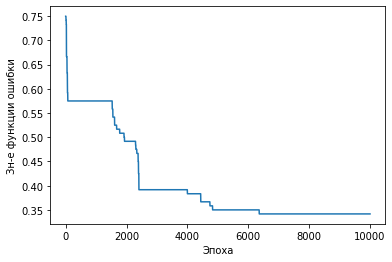

In [12]:
fig, ax = plt.subplots()
ax.set_ylabel('Зн-е функции ошибки')
ax.set_xlabel('Эпоха')
x = np.array(range(0,10000))
ax = ax.plot(x, error_func)
plt.show()

In [21]:
colors = ["red", "orange", "yellow", "green", "blue", "violet", "white", "grey", "brown"]

In [25]:
pop1.individuals[np.argmin(pop1.fitness_res)]

array([[ 0.15418118, -0.76990879, -0.34973103, -0.60411852, -1.31839195,
        -1.63950189, -0.48586236, -0.54137529, -0.03612436],
       [-0.59714859, -0.74429979,  0.2201852 ,  0.38086802, -0.71778284,
        -1.76970871, -0.03906112,  0.31604261, -0.12986193],
       [-0.57164692,  0.20221848, -0.58379775, -0.48696577,  1.31857538,
        -0.81132576, -0.66934304, -0.42023906, -0.67079304]])

In [26]:
def rgb_(R,G,B):
    color = np.array([[[R,G,B]]])
    plt.imshow(color)
    plt.show()
    color = color/255
    result = np.argmax(nonlin(np.dot(color,pop1.individuals[np.argmin(pop1.fitness_res)])))
    return(colors[result])
    #return(np.array([R,G,B]))

interact(rgb_, R=widgets.IntSlider(min=0, max=255, step=1, value=0), G=widgets.IntSlider(min=0, max=255, step=1, value=0), B=widgets.IntSlider(min=0, max=255, step=1, value=0));


interactive(children=(IntSlider(value=0, description='R', max=255), IntSlider(value=0, description='G', max=25…